In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
II_Samuel_1 = "Now it came to pass after the death of Saul, when David was returned from the slaughter of the Amalekites, and David had stayed two days in Ziklag;It came even to pass on the third day, that, behold, a man came out of the camp from Saul with his clothes rent, and earth on his head: and so it was, when he came to David, that he fell to the earth, and did obeisance.And David said to him, From where come you? And he said to him, Out of the camp of Israel am I escaped.And David said to him, How went the matter? I pray you, tell me. And he answered, That the people are fled from the battle, and many of the people also are fallen and dead; and Saul and Jonathan his son are dead also.And David said to the young man that told him, How know you that Saul and Jonathan his son be dead?And the young man that told him said, As I happened by chance on mount Gilboa, behold, Saul leaned on his spear; and, see, the chariots and horsemen followed hard after him.And when he looked behind him, he saw me, and called to me. And I answered, Here am I.And he said to me, Who are you? And I answered him, I am an Amalekite.He said to me again, Stand, I pray you, on me, and slay me: for anguish is come on me, because my life is yet whole in me.So I stood on him, and slew him, because I was sure that he could not live after that he was fallen: and I took the crown that was on his head, and the bracelet that was on his arm, and have brought them here to my lord.Then David took hold on his clothes, and rent them; and likewise all the men that were with him:And they mourned, and wept, and fasted until even, for Saul, and for Jonathan his son, and for the people of the LORD, and for the house of Israel; because they were fallen by the sword.And David said to the young man that told him, From where are you? And he answered, I am the son of a stranger, an Amalekite.And David said to him, How were you not afraid to stretch forth your hand to destroy the LORD' anointed?And David called one of the young men, and said, Go near, and fall on him. And he smote him that he died.And David said to him, Your blood be on your head; for your mouth has testified against you, saying, I have slain the LORD' anointed.And David lamented with this lamentation over Saul and over Jonathan his son:(Also he bade them teach the children of Judah the use of the bow: behold, it is written in the book of Jasher.)The beauty of Israel is slain on your high places: how are the mighty fallen!Tell it not in Gath, publish it not in the streets of Askelon; lest the daughters of the Philistines rejoice, lest the daughters of the uncircumcised triumph.You mountains of Gilboa, let there be no dew, neither let there be rain, on you, nor fields of offerings: for there the shield of the mighty is vilely cast away, the shield of Saul, as though he had not been anointed with oil.From the blood of the slain, from the fat of the mighty, the bow of Jonathan turned not back, and the sword of Saul returned not empty.Saul and Jonathan were lovely and pleasant in their lives, and in their death they were not divided: they were swifter than eagles, they were stronger than lions.You daughters of Israel, weep over Saul, who clothed you in scarlet, with other delights, who put on ornaments of gold on your apparel.How are the mighty fallen in the middle of the battle! O Jonathan, you were slain in your high places.I am distressed for you, my brother Jonathan: very pleasant have you been to me: your love to me was wonderful, passing the love of women.How are the mighty fallen, and the weapons of war perished!".lower()

In [6]:
II_Samuel_2 = "And it came to pass after this, that David inquired of the LORD, saying, Shall I go up into any of the cities of Judah? And the LORD said to him, Go up. And David said, Where shall I go up? And he said, To Hebron.So David went up thither, and his two wives also, Ahinoam the Jezreelitess, and Abigail Nabal' wife the Carmelite.And his men that were with him did David bring up, every man with his household: and they dwelled in the cities of Hebron.And the men of Judah came, and there they anointed David king over the house of Judah. And they told David, saying, That the men of Jabeshgilead were they that buried Saul.And David sent messengers to the men of Jabeshgilead, and said to them, Blessed be you of the LORD, that you have showed this kindness to your lord, even to Saul, and have buried him.And now the LORD show kindness and truth to you: and I also will requite you this kindness, because you have done this thing.Therefore now let your hands be strengthened, and be you valiant: for your master Saul is dead, and also the house of Judah have anointed me king over them.But Abner the son of Ner, captain of Saul' host, took Ishbosheth the son of Saul, and brought him over to Mahanaim;And made him king over Gilead, and over the Ashurites, and over Jezreel, and over Ephraim, and over Benjamin, and over all Israel.Ishbosheth Saul' son was forty years old when he began to reign over Israel, and reigned two years. But the house of Judah followed David.And the time that David was king in Hebron over the house of Judah was seven years and six months.And Abner the son of Ner, and the servants of Ishbosheth the son of Saul, went out from Mahanaim to Gibeon.And Joab the son of Zeruiah, and the servants of David, went out, and met together by the pool of Gibeon: and they sat down, the one on the one side of the pool, and the other on the other side of the pool.And Abner said to Joab, Let the young men now arise, and play before us. And Joab said, Let them arise.Then there arose and went over by number twelve of Benjamin, which pertained to Ishbosheth the son of Saul, and twelve of the servants of David.And they caught every one his fellow by the head, and thrust his sword in his fellow' side; so they fell down together: why that place was called Helkathhazzurim, which is in Gibeon.And there was a very sore battle that day; and Abner was beaten, and the men of Israel, before the servants of David.And there were three sons of Zeruiah there, Joab, and Abishai, and Asahel: and Asahel was as light of foot as a wild roe.And Asahel pursued after Abner; and in going he turned not to the right hand nor to the left from following Abner.Then Abner looked behind him, and said, Are you Asahel? And he answered, I am.And Abner said to him, Turn you aside to your right hand or to your left, and lay you hold on one of the young men, and take you his armor. But Asahel would not turn aside from following of him.And Abner said again to Asahel, Turn you aside from following me: why should I smite you to the ground? how then should I hold up my face to Joab your brother?However, he refused to turn aside: why Abner with the hinder end of the spear smote him under the fifth rib, that the spear came out behind him; and he fell down there, and died in the same place: and it came to pass, that as many as came to the place where Asahel fell down and died stood still.Joab also and Abishai pursued after Abner: and the sun went down when they were come to the hill of Ammah, that lies before Giah by the way of the wilderness of Gibeon.And the children of Benjamin gathered themselves together after Abner, and became one troop, and stood on the top of an hill.Then Abner called to Joab, and said, Shall the sword devour for ever? know you not that it will be bitterness in the latter end? how long shall it be then, ere you bid the people return from following their brothers?And Joab said, As God lives, unless you had spoken, surely then in the morning the people had gone up every one from following his brother.So Joab blew a trumpet, and all the people stood still, and pursued after Israel no more, neither fought they any more.And Abner and his men walked all that night through the plain, and passed over Jordan, and went through all Bithron, and they came to Mahanaim.And Joab returned from following Abner: and when he had gathered all the people together, there lacked of David' servants nineteen men and Asahel.But the servants of David had smitten of Benjamin, and of Abner' men, so that three hundred and three score men died.And they took up Asahel, and buried him in the sepulcher of his father, which was in Bethlehem. And Joab and his men went all night, and they came to Hebron at break of day.".lower()

In [7]:
II_Samuel_3 = "Now there was long war between the house of Saul and the house of David: but David waxed stronger and stronger, and the house of Saul waxed weaker and weaker.And to David were sons born in Hebron: and his firstborn was Amnon, of Ahinoam the Jezreelitess;And his second, Chileab, of Abigail the wife of Nabal the Carmelite; and the third, Absalom the son of Maacah the daughter of Talmai king of Geshur;And the fourth, Adonijah the son of Haggith; and the fifth, Shephatiah the son of Abital;And the sixth, Ithream, by Eglah David' wife. These were born to David in Hebron.And it came to pass, while there was war between the house of Saul and the house of David, that Abner made himself strong for the house of Saul.And Saul had a concubine, whose name was Rizpah, the daughter of Aiah: and Ishbosheth said to Abner, Why have you gone in to my father' concubine?Then was Abner very wroth for the words of Ishbosheth, and said, Am I a dog' head, which against Judah do show kindness this day to the house of Saul your father, to his brothers, and to his friends, and have not delivered you into the hand of David, that you charge me to day with a fault concerning this woman?So do God to Abner, and more also, except, as the LORD has sworn to David, even so I do to him;To translate the kingdom from the house of Saul, and to set up the throne of David over Israel and over Judah, from Dan even to Beersheba.And he could not answer Abner a word again, because he feared him.And Abner sent messengers to David on his behalf, saying, Whose is the land? saying also, Make your league with me, and, behold, my hand shall be with you, to bring about all Israel to you.And he said, Well; I will make a league with you: but one thing I require of you, that is, You shall not see my face, except you first bring Michal Saul' daughter, when you come to see my face.And David sent messengers to Ishbosheth Saul' son, saying, Deliver me my wife Michal, which I espoused to me for an hundred foreskins of the Philistines.And Ishbosheth sent, and took her from her husband, even from Phaltiel the son of Laish.And her husband went with her along weeping behind her to Bahurim. Then said Abner to him, Go, return. And he returned.And Abner had communication with the elders of Israel, saying, You sought for David in times past to be king over you:Now then do it: for the LORD has spoken of David, saying, By the hand of my servant David I will save my people Israel out of the hand of the Philistines, and out of the hand of all their enemies.And Abner also spoke in the ears of Benjamin: and Abner went also to speak in the ears of David in Hebron all that seemed good to Israel, and that seemed good to the whole house of Benjamin.So Abner came to David to Hebron, and twenty men with him. And David made Abner and the men that were with him a feast.And Abner said to David, I will arise and go, and will gather all Israel to my lord the king, that they may make a league with you, and that you may reign over all that your heart desires. And David sent Abner away; and he went in peace.And, behold, the servants of David and Joab came from pursuing a troop, and brought in a great spoil with them: but Abner was not with David in Hebron; for he had sent him away, and he was gone in peace.When Joab and all the host that was with him were come, they told Joab, saying, Abner the son of Ner came to the king, and he has sent him away, and he is gone in peace.Then Joab came to the king, and said, What have you done? behold, Abner came to you; why is it that you have sent him away, and he is quite gone?You know Abner the son of Ner, that he came to deceive you, and to know your going out and your coming in, and to know all that you do.And when Joab was come out from David, he sent messengers after Abner, which brought him again from the well of Sirah: but David knew it not.And when Abner was returned to Hebron, Joab took him aside in the gate to speak with him quietly, and smote him there under the fifth rib, that he died, for the blood of Asahel his brother.And afterward when David heard it, he said, I and my kingdom are guiltless before the LORD for ever from the blood of Abner the son of Ner:Let it rest on the head of Joab, and on all his father' house; and let there not fail from the house of Joab one that has an issue, or that is a leper, or that leans on a staff, or that falls on the sword, or that lacks bread.So Joab, and Abishai his brother slew Abner, because he had slain their brother Asahel at Gibeon in the battle.And David said to Joab, and to all the people that were with him, Rend your clothes, and gird you with sackcloth, and mourn before Abner. And king David himself followed the bier.And they buried Abner in Hebron: and the king lifted up his voice, and wept at the grave of Abner; and all the people wept.And the king lamented over Abner, and said, Died Abner as a fool dies?Your hands were not bound, nor your feet put into fetters: as a man falls before wicked men, so fell you. And all the people wept again over him.And when all the people came to cause David to eat meat while it was yet day, David swore, saying, So do God to me, and more also, if I taste bread, or ought else, till the sun be down.And all the people took notice of it, and it pleased them: as whatever the king did pleased all the people.For all the people and all Israel understood that day that it was not of the king to slay Abner the son of Ner.And the king said to his servants, Know you not that there is a prince and a great man fallen this day in Israel?And I am this day weak, though anointed king; and these men the sons of Zeruiah be too hard for me: the LORD shall reward the doer of evil according to his wickedness.".lower()

In [8]:
II_Samuel_4 = "And when Saul' son heard that Abner was dead in Hebron, his hands were feeble, and all the Israelites were troubled.And Saul' son had two men that were captains of bands: the name of the one was Baanah, and the name of the other Rechab, the sons of Rimmon a Beerothite, of the children of Benjamin: (for Beeroth also was reckoned to Benjamin.And the Beerothites fled to Gittaim, and were sojourners there until this day.)And Jonathan, Saul' son, had a son that was lame of his feet. He was five years old when the tidings came of Saul and Jonathan out of Jezreel, and his nurse took him up, and fled: and it came to pass, as she made haste to flee, that he fell, and became lame. And his name was Mephibosheth.And the sons of Rimmon the Beerothite, Rechab and Baanah, went, and came about the heat of the day to the house of Ishbosheth, who lay on a bed at noon.And they came thither into the middle of the house, as though they would have fetched wheat; and they smote him under the fifth rib: and Rechab and Baanah his brother escaped.For when they came into the house, he lay on his bed in his bedchamber, and they smote him, and slew him, and beheaded him, and took his head, and got them away through the plain all night.And they brought the head of Ishbosheth to David to Hebron, and said to the king, Behold the head of Ishbosheth the son of Saul your enemy, which sought your life; and the LORD has avenged my lord the king this day of Saul, and of his seed.And David answered Rechab and Baanah his brother, the sons of Rimmon the Beerothite, and said to them, As the LORD lives, who has redeemed my soul out of all adversity,When one told me, saying, Behold, Saul is dead, thinking to have brought good tidings, I took hold of him, and slew him in Ziklag, who thought that I would have given him a reward for his tidings:How much more, when wicked men have slain a righteous person in his own house on his bed? shall I not therefore now require his blood of your hand, and take you away from the earth?And David commanded his young men, and they slew them, and cut off their hands and their feet, and hanged them up over the pool in Hebron. But they took the head of Ishbosheth, and buried it in the sepulcher of Abner in Hebron.".lower()

In [9]:
II_Samuel_5 = "Then came all the tribes of Israel to David to Hebron, and spoke, saying, Behold, we are your bone and your flesh.Also in time past, when Saul was king over us, you were he that led out and brought in Israel: and the LORD said to you, You shall feed my people Israel, and you shall be a captain over Israel.So all the elders of Israel came to the king to Hebron; and king David made a league with them in Hebron before the LORD: and they anointed David king over Israel.David was thirty years old when he began to reign, and he reigned forty years.In Hebron he reigned over Judah seven years and six months: and in Jerusalem he reigned thirty and three years over all Israel and Judah.And the king and his men went to Jerusalem to the Jebusites, the inhabitants of the land: which spoke to David, saying, Except you take away the blind and the lame, you shall not come in here: thinking, David cannot come in here.Nevertheless David took the strong hold of Zion: the same is the city of David.And David said on that day, Whoever gets up to the gutter, and smites the Jebusites, and the lame and the blind that are hated of David' soul, he shall be chief and captain. Why they said, The blind and the lame shall not come into the house.So David dwelled in the fort, and called it the city of David. And David built round about from Millo and inward.And David went on, and grew great, and the LORD God of hosts was with him.And Hiram king of Tyre sent messengers to David, and cedar trees, and carpenters, and masons: and they built David an house.And David perceived that the LORD had established him king over Israel, and that he had exalted his kingdom for his people Israel' sake.And David took him more concubines and wives out of Jerusalem, after he was come from Hebron: and there were yet sons and daughters born to David.And these be the names of those that were born to him in Jerusalem; Shammuah, and Shobab, and Nathan, and Solomon,Ibhar also, and Elishua, and Nepheg, and Japhia,And Elishama, and Eliada, and Eliphalet.But when the Philistines heard that they had anointed David king over Israel, all the Philistines came up to seek David; and David heard of it, and went down to the hold.The Philistines also came and spread themselves in the valley of Rephaim.And David inquired of the LORD, saying, Shall I go up to the Philistines? will you deliver them into my hand? And the LORD said to David, Go up: for I will doubtless deliver the Philistines into your hand.And David came to Baalperazim, and David smote them there, and said, The LORD has broken forth on my enemies before me, as the breach of waters. Therefore he called the name of that place Baalperazim.And there they left their images, and David and his men burned them.And the Philistines came up yet again, and spread themselves in the valley of Rephaim.And when David inquired of the LORD, he said, You shall not go up; but fetch a compass behind them, and come on them over against the mulberry trees.And let it be, when you hear the sound of a going in the tops of the mulberry trees, that then you shall bestir yourself: for then shall the LORD go out before you, to smite the host of the Philistines.And David did so, as the LORD had commanded him; and smote the Philistines from Geba until you come to Gazer.".lower()

In [10]:
II_Samuel_6 = "Again, David gathered together all the chosen men of Israel, thirty thousand.And David arose, and went with all the people that were with him from Baale of Judah, to bring up from there the ark of God, whose name is called by the name of the LORD of hosts that dwells between the cherubim.And they set the ark of God on a new cart, and brought it out of the house of Abinadab that was in Gibeah: and Uzzah and Ahio, the sons of Abinadab, drove the new cart.And they brought it out of the house of Abinadab which was at Gibeah, accompanying the ark of God: and Ahio went before the ark.And David and all the house of Israel played before the LORD on all manner of instruments made of fir wood, even on harps, and on psalteries, and on tambourines, and on cornets, and on cymbals.And when they came to Nachon' threshing floor, Uzzah put forth his hand to the ark of God, and took hold of it; for the oxen shook it.And the anger of the LORD was kindled against Uzzah; and God smote him there for his error; and there he died by the ark of God.And David was displeased, because the LORD had made a breach on Uzzah: and he called the name of the place Perezuzzah to this day.And David was afraid of the LORD that day, and said, How shall the ark of the LORD come to me?So David would not remove the ark of the LORD to him into the city of David: but David carried it aside into the house of Obededom the Gittite.And the ark of the LORD continued in the house of Obededom the Gittite three months: and the LORD blessed Obededom, and all his household.And it was told king David, saying, The LORD has blessed the house of Obededom, and all that pertains to him, because of the ark of God. So David went and brought up the ark of God from the house of Obededom into the city of David with gladness.And it was so, that when they that bore the ark of the LORD had gone six paces, he sacrificed oxen and fatted calves.And David danced before the LORD with all his might; and David was girded with a linen ephod.So David and all the house of Israel brought up the ark of the LORD with shouting, and with the sound of the trumpet.And as the ark of the LORD came into the city of David, Michal Saul' daughter looked through a window, and saw king David leaping and dancing before the LORD; and she despised him in her heart.And they brought in the ark of the LORD, and set it in his place, in the middle of the tabernacle that David had pitched for it: and David offered burnt offerings and peace offerings before the LORD.And as soon as David had made an end of offering burnt offerings and peace offerings, he blessed the people in the name of the LORD of hosts.And he dealt among all the people, even among the whole multitude of Israel, as well to the women as men, to every one a cake of bread, and a good piece of flesh, and a flagon of wine. So all the people departed every one to his house.Then David returned to bless his household. And Michal the daughter of Saul came out to meet David, and said, How glorious was the king of Israel to day, who uncovered himself to day in the eyes of the handmaids of his servants, as one of the vain fellows shamelessly uncovers himself!And David said to Michal, It was before the LORD, which chose me before your father, and before all his house, to appoint me ruler over the people of the LORD, over Israel: therefore will I play before the LORD.And I will yet be more vile than thus, and will be base in my own sight: and of the maidservants which you have spoken of, of them shall I be had in honor.Therefore Michal the daughter of Saul had no child to the day of her death.".lower()

In [11]:
II_Samuel_7 = "And it came to pass, when the king sat in his house, and the LORD had given him rest round about from all his enemies;That the king said to Nathan the prophet, See now, I dwell in an house of cedar, but the ark of God dwells within curtains.And Nathan said to the king, Go, do all that is in your heart; for the LORD is with you.And it came to pass that night, that the word of the LORD came to Nathan, saying,Go and tell my servant David, Thus said the LORD, Shall you build me an house for me to dwell in?Whereas I have not dwelled in any house since the time that I brought up the children of Israel out of Egypt, even to this day, but have walked in a tent and in a tabernacle.In all the places wherein I have walked with all the children of Israel spoke I a word with any of the tribes of Israel, whom I commanded to feed my people Israel, saying, Why build you not me an house of cedar?Now therefore so shall you say to my servant David, Thus said the LORD of hosts, I took you from the sheepcote, from following the sheep, to be ruler over my people, over Israel:And I was with you wherever you went, and have cut off all your enemies out of your sight, and have made you a great name, like to the name of the great men that are in the earth.Moreover I will appoint a place for my people Israel, and will plant them, that they may dwell in a place of their own, and move no more; neither shall the children of wickedness afflict them any more, as beforetime,And as since the time that I commanded judges to be over my people Israel, and have caused you to rest from all your enemies. Also the LORD tells you that he will make you an house.And when your days be fulfilled, and you shall sleep with your fathers, I will set up your seed after you, which shall proceed out of your bowels, and I will establish his kingdom.He shall build an house for my name, and I will establish the throne of his kingdom for ever.I will be his father, and he shall be my son. If he commit iniquity, I will chasten him with the rod of men, and with the stripes of the children of men:But my mercy shall not depart away from him, as I took it from Saul, whom I put away before you.And your house and your kingdom shall be established for ever before you: your throne shall be established for ever.According to all these words, and according to all this vision, so did Nathan speak to David.Then went king David in, and sat before the LORD, and he said, Who am I, O Lord GOD? and what is my house, that you have brought me till now?And this was yet a small thing in your sight, O Lord GOD; but you have spoken also of your servant' house for a great while to come. And is this the manner of man, O Lord GOD?And what can David say more to you? for you, Lord GOD, know your servant.For your word' sake, and according to your own heart, have you done all these great things, to make your servant know them.Why you are great, O LORD God: for there is none like you, neither is there any God beside you, according to all that we have heard with our ears.And what one nation in the earth is like your people, even like Israel, whom God went to redeem for a people to himself, and to make him a name, and to do for you great things and terrible, for your land, before your people, which you redeemed to you from Egypt, from the nations and their gods?For you have confirmed to yourself your people Israel to be a people to you for ever: and you, LORD, are become their God.And now, O LORD God, the word that you have spoken concerning your servant, and concerning his house, establish it for ever, and do as you have said.And let your name be magnified for ever, saying, The LORD of hosts is the God over Israel: and let the house of your servant David be established before you.For you, O LORD of hosts, God of Israel, have revealed to your servant, saying, I will build you an house: therefore has your servant found in his heart to pray this prayer to you.And now, O Lord GOD, you are that God, and your words be true, and you have promised this goodness to your servant:Therefore now let it please you to bless the house of your servant, that it may continue for ever before you: for you, O Lord GOD, have spoken it: and with your blessing let the house of your servant be blessed for ever.".lower()

In [12]:
II_Samuel_8 = "And after this it came to pass that David smote the Philistines, and subdued them: and David took Methegammah out of the hand of the Philistines.And he smote Moab, and measured them with a line, casting them down to the ground; even with two lines measured he to put to death, and with one full line to keep alive. And so the Moabites became David' servants, and brought gifts.David smote also Hadadezer, the son of Rehob, king of Zobah, as he went to recover his border at the river Euphrates.And David took from him a thousand chariots, and seven hundred horsemen, and twenty thousand footmen: and David hamstrung all the chariot horses, but reserved of them for an hundred chariots.And when the Syrians of Damascus came to succor Hadadezer king of Zobah, David slew of the Syrians two and twenty thousand men.Then David put garrisons in Syria of Damascus: and the Syrians became servants to David, and brought gifts. And the LORD preserved David wherever he went.And David took the shields of gold that were on the servants of Hadadezer, and brought them to Jerusalem.And from Betah, and from Berothai, cities of Hadadezer, king David took exceeding much brass.When Toi king of Hamath heard that David had smitten all the host of Hadadezer,Then Toi sent Joram his son to king David, to salute him, and to bless him, because he had fought against Hadadezer, and smitten him: for Hadadezer had wars with Toi. And Joram brought with him vessels of silver, and vessels of gold, and vessels of brass:Which also king David did dedicate to the LORD, with the silver and gold that he had dedicated of all nations which he subdued;Of Syria, and of Moab, and of the children of Ammon, and of the Philistines, and of Amalek, and of the spoil of Hadadezer, son of Rehob, king of Zobah.And David got him a name when he returned from smiting of the Syrians in the valley of salt, being eighteen thousand men.And he put garrisons in Edom; throughout all Edom put he garrisons, and all they of Edom became David' servants. And the LORD preserved David wherever he went.And David reigned over all Israel; and David executed judgment and justice to all his people.And Joab the son of Zeruiah was over the host; and Jehoshaphat the son of Ahilud was recorder;And Zadok the son of Ahitub, and Ahimelech the son of Abiathar, were the priests; and Seraiah was the scribe;And Benaiah the son of Jehoiada was over both the Cherethites and the Pelethites; and David' sons were chief rulers.".lower()

In [13]:
II_Samuel_9 = "And David said, Is there yet any that is left of the house of Saul, that I may show him kindness for Jonathan' sake?And there was of the house of Saul a servant whose name was Ziba. And when they had called him to David, the king said to him, Are you Ziba? And he said, Your servant is he.And the king said, Is there not yet any of the house of Saul, that I may show the kindness of God to him? And Ziba said to the king, Jonathan has yet a son, which is lame on his feet.And the king said to him, Where is he? And Ziba said to the king, Behold, he is in the house of Machir, the son of Ammiel, in Lodebar.Then king David sent, and fetched him out of the house of Machir, the son of Ammiel, from Lodebar.Now when Mephibosheth, the son of Jonathan, the son of Saul, was come to David, he fell on his face, and did reverence. And David said, Mephibosheth. And he answered, Behold your servant!And David said to him, Fear not: for I will surely show you kindness for Jonathan your father' sake, and will restore you all the land of Saul your father; and you shall eat bread at my table continually.And he bowed himself, and said, What is your servant, that you should look on such a dead dog as I am?Then the king called to Ziba, Saul' servant, and said to him, I have given to your master' son all that pertained to Saul and to all his house.You therefore, and your sons, and your servants, shall till the land for him, and you shall bring in the fruits, that your master' son may have food to eat: but Mephibosheth your master' son shall eat bread always at my table. Now Ziba had fifteen sons and twenty servants.Then said Ziba to the king, According to all that my lord the king has commanded his servant, so shall your servant do. As for Mephibosheth, said the king, he shall eat at my table, as one of the king' sons.And Mephibosheth had a young son, whose name was Micha. And all that dwelled in the house of Ziba were servants to Mephibosheth.So Mephibosheth dwelled in Jerusalem: for he did eat continually at the king' table; and was lame on both his feet.".lower()

In [14]:
II_Samuel_10 = "And it came to pass after this, that the king of the children of Ammon died, and Hanun his son reigned in his stead.Then said David, I will show kindness to Hanun the son of Nahash, as his father showed kindness to me. And David sent to comfort him by the hand of his servants for his father. And David' servants came into the land of the children of Ammon.And the princes of the children of Ammon said to Hanun their lord, Think you that David does honor your father, that he has sent comforters to you? has not David rather sent his servants to you, to search the city, and to spy it out, and to overthrow it?Why Hanun took David' servants, and shaved off the one half of their beards, and cut off their garments in the middle, even to their buttocks, and sent them away.When they told it to David, he sent to meet them, because the men were greatly ashamed: and the king said, Tarry at Jericho until your beards be grown, and then return.And when the children of Ammon saw that they stank before David, the children of Ammon sent and hired the Syrians of Bethrehob and the Syrians of Zoba, twenty thousand footmen, and of king Maacah a thousand men, and of Ishtob twelve thousand men.And when David heard of it, he sent Joab, and all the host of the mighty men.And the children of Ammon came out, and put the battle in array at the entering in of the gate: and the Syrians of Zoba, and of Rehob, and Ishtob, and Maacah, were by themselves in the field.When Joab saw that the front of the battle was against him before and behind, he chose of all the choice men of Israel, and put them in array against the Syrians:And the rest of the people he delivered into the hand of Abishai his brother, that he might put them in array against the children of Ammon.And he said, If the Syrians be too strong for me, then you shall help me: but if the children of Ammon be too strong for you, then I will come and help you.Be of good courage, and let us play the men for our people, and for the cities of our God: and the LORD do that which seems him good.And Joab drew near, and the people that were with him, to the battle against the Syrians: and they fled before him.And when the children of Ammon saw that the Syrians were fled, then fled they also before Abishai, and entered into the city. So Joab returned from the children of Ammon, and came to Jerusalem.And when the Syrians saw that they were smitten before Israel, they gathered themselves together.And Hadarezer sent, and brought out the Syrians that were beyond the river: and they came to Helam; and Shobach the captain of the host of Hadarezer went before them.And when it was told David, he gathered all Israel together, and passed over Jordan, and came to Helam. And the Syrians set themselves in array against David, and fought with him.And the Syrians fled before Israel; and David slew the men of seven hundred chariots of the Syrians, and forty thousand horsemen, and smote Shobach the captain of their host, who died there.And when all the kings that were servants to Hadarezer saw that they were smitten before Israel, they made peace with Israel, and served them. So the Syrians feared to help the children of Ammon any more.".lower()

In [15]:
II_Samuel_11 = "And it came to pass, after the year was expired, at the time when kings go forth to battle, that David sent Joab, and his servants with him, and all Israel; and they destroyed the children of Ammon, and besieged Rabbah. But David tarried still at Jerusalem.And it came to pass in an evening, that David arose from off his bed, and walked on the roof of the king' house: and from the roof he saw a woman washing herself; and the woman was very beautiful to look on.And David sent and inquired after the woman. And one said, Is not this Bathsheba, the daughter of Eliam, the wife of Uriah the Hittite?And David sent messengers, and took her; and she came in to him, and he lay with her; for she was purified from her uncleanness: and she returned to her house.And the woman conceived, and sent and told David, and said, I am with child.And David sent to Joab, saying, Send me Uriah the Hittite. And Joab sent Uriah to David.And when Uriah was come to him, David demanded of him how Joab did, and how the people did, and how the war prospered.And David said to Uriah, Go down to your house, and wash your feet. And Uriah departed out of the king' house, and there followed him a mess of meat from the king.But Uriah slept at the door of the king' house with all the servants of his lord, and went not down to his house.And when they had told David, saying, Uriah went not down to his house, David said to Uriah, Came you not from your journey? why then did you not go down to your house?And Uriah said to David, The ark, and Israel, and Judah, abide in tents; and my lord Joab, and the servants of my lord, are encamped in the open fields; shall I then go into my house, to eat and to drink, and to lie with my wife? as you live, and as your soul lives, I will not do this thing.And David said to Uriah, Tarry here to day also, and to morrow I will let you depart. So Uriah stayed in Jerusalem that day, and the morrow.And when David had called him, he did eat and drink before him; and he made him drunk: and at even he went out to lie on his bed with the servants of his lord, but went not down to his house.And it came to pass in the morning, that David wrote a letter to Joab, and sent it by the hand of Uriah.And he wrote in the letter, saying, Set you Uriah in the forefront of the hottest battle, and retire you from him, that he may be smitten, and die.And it came to pass, when Joab observed the city, that he assigned Uriah to a place where he knew that valiant men were.And the men of the city went out, and fought with Joab: and there fell some of the people of the servants of David; and Uriah the Hittite died also.Then Joab sent and told David all the things concerning the war;And charged the messenger, saying, When you have made an end of telling the matters of the war to the king,And if so be that the king' wrath arise, and he say to you, Why approached you so near to the city when you did fight? knew you not that they would shoot from the wall?Who smote Abimelech the son of Jerubbesheth? did not a woman cast a piece of a millstone on him from the wall, that he died in Thebez? why went you near the wall? then say you, Your servant Uriah the Hittite is dead also.So the messenger went, and came and showed David all that Joab had sent him for.And the messenger said to David, Surely the men prevailed against us, and came out to us into the field, and we were on them even to the entering of the gate.And the shooters shot from off the wall on your servants; and some of the king' servants be dead, and your servant Uriah the Hittite is dead also.Then David said to the messenger, Thus shall you say to Joab, Let not this thing displease you, for the sword devours one as well as another: make your battle more strong against the city, and overthrow it: and encourage you him.And when the wife of Uriah heard that Uriah her husband was dead, she mourned for her husband.And when the mourning was past, David sent and fetched her to his house, and she became his wife, and bore him a son. But the thing that David had done displeased the LORD.".lower()

In [16]:
II_Samuel_12 = "And the LORD sent Nathan to David. And he came to him, and said to him, There were two men in one city; the one rich, and the other poor.The rich man had exceeding many flocks and herds:But the poor man had nothing, save one little ewe lamb, which he had bought and nourished up: and it grew up together with him, and with his children; it did eat of his own meat, and drank of his own cup, and lay in his bosom, and was to him as a daughter.And there came a travelers to the rich man, and he spared to take of his own flock and of his own herd, to dress for the wayfaring man that was come to him; but took the poor man' lamb, and dressed it for the man that was come to him.And David' anger was greatly kindled against the man; and he said to Nathan, As the LORD lives, the man that has done this thing shall surely die:And he shall restore the lamb fourfold, because he did this thing, and because he had no pity.And Nathan said to David, You are the man. Thus said the LORD God of Israel, I anointed you king over Israel, and I delivered you out of the hand of Saul;And I gave you your master' house, and your master' wives into your bosom, and gave you the house of Israel and of Judah; and if that had been too little, I would moreover have given to you such and such things.Why have you despised the commandment of the LORD, to do evil in his sight? you have killed Uriah the Hittite with the sword, and have taken his wife to be your wife, and have slain him with the sword of the children of Ammon.Now therefore the sword shall never depart from your house; because you have despised me, and have taken the wife of Uriah the Hittite to be your wife.Thus said the LORD, Behold, I will raise up evil against you out of your own house, and I will take your wives before your eyes, and give them to your neighbor, and he shall lie with your wives in the sight of this sun.For you did it secretly: but I will do this thing before all Israel, and before the sun.And David said to Nathan, I have sinned against the LORD. And Nathan said to David, The LORD also has put away your sin; you shall not die.However,, because by this deed you have given great occasion to the enemies of the LORD to blaspheme, the child also that is born to you shall surely die.And Nathan departed to his house. And the LORD struck the child that Uriah' wife bore to David, and it was very sick.David therefore sought God for the child; and David fasted, and went in, and lay all night on the earth.And the elders of his house arose, and went to him, to raise him up from the earth: but he would not, neither did he eat bread with them.And it came to pass on the seventh day, that the child died. And the servants of David feared to tell him that the child was dead: for they said, Behold, while the child was yet alive, we spoke to him, and he would not listen to our voice: how will he then vex himself, if we tell him that the child is dead?But when David saw that his servants whispered, David perceived that the child was dead: therefore David said to his servants, Is the child dead? And they said, He is dead.Then David arose from the earth, and washed, and anointed himself, and changed his apparel, and came into the house of the LORD, and worshipped: then he came to his own house; and when he required, they set bread before him, and he did eat.Then said his servants to him, What thing is this that you have done? you did fast and weep for the child, while it was alive; but when the child was dead, you did rise and eat bread.And he said, While the child was yet alive, I fasted and wept: for I said, Who can tell whether GOD will be gracious to me, that the child may live?But now he is dead, why should I fast? can I bring him back again? I shall go to him, but he shall not return to me.And David comforted Bathsheba his wife, and went in to her, and lay with her: and she bore a son, and he called his name Solomon: and the LORD loved him.And he sent by the hand of Nathan the prophet; and he called his name Jedidiah, because of the LORD.And Joab fought against Rabbah of the children of Ammon, and took the royal city.And Joab sent messengers to David, and said, I have fought against Rabbah, and have taken the city of waters.Now therefore gather the rest of the people together, and encamp against the city, and take it: lest I take the city, and it be called after my name.And David gathered all the people together, and went to Rabbah, and fought against it, and took it.And he took their king' crown from off his head, the weight whereof was a talent of gold with the precious stones: and it was set on David' head. And he brought forth the spoil of the city in great abundance.And he brought forth the people that were therein, and put them under saws, and under harrows of iron, and under axes of iron, and made them pass through the brick-kiln: and thus did he to all the cities of the children of Ammon. So David and all the people returned to Jerusalem.".lower()

In [17]:
II_Samuel_13 = "And it came to pass after this, that Absalom the son of David had a fair sister, whose name was Tamar; and Amnon the son of David loved her.And Amnon was so vexed, that he fell sick for his sister Tamar; for she was a virgin; and Amnon thought it hard for him to do anything to her.But Amnon had a friend, whose name was Jonadab, the son of Shimeah David' brother: and Jonadab was a very subtle man.And he said to him, Why are you, being the king' son, lean from day to day? will you not tell me? And Amnon said to him, I love Tamar, my brother Absalom' sister.And Jonadab said to him, Lay you down on your bed, and make yourself sick: and when your father comes to see you, say to him, I pray you, let my sister Tamar come, and give me meat, and dress the meat in my sight, that I may see it, and eat it at her hand.So Amnon lay down, and made himself sick: and when the king was come to see him, Amnon said to the king, I pray you, let Tamar my sister come, and make me a couple of cakes in my sight, that I may eat at her hand.Then David sent home to Tamar, saying, Go now to your brother Amnon' house, and dress him meat.So Tamar went to her brother Amnon' house; and he was laid down. And she took flour, and kneaded it, and made cakes in his sight, and did bake the cakes.And she took a pan, and poured them out before him; but he refused to eat. And Amnon said, Have out all men from me. And they went out every man from him.And Amnon said to Tamar, Bring the meat into the chamber, that I may eat of your hand. And Tamar took the cakes which she had made, and brought them into the chamber to Amnon her brother.And when she had brought them to him to eat, he took hold of her, and said to her, Come lie with me, my sister.And she answered him, No, my brother, do not force me; for no such thing ought to be done in Israel: do not you this folly.And I, where shall I cause my shame to go? and as for you, you shall be as one of the fools in Israel. Now therefore, I pray you, speak to the king; for he will not withhold me from you.However, he would not listen to her voice: but, being stronger than she, forced her, and lay with her.Then Amnon hated her exceedingly; so that the hatred with which he hated her was greater than the love with which he had loved her. And Amnon said to her, Arise, be gone.And she said to him, There is no cause: this evil in sending me away is greater than the other that you did to me. But he would not listen to her.Then he called his servant that ministered to him, and said, Put now this woman out from me, and bolt the door after her.And she had a garment of divers colors on her: for with such robes were the king' daughters that were virgins appareled. Then his servant brought her out, and bolted the door after her.And Tamar put ashes on her head, and rent her garment of divers colors that was on her, and laid her hand on her head, and went on crying.And Absalom her brother said to her, Has Amnon your brother been with you? but hold now your peace, my sister: he is your brother; regard not this thing. So Tamar remained desolate in her brother Absalom' house.But when king David heard of all these things, he was very wroth.And Absalom spoke to his brother Amnon neither good nor bad: for Absalom hated Amnon, because he had forced his sister Tamar.And it came to pass after two full years, that Absalom had sheep shearers in Baalhazor, which is beside Ephraim: and Absalom invited all the king' sons.And Absalom came to the king, and said, Behold now, your servant has sheep shearers; let the king, I beseech you, and his servants go with your servant.And the king said to Absalom, No, my son, let us not all now go, lest we be chargeable to you. And he pressed him: however, he would not go, but blessed him.Then said Absalom, If not, I pray you, let my brother Amnon go with us. And the king said to him, Why should he go with you?But Absalom pressed him, that he let Amnon and all the king' sons go with him.Now Absalom had commanded his servants, saying, Mark you now when Amnon' heart is merry with wine, and when I say to you, Smite Amnon; then kill him, fear not: have not I commanded you? be courageous, and be valiant.And the servants of Absalom did to Amnon as Absalom had commanded. Then all the king' sons arose, and every man got him up on his mule, and fled.And it came to pass, while they were in the way, that tidings came to David, saying, Absalom has slain all the king' sons, and there is not one of them left.Then the king arose, and tare his garments, and lay on the earth; and all his servants stood by with their clothes rent.And Jonadab, the son of Shimeah David' brother, answered and said, Let not my lord suppose that they have slain all the young men the king' sons; for Amnon only is dead: for by the appointment of Absalom this has been determined from the day that he forced his sister Tamar.Now therefore let not my lord the king take the thing to his heart, to think that all the king' sons are dead: for Amnon only is dead.But Absalom fled. And the young man that kept the watch lifted up his eyes, and looked, and, behold, there came much people by the way of the hill side behind him.And Jonadab said to the king, Behold, the king' sons come: as your servant said, so it is.And it came to pass, as soon as he had made an end of speaking, that, behold, the king' sons came, and lifted up their voice and wept: and the king also and all his servants wept very sore.But Absalom fled, and went to Talmai, the son of Ammihud, king of Geshur. And David mourned for his son every day.So Absalom fled, and went to Geshur, and was there three years.And the soul of king David longed to go forth to Absalom: for he was comforted concerning Amnon, seeing he was dead.".lower()

In [18]:
II_Samuel_14 = "Now Joab the son of Zeruiah perceived that the king' heart was toward Absalom.And Joab sent to Tekoah, and fetched there a wise woman, and said to her, I pray you, feign yourself to be a mourner, and put on now mourning apparel, and anoint not yourself with oil, but be as a woman that had a long time mourned for the dead:And come to the king, and speak on this manner to him. So Joab put the words in her mouth.And when the woman of Tekoah spoke to the king, she fell on her face to the ground, and did obeisance, and said, Help, O king.And the king said to her, What ails you? And she answered, I am indeed a widow woman, and my husband is dead.And your handmaid had two sons, and they two strove together in the field, and there was none to part them, but the one smote the other, and slew him.And, behold, the whole family is risen against your handmaid, and they said, Deliver him that smote his brother, that we may kill him, for the life of his brother whom he slew; and we will destroy the heir also: and so they shall quench my coal which is left, and shall not leave to my husband neither name nor remainder on the earth.And the king said to the woman, Go to your house, and I will give charge concerning you.And the woman of Tekoah said to the king, My lord, O king, the iniquity be on me, and on my father' house: and the king and his throne be guiltless.And the king said, Whoever said ought to you, bring him to me, and he shall not touch you any more.Then said she, I pray you, let the king remember the LORD your God, that you would not suffer the revengers of blood to destroy any more, lest they destroy my son. And he said, As the LORD lives, there shall not one hair of your son fall to the earth.Then the woman said, Let your handmaid, I pray you, speak one word to my lord the king. And he said, Say on.And the woman said, Why then have you thought such a thing against the people of God? for the king does speak this thing as one which is faulty, in that the king does not fetch home again his banished.For we must needs die, and are as water spilt on the ground, which cannot be gathered up again; neither does God respect any person: yet does he devise means, that his banished be not expelled from him.Now therefore that I am come to speak of this thing to my lord the king, it is because the people have made me afraid: and your handmaid said, I will now speak to the king; it may be that the king will perform the request of his handmaid.For the king will hear, to deliver his handmaid out of the hand of the man that would destroy me and my son together out of the inheritance of God.Then your handmaid said, The word of my lord the king shall now be comfortable: for as an angel of God, so is my lord the king to discern good and bad: therefore the LORD your God will be with you.Then the king answered and said to the woman, Hide not from me, I pray you, the thing that I shall ask you. And the woman said, Let my lord the king now speak.And the king said, Is not the hand of Joab with you in all this? And the woman answered and said, As your soul lives, my lord the king, none can turn to the right hand or to the left from ought that my lord the king has spoken: for your servant Joab, he bade me, and he put all these words in the mouth of your handmaid:To fetch about this form of speech has your servant Joab done this thing: and my lord is wise, according to the wisdom of an angel of God, to know all things that are in the earth.And the king said to Joab, Behold now, I have done this thing: go therefore, bring the young man Absalom again.And Joab fell to the ground on his face, and bowed himself, and thanked the king: and Joab said, To day your servant knows that I have found grace in your sight, my lord, O king, in that the king has fulfilled the request of his servant.So Joab arose and went to Geshur, and brought Absalom to Jerusalem.And the king said, Let him turn to his own house, and let him not see my face. So Absalom returned to his own house, and saw not the king' face.But in all Israel there was none to be so much praised as Absalom for his beauty: from the sole of his foot even to the crown of his head there was no blemish in him.And when he polled his head, (for it was at every year' end that he polled it: because the hair was heavy on him, therefore he polled it:) he weighed the hair of his head at two hundred shekels after the king' weight.And to Absalom there were born three sons, and one daughter, whose name was Tamar: she was a woman of a fair countenance.So Absalom dwelled two full years in Jerusalem, and saw not the king' face.Therefore Absalom sent for Joab, to have sent him to the king; but he would not come to him: and when he sent again the second time, he would not come.Therefore he said to his servants, See, Joab' field is near mine, and he has barley there; go and set it on fire. And Absalom' servants set the field on fire.Then Joab arose, and came to Absalom to his house, and said to him, Why have your servants set my field on fire?And Absalom answered Joab, Behold, I sent to you, saying, Come here, that I may send you to the king, to say, Why am I come from Geshur? it had been good for me to have been there still: now therefore let me see the king' face; and if there be any iniquity in me, let him kill me.So Joab came to the king, and told him: and when he had called for Absalom, he came to the king, and bowed himself on his face to the ground before the king: and the king kissed Absalom.".lower()

In [20]:
II_Samuel_15 = "And it came to pass after this, that Absalom prepared him chariots and horses, and fifty men to run before him.And Absalom rose up early, and stood beside the way of the gate: and it was so, that when any man that had a controversy came to the king for judgment, then Absalom called to him, and said, Of what city are you? And he said, Your servant is of one of the tribes of Israel.And Absalom said to him, See, your matters are good and right; but there is no man deputed of the king to hear you.Absalom said moreover, Oh that I were made judge in the land, that every man which has any suit or cause might come to me, and I would do him justice!And it was so, that when any man came near to him to do him obeisance, he put forth his hand, and took him, and kissed him.And on this manner did Absalom to all Israel that came to the king for judgment: so Absalom stole the hearts of the men of Israel.And it came to pass after forty years, that Absalom said to the king, I pray you, let me go and pay my vow, which I have vowed to the LORD, in Hebron.For your servant vowed a vow while I stayed at Geshur in Syria, saying, If the LORD shall bring me again indeed to Jerusalem, then I will serve the LORD.And the king said to him, Go in peace. So he arose, and went to Hebron.But Absalom sent spies throughout all the tribes of Israel, saying, As soon as you hear the sound of the trumpet, then you shall say, Absalom reigns in Hebron.And with Absalom went two hundred men out of Jerusalem, that were called; and they went in their simplicity, and they knew not any thing.And Absalom sent for Ahithophel the Gilonite, David' counselor, from his city, even from Giloh, while he offered sacrifices. And the conspiracy was strong; for the people increased continually with Absalom.And there came a messenger to David, saying, The hearts of the men of Israel are after Absalom.And David said to all his servants that were with him at Jerusalem, Arise, and let us flee; for we shall not else escape from Absalom: make speed to depart, lest he overtake us suddenly, and bring evil on us, and smite the city with the edge of the sword.And the king' servants said to the king, Behold, your servants are ready to do whatever my lord the king shall appoint.And the king went forth, and all his household after him. And the king left ten women, which were concubines, to keep the house.And the king went forth, and all the people after him, and tarried in a place that was far off.And all his servants passed on beside him; and all the Cherethites, and all the Pelethites, and all the Gittites, six hundred men which came after him from Gath, passed on before the king.Then said the king to Ittai the Gittite, Why go you also with us? return to your place, and abide with the king: for you are a stranger, and also an exile.Whereas you came but yesterday, should I this day make you go up and down with us? seeing I go where I may, return you, and take back your brothers: mercy and truth be with you.And Ittai answered the king, and said, As the LORD lives, and as my lord the king lives, surely in what place my lord the king shall be, whether in death or life, even there also will your servant be.And David said to Ittai, Go and pass over. And Ittai the Gittite passed over, and all his men, and all the little ones that were with him.And all the country wept with a loud voice, and all the people passed over: the king also himself passed over the brook Kidron, and all the people passed over, toward the way of the wilderness.And see Zadok also, and all the Levites were with him, bearing the ark of the covenant of God: and they set down the ark of God; and Abiathar went up, until all the people had done passing out of the city.And the king said to Zadok, Carry back the ark of God into the city: if I shall find favor in the eyes of the LORD, he will bring me again, and show me both it, and his habitation:But if he thus say, I have no delight in you; behold, here am I, let him do to me as seems good to him.The king said also to Zadok the priest, Are not you a seer? return into the city in peace, and your two sons with you, Ahimaaz your son, and Jonathan the son of Abiathar.See, I will tarry in the plain of the wilderness, until there come word from you to certify me.Zadok therefore and Abiathar carried the ark of God again to Jerusalem: and they tarried there.And David went up by the ascent of mount Olivet, and wept as he went up, and had his head covered, and he went barefoot: and all the people that was with him covered every man his head, and they went up, weeping as they went up.And one told David, saying, Ahithophel is among the conspirators with Absalom. And David said, O LORD, I pray you, turn the counsel of Ahithophel into foolishness.And it came to pass, that when David was come to the top of the mount, where he worshipped God, behold, Hushai the Archite came to meet him with his coat rent, and earth on his head:To whom David said, If you pass on with me, then you shall be a burden to me:But if you return to the city, and say to Absalom, I will be your servant, O king; as I have been your father' servant till now, so will I now also be your servant: then may you for me defeat the counsel of Ahithophel.And have you not there with you Zadok and Abiathar the priests? therefore it shall be, that what thing soever you shall hear out of the king' house, you shall tell it to Zadok and Abiathar the priests.Behold, they have there with them their two sons, Ahimaaz Zadok' son, and Jonathan Abiathar' son; and by them you shall send to me every thing that you can hear.So Hushai David' friend came into the city, and Absalom came into Jerusalem.".lower()

In [23]:
II_Samuel_16 = "And when David was a little past the top of the hill, behold, Ziba the servant of Mephibosheth met him, with a couple of asses saddled, and on them two hundred loaves of bread, and an hundred bunches of raisins, and an hundred of summer fruits, and a bottle of wine.And the king said to Ziba, What mean you by these? And Ziba said, The asses be for the king' household to ride on; and the bread and summer fruit for the young men to eat; and the wine, that such as be faint in the wilderness may drink.And the king said, And where is your master' son? And Ziba said to the king, Behold, he stays at Jerusalem: for he said, To day shall the house of Israel restore me the kingdom of my father.Then said the king to Ziba, Behold, your are all that pertained to Mephibosheth. And Ziba said, I humbly beseech you that I may find grace in your sight, my lord, O king.And when king David came to Bahurim, behold, there came out a man of the family of the house of Saul, whose name was Shimei, the son of Gera: he came forth, and cursed still as he came.And he cast stones at David, and at all the servants of king David: and all the people and all the mighty men were on his right hand and on his left.And thus said Shimei when he cursed, Come out, come out, you bloody man, and you man of Belial:The LORD has returned on you all the blood of the house of Saul, in whose stead you have reigned; and the LORD has delivered the kingdom into the hand of Absalom your son: and, behold, you are taken in your mischief, because you are a bloody man.Then said Abishai the son of Zeruiah to the king, Why should this dead dog curse my lord the king? let me go over, I pray you, and take off his head.And the king said, What have I to do with you, you sons of Zeruiah? so let him curse, because the LORD has said to him, Curse David. Who shall then say, Why have you done so?And David said to Abishai, and to all his servants, Behold, my son, which came forth of my bowels, seeks my life: how much more now may this Benjamite do it? let him alone, and let him curse; for the LORD has bidden him.It may be that the LORD will look on my affliction, and that the LORD will requite me good for his cursing this day.And as David and his men went by the way, Shimei went along on the hill' side over against him, and cursed as he went, and threw stones at him, and cast dust.And the king, and all the people that were with him, came weary, and refreshed themselves there.And Absalom, and all the people the men of Israel, came to Jerusalem, and Ahithophel with him.And it came to pass, when Hushai the Archite, David' friend, was come to Absalom, that Hushai said to Absalom, God save the king, God save the king.And Absalom said to Hushai, Is this your kindness to your friend? why went you not with your friend?And Hushai said to Absalom, No; but whom the LORD, and this people, and all the men of Israel, choose, his will I be, and with him will I abide.And again, whom should I serve? should I not serve in the presence of his son? as I have served in your father' presence, so will I be in your presence.Then said Absalom to Ahithophel, Give counsel among you what we shall do.And Ahithophel said to Absalom, Go in to your father' concubines, which he has left to keep the house; and all Israel shall hear that you are abhorred of your father: then shall the hands of all that are with you be strong.So they spread Absalom a tent on the top of the house; and Absalom went in to his father' concubines in the sight of all Israel.And the counsel of Ahithophel, which he counceled in those days, was as if a man had inquired at the oracle of God: so was all the counsel of Ahithophel both with David and with Absalom.".lower()

In [24]:
II_Samuel_17 = "Moreover Ahithophel said to Absalom, Let me now choose out twelve thousand men, and I will arise and pursue after David this night:And I will come on him while he is weary and weak handed, and will make him afraid: and all the people that are with him shall flee; and I will smite the king only:And I will bring back all the people to you: the man whom you seek is as if all returned: so all the people shall be in peace.And the saying pleased Absalom well, and all the elders of Israel.Then said Absalom, Call now Hushai the Archite also, and let us hear likewise what he said.And when Hushai was come to Absalom, Absalom spoke to him, saying, Ahithophel has spoken after this manner: shall we do after his saying? if not; speak you.And Hushai said to Absalom, The counsel that Ahithophel has given is not good at this time.For, said Hushai, you know your father and his men, that they be mighty men, and they be chafed in their minds, as a bear robbed of her whelps in the field: and your father is a man of war, and will not lodge with the people.Behold, he is hid now in some pit, or in some other place: and it will come to pass, when some of them be overthrown at the first, that whoever hears it will say, There is a slaughter among the people that follow Absalom.And he also that is valiant, whose heart is as the heart of a lion, shall utterly melt: for all Israel knows that your father is a mighty man, and they which be with him are valiant men.Therefore I counsel that all Israel be generally gathered to you, from Dan even to Beersheba, as the sand that is by the sea for multitude; and that you go to battle in your own person.So shall we come on him in some place where he shall be found, and we will light on him as the dew falls on the ground: and of him and of all the men that are with him there shall not be left so much as one.Moreover, if he be gotten into a city, then shall all Israel bring ropes to that city, and we will draw it into the river, until there be not one small stone found there.And Absalom and all the men of Israel said, The counsel of Hushai the Archite is better than the counsel of Ahithophel. For the LORD had appointed to defeat the good counsel of Ahithophel, to the intent that the LORD might bring evil on Absalom.Then said Hushai to Zadok and to Abiathar the priests, Thus and thus did Ahithophel counsel Absalom and the elders of Israel; and thus and thus have I counceled.Now therefore send quickly, and tell David, saying, Lodge not this night in the plains of the wilderness, but speedily pass over; lest the king be swallowed up, and all the people that are with him.Now Jonathan and Ahimaaz stayed by Enrogel; for they might not be seen to come into the city: and a wench went and told them; and they went and told king David.Nevertheless a lad saw them, and told Absalom: but they went both of them away quickly, and came to a man' house in Bahurim, which had a well in his court; where they went down.And the woman took and spread a covering over the well' mouth, and spread ground corn thereon; and the thing was not known.And when Absalom' servants came to the woman to the house, they said, Where is Ahimaaz and Jonathan? And the woman said to them, They be gone over the brook of water. And when they had sought and could not find them, they returned to Jerusalem.And it came to pass, after they were departed, that they came up out of the well, and went and told king David, and said to David, Arise, and pass quickly over the water: for thus has Ahithophel counceled against you.Then David arose, and all the people that were with him, and they passed over Jordan: by the morning light there lacked not one of them that was not gone over Jordan.And when Ahithophel saw that his counsel was not followed, he saddled his ass, and arose, and got him home to his house, to his city, and put his household in order, and hanged himself, and died, and was buried in the sepulcher of his father.Then David came to Mahanaim. And Absalom passed over Jordan, he and all the men of Israel with him.And Absalom made Amasa captain of the host instead of Joab: which Amasa was a man' son, whose name was Ithra an Israelite, that went in to Abigail the daughter of Nahash, sister to Zeruiah Joab' mother.So Israel and Absalom pitched in the land of Gilead.And it came to pass, when David was come to Mahanaim, that Shobi the son of Nahash of Rabbah of the children of Ammon, and Machir the son of Ammiel of Lodebar, and Barzillai the Gileadite of Rogelim,Brought beds, and basins, and earthen vessels, and wheat, and barley, and flour, and parched corn, and beans, and lentils, and parched vegetables,And honey, and butter, and sheep, and cheese of cows, for David, and for the people that were with him, to eat: for they said, The people is hungry, and weary, and thirsty, in the wilderness.".lower()

In [25]:
II_Samuel_18 = "And David numbered the people that were with him, and set captains of thousands, and captains of hundreds over them.And David sent forth a third part of the people under the hand of Joab, and a third part under the hand of Abishai the son of Zeruiah, Joab' brother, and a third part under the hand of Ittai the Gittite. And the king said to the people, I will surely go forth with you myself also.But the people answered, You shall not go forth: for if we flee away, they will not care for us; neither if half of us die, will they care for us: but now you are worth ten thousand of us: therefore now it is better that you succor us out of the city.And the king said to them, What seems you best I will do. And the king stood by the gate side, and all the people came out by hundreds and by thousands.And the king commanded Joab and Abishai and Ittai, saying, Deal gently for my sake with the young man, even with Absalom. And all the people heard when the king gave all the captains charge concerning Absalom.So the people went out into the field against Israel: and the battle was in the wood of Ephraim;Where the people of Israel were slain before the servants of David, and there was there a great slaughter that day of twenty thousand men.For the battle was there scattered over the face of all the country: and the wood devoured more people that day than the sword devoured.And Absalom met the servants of David. And Absalom rode on a mule, and the mule went under the thick boughs of a great oak, and his head caught hold of the oak, and he was taken up between the heaven and the earth; and the mule that was under him went away.And a certain man saw it, and told Joab, and said, Behold, I saw Absalom hanged in an oak.And Joab said to the man that told him, And, behold, you saw him, and why did you not smite him there to the ground? and I would have given you ten shekels of silver, and a girdle.And the man said to Joab, Though I should receive a thousand shekels of silver in my hand, yet would I not put forth my hand against the king' son: for in our hearing the king charged you and Abishai and Ittai, saying, Beware that none touch the young man Absalom.Otherwise I should have worked falsehood against my own life: for there is no matter hid from the king, and you yourself would have set yourself against me.Then said Joab, I may not tarry thus with you. And he took three darts in his hand, and thrust them through the heart of Absalom, while he was yet alive in the middle of the oak.And ten young men that bore Joab' armor compassed about and smote Absalom, and slew him.And Joab blew the trumpet, and the people returned from pursuing after Israel: for Joab held back the people.And they took Absalom, and cast him into a great pit in the wood, and laid a very great heap of stones on him: and all Israel fled every one to his tent.Now Absalom in his lifetime had taken and reared up for himself a pillar, which is in the king' dale: for he said, I have no son to keep my name in remembrance: and he called the pillar after his own name: and it is called to this day, Absalom' place.Then said Ahimaaz the son of Zadok, Let me now run, and bear the king tidings, how that the LORD has avenged him of his enemies.And Joab said to him, You shall not bear tidings this day, but you shall bear tidings another day: but this day you shall bear no tidings, because the king' son is dead.Then said Joab to Cushi, Go tell the king what you have seen. And Cushi bowed himself to Joab, and ran.Then said Ahimaaz the son of Zadok yet again to Joab, But howsoever, let me, I pray you, also run after Cushi. And Joab said, Why will you run, my son, seeing that you have no tidings ready?But howsoever, said he, let me run. And he said to him, Run. Then Ahimaaz ran by the way of the plain, and overran Cushi.And David sat between the two gates: and the watchman went up to the roof over the gate to the wall, and lifted up his eyes, and looked, and behold a man running alone.And the watchman cried, and told the king. And the king said, If he be alone, there is tidings in his mouth. And he came apace, and drew near.And the watchman saw another man running: and the watchman called to the porter, and said, Behold another man running alone. And the king said, He also brings tidings.And the watchman said, Me thinks the running of the foremost is like the running of Ahimaaz the son of Zadok. And the king said, He is a good man, and comes with good tidings.And Ahimaaz called, and said to the king, All is well. And he fell down to the earth on his face before the king, and said, Blessed be the LORD your God, which has delivered up the men that lifted up their hand against my lord the king.And the king said, Is the young man Absalom safe? And Ahimaaz answered, When Joab sent the king' servant, and me your servant, I saw a great tumult, but I knew not what it was.And the king said to him, Turn aside, and stand here. And he turned aside, and stood still.And, behold, Cushi came; and Cushi said, Tidings, my lord the king: for the LORD has avenged you this day of all them that rose up against you.And the king said to Cushi, Is the young man Absalom safe? And Cushi answered, The enemies of my lord the king, and all that rise against you to do you hurt, be as that young man is.And the king was much moved, and went up to the chamber over the gate, and wept: and as he went, thus he said, O my son Absalom, my son, my son Absalom! would God I had died for you, O Absalom, my son, my son!".lower()

In [26]:
II_Samuel_19 = "And it was told Joab, Behold, the king weeps and mourns for Absalom.And the victory that day was turned into mourning to all the people: for the people heard say that day how the king was grieved for his son.And the people got them by stealth that day into the city, as people being ashamed steal away when they flee in battle.But the king covered his face, and the king cried with a loud voice, O my son Absalom, O Absalom, my son, my son!And Joab came into the house to the king, and said, You have shamed this day the faces of all your servants, which this day have saved your life, and the lives of your sons and of your daughters, and the lives of your wives, and the lives of your concubines;In that you love your enemies, and hate your friends. For you have declared this day, that you regard neither princes nor servants: for this day I perceive, that if Absalom had lived, and all we had died this day, then it had pleased you well.Now therefore arise, go forth, and speak comfortably to your servants: for I swear by the LORD, if you go not forth, there will not tarry one with you this night: and that will be worse to you than all the evil that befell you from your youth until now.Then the king arose, and sat in the gate. And they told to all the people, saying, Behold, the king does sit in the gate. And all the people came before the king: for Israel had fled every man to his tent.And all the people were at strife throughout all the tribes of Israel, saying, The king saved us out of the hand of our enemies, and he delivered us out of the hand of the Philistines; and now he is fled out of the land for Absalom.And Absalom, whom we anointed over us, is dead in battle. Now therefore why speak you not a word of bringing the king back?And king David sent to Zadok and to Abiathar the priests, saying, Speak to the elders of Judah, saying, Why are you the last to bring the king back to his house? seeing the speech of all Israel is come to the king, even to his house.You are my brothers, you are my bones and my flesh: why then are you the last to bring back the king?And say you to Amasa, Are you not of my bone, and of my flesh? God do so to me, and more also, if you be not captain of the host before me continually in the room of Joab.And he bowed the heart of all the men of Judah, even as the heart of one man; so that they sent this word to the king, Return you, and all your servants.So the king returned, and came to Jordan. And Judah came to Gilgal, to go to meet the king, to conduct the king over Jordan.And Shimei the son of Gera, a Benjamite, which was of Bahurim, hurried and came down with the men of Judah to meet king David.And there were a thousand men of Benjamin with him, and Ziba the servant of the house of Saul, and his fifteen sons and his twenty servants with him; and they went over Jordan before the king.And there went over a ferry boat to carry over the king' household, and to do what he thought good. And Shimei the son of Gera fell down before the king, as he was come over Jordan;And said to the king, Let not my lord impute iniquity to me, neither do you remember that which your servant did perversely the day that my lord the king went out of Jerusalem, that the king should take it to his heart.For your servant does know that I have sinned: therefore, behold, I am come the first this day of all the house of Joseph to go down to meet my lord the king.But Abishai the son of Zeruiah answered and said, Shall not Shimei be put to death for this, because he cursed the LORD' anointed?And David said, What have I to do with you, you sons of Zeruiah, that you should this day be adversaries to me? shall there any man be put to death this day in Israel? for do not I know that I am this day king over Israel?Therefore the king said to Shimei, You shall not die. And the king swore to him.And Mephibosheth the son of Saul came down to meet the king, and had neither dressed his feet, nor trimmed his beard, nor washed his clothes, from the day the king departed until the day he came again in peace.And it came to pass, when he was come to Jerusalem to meet the king, that the king said to him, Why went not you with me, Mephibosheth?And he answered, My lord, O king, my servant deceived me: for your servant said, I will saddle me an ass, that I may ride thereon, and go to the king; because your servant is lame.And he has slandered your servant to my lord the king; but my lord the king is as an angel of God: do therefore what is good in your eyes.For all of my father' house were but dead men before my lord the king: yet did you set your servant among them that did eat at your own table. What right therefore have I yet to cry any more to the king?And the king said to him, Why speak you any more of your matters? I have said, You and Ziba divide the land.And Mephibosheth said to the king, Yes, let him take all, for as much as my lord the king is come again in peace to his own house.And Barzillai the Gileadite came down from Rogelim, and went over Jordan with the king, to conduct him over Jordan.Now Barzillai was a very aged man, even fourscore years old: and he had provided the king of sustenance while he lay at Mahanaim; for he was a very great man.And the king said to Barzillai, Come you over with me, and I will feed you with me in Jerusalem.And Barzillai said to the king, How long have I to live, that I should go up with the king to Jerusalem?I am this day fourscore years old: and can I discern between good and evil? can your servant taste what I eat or what I drink? can I hear any more the voice of singing men and singing women? why then should your servant be yet a burden to my lord the king?Your servant will go a little way over Jordan with the king: and why should the king recompense it me with such a reward?Let your servant, I pray you, turn back again, that I may die in my own city, and be buried by the grave of my father and of my mother. But behold your servant Chimham; let him go over with my lord the king; and do to him what shall seem good to you.And the king answered, Chimham shall go over with me, and I will do to him that which shall seem good to you: and whatever you shall require of me, that will I do for you.And all the people went over Jordan. And when the king was come over, the king kissed Barzillai, and blessed him; and he returned to his own place.Then the king went on to Gilgal, and Chimham went on with him: and all the people of Judah conducted the king, and also half the people of Israel.And, behold, all the men of Israel came to the king, and said to the king, Why have our brothers the men of Judah stolen you away, and have brought the king, and his household, and all David' men with him, over Jordan?And all the men of Judah answered the men of Israel, Because the king is near of kin to us: why then be you angry for this matter? have we eaten at all of the king' cost? or has he given us any gift?And the men of Israel answered the men of Judah, and said, We have ten parts in the king, and we have also more right in David than you: why then did you despise us, that our advice should not be first had in bringing back our king? And the words of the men of Judah were fiercer than the words of the men of Israel.".lower()

In [27]:
II_Samuel_20 = "And there happened to be there a man of Belial, whose name was Sheba, the son of Bichri, a Benjamite: and he blew a trumpet, and said, We have no part in David, neither have we inheritance in the son of Jesse: every man to his tents, O Israel.So every man of Israel went up from after David, and followed Sheba the son of Bichri: but the men of Judah joined to their king, from Jordan even to Jerusalem.And David came to his house at Jerusalem; and the king took the ten women his concubines, whom he had left to keep the house, and put them in ward, and fed them, but went not in to them. So they were shut up to the day of their death, living in widowhood.Then said the king to Amasa, Assemble me the men of Judah within three days, and be you here present.So Amasa went to assemble the men of Judah: but he tarried longer than the set time which he had appointed him.And David said to Abishai, Now shall Sheba the son of Bichri do us more harm than did Absalom: take you your lord' servants, and pursue after him, lest he get him fenced cities, and escape us.And there went out after him Joab' men, and the Cherethites, and the Pelethites, and all the mighty men: and they went out of Jerusalem, to pursue after Sheba the son of Bichri.When they were at the great stone which is in Gibeon, Amasa went before them. And Joab' garment that he had put on was girded to him, and on it a girdle with a sword fastened on his loins in the sheath thereof; and as he went forth it fell out.And Joab said to Amasa, Are you in health, my brother? And Joab took Amasa by the beard with the right hand to kiss him.But Amasa took no heed to the sword that was in Joab' hand: so he smote him therewith in the fifth rib, and shed out his bowels to the ground, and struck him not again; and he died. So Joab and Abishai his brother pursued after Sheba the son of Bichri.And one of Joab' men stood by him, and said, He that favors Joab, and he that is for David, let him go after Joab.And Amasa wallowed in blood in the middle of the highway. And when the man saw that all the people stood still, he removed Amasa out of the highway into the field, and cast a cloth on him, when he saw that every one that came by him stood still.When he was removed out of the highway, all the people went on after Joab, to pursue after Sheba the son of Bichri.And he went through all the tribes of Israel to Abel, and to Bethmaachah, and all the Berites: and they were gathered together, and went also after him.And they came and besieged him in Abel of Bethmaachah, and they cast up a bank against the city, and it stood in the trench: and all the people that were with Joab battered the wall, to throw it down.Then cried a wise woman out of the city, Hear, hear; say, I pray you, to Joab, Come near here, that I may speak with you.And when he was come near to her, the woman said, Are you Joab? And he answered, I am he. Then she said to him, Hear the words of your handmaid. And he answered, I do hear.Then she spoke, saying, They were wont to speak in old time, saying, They shall surely ask counsel at Abel: and so they ended the matter.I am one of them that are peaceable and faithful in Israel: you seek to destroy a city and a mother in Israel: why will you swallow up the inheritance of the LORD?And Joab answered and said, Far be it, far be it from me, that I should swallow up or destroy.The matter is not so: but a man of mount Ephraim, Sheba the son of Bichri by name, has lifted up his hand against the king, even against David: deliver him only, and I will depart from the city. And the woman said to Joab, Behold, his head shall be thrown to you over the wall.Then the woman went to all the people in her wisdom. And they cut off the head of Sheba the son of Bichri, and cast it out to Joab. And he blew a trumpet, and they retired from the city, every man to his tent. And Joab returned to Jerusalem to the king.Now Joab was over all the host of Israel: and Benaiah the son of Jehoiada was over the Cherethites and over the Pelethites:And Adoram was over the tribute: and Jehoshaphat the son of Ahilud was recorder:And Sheva was scribe: and Zadok and Abiathar were the priests:And Ira also the Jairite was a chief ruler about David.".lower()

In [28]:
II_Samuel_21 = "Then there was a famine in the days of David three years, year after year; and David inquired of the LORD. And the LORD answered, It is for Saul, and for his bloody house, because he slew the Gibeonites.And the king called the Gibeonites, and said to them; (now the Gibeonites were not of the children of Israel, but of the remnant of the Amorites; and the children of Israel had sworn to them: and Saul sought to slay them in his zeal to the children of Israel and Judah.)Why David said to the Gibeonites, What shall I do for you? and with which shall I make the atonement, that you may bless the inheritance of the LORD?And the Gibeonites said to him, We will have no silver nor gold of Saul, nor of his house; neither for us shall you kill any man in Israel. And he said, What you shall say, that will I do for you.And they answered the king, The man that consumed us, and that devised against us that we should be destroyed from remaining in any of the coasts of Israel,Let seven men of his sons be delivered to us, and we will hang them up to the LORD in Gibeah of Saul, whom the LORD did choose. And the king said, I will give them.But the king spared Mephibosheth, the son of Jonathan the son of Saul, because of the LORD' oath that was between them, between David and Jonathan the son of Saul.But the king took the two sons of Rizpah the daughter of Aiah, whom she bore to Saul, Armoni and Mephibosheth; and the five sons of Michal the daughter of Saul, whom she brought up for Adriel the son of Barzillai the Meholathite:And he delivered them into the hands of the Gibeonites, and they hanged them in the hill before the LORD: and they fell all seven together, and were put to death in the days of harvest, in the first days, in the beginning of barley harvest.And Rizpah the daughter of Aiah took sackcloth, and spread it for her on the rock, from the beginning of harvest until water dropped on them out of heaven, and suffered neither the birds of the air to rest on them by day, nor the beasts of the field by night.And it was told David what Rizpah the daughter of Aiah, the concubine of Saul, had done.And David went and took the bones of Saul and the bones of Jonathan his son from the men of Jabeshgilead, which had stolen them from the street of Bethshan, where the Philistines had hanged them, when the Philistines had slain Saul in Gilboa:And he brought up from there the bones of Saul and the bones of Jonathan his son; and they gathered the bones of them that were hanged.And the bones of Saul and Jonathan his son buried they in the country of Benjamin in Zelah, in the sepulcher of Kish his father: and they performed all that the king commanded. And after that God was entreated for the land.Moreover the Philistines had yet war again with Israel; and David went down, and his servants with him, and fought against the Philistines: and David waxed faint.And Ishbibenob, which was of the sons of the giant, the weight of whose spear weighed three hundred shekels of brass in weight, he being girded with a new sword, thought to have slain David.But Abishai the son of Zeruiah succored him, and smote the Philistine, and killed him. Then the men of David swore to him, saying, You shall go no more out with us to battle, that you quench not the light of Israel.And it came to pass after this, that there was again a battle with the Philistines at Gob: then Sibbechai the Hushathite slew Saph, which was of the sons of the giant.And there was again a battle in Gob with the Philistines, where Elhanan the son of Jaareoregim, a Bethlehemite, slew the brother of Goliath the Gittite, the staff of whose spear was like a weaver' beam.And there was yet a battle in Gath, where was a man of great stature, that had on every hand six fingers, and on every foot six toes, four and twenty in number; and he also was born to the giant.And when he defied Israel, Jonathan the son of Shimeah the brother of David slew him.These four were born to the giant in Gath, and fell by the hand of David, and by the hand of his servants.".lower()

In [31]:
II_Samuel_22 = "And David spoke to the LORD the words of this song in the day that the LORD had delivered him out of the hand of all his enemies, and out of the hand of Saul:And he said, The LORD is my rock, and my fortress, and my deliverer;The God of my rock; in him will I trust: he is my shield, and the horn of my salvation, my high tower, and my refuge, my savior; you save me from violence.I will call on the LORD, who is worthy to be praised: so shall I be saved from my enemies.When the waves of death compassed me, the floods of ungodly men made me afraid;The sorrows of hell compassed me about; the snares of death prevented me;In my distress I called on the LORD, and cried to my God: and he did hear my voice out of his temple, and my cry did enter into his ears.Then the earth shook and trembled; the foundations of heaven moved and shook, because he was wroth.There went up a smoke out of his nostrils, and fire out of his mouth devoured: coals were kindled by it.He bowed the heavens also, and came down; and darkness was under his feet.And he rode on a cherub, and did fly: and he was seen on the wings of the wind.And he made darkness pavilions round about him, dark waters, and thick clouds of the skies.Through the brightness before him were coals of fire kindled.The LORD thundered from heaven, and the most High uttered his voice.And he sent out arrows, and scattered them; lightning, and discomfited them.And the channels of the sea appeared, the foundations of the world were discovered, at the rebuking of the LORD, at the blast of the breath of his nostrils.He sent from above, he took me; he drew me out of many waters;He delivered me from my strong enemy, and from them that hated me: for they were too strong for me.They prevented me in the day of my calamity: but the LORD was my stay.He brought me forth also into a large place: he delivered me, because he delighted in me.The LORD rewarded me according to my righteousness: according to the cleanness of my hands has he recompensed me.For I have kept the ways of the LORD, and have not wickedly departed from my God.For all his judgments were before me: and as for his statutes, I did not depart from them.I was also upright before him, and have kept myself from my iniquity.Therefore the LORD has recompensed me according to my righteousness; according to my cleanness in his eye sight.With the merciful you will show yourself merciful, and with the upright man you will show yourself upright.With the pure you will show yourself pure; and with the fraudulent you will show yourself unsavory.And the afflicted people you will save: but your eyes are on the haughty, that you may bring them down.For you are my lamp, O LORD: and the LORD will lighten my darkness.For by you I have run through a troop: by my God have I leaped over a wall.As for God, his way is perfect; the word of the LORD is tried: he is a buckler to all them that trust in him.For who is God, save the LORD? and who is a rock, save our God?God is my strength and power: and he makes my way perfect.He makes my feet like hinds'feet: and sets me on my high places.He teaches my hands to war; so that a bow of steel is broken by my arms.You have also given me the shield of your salvation: and your gentleness has made me great.You have enlarged my steps under me; so that my feet did not slip.I have pursued my enemies, and destroyed them; and turned not again until I had consumed them.And I have consumed them, and wounded them, that they could not arise: yes, they are fallen under my feet.For you have girded me with strength to battle: them that rose up against me have you subdued under me.You have also given me the necks of my enemies, that I might destroy them that hate me.They looked, but there was none to save; even to the LORD, but he answered them not.Then did I beat them as small as the dust of the earth, I did stamp them as the mire of the street, and did spread them abroad.You also have delivered me from the strivings of my people, you have kept me to be head of the heathen: a people which I knew not shall serve me.Strangers shall submit themselves to me: as soon as they hear, they shall be obedient to me.Strangers shall fade away, and they shall be afraid out of their close places.The LORD lives; and blessed be my rock; and exalted be the God of the rock of my salvation.It is God that avenges me, and that brings down the people under me.And that brings me forth from my enemies: you also have lifted me up on high above them that rose up against me: you have delivered me from the violent man.Therefore I will give thanks to you, O LORD, among the heathen, and I will sing praises to your name.He is the tower of salvation for his king: and shows mercy to his anointed, to David, and to his seed for ever more.".lower()

In [32]:
II_Samuel_23 = "Now these be the last words of David. David the son of Jesse said, and the man who was raised up on high, the anointed of the God of Jacob, and the sweet psalmist of Israel, said,The Spirit of the LORD spoke by me, and his word was in my tongue.The God of Israel said, the Rock of Israel spoke to me, He that rules over men must be just, ruling in the fear of God.And he shall be as the light of the morning, when the sun rises, even a morning without clouds; as the tender grass springing out of the earth by clear shining after rain.Although my house be not so with God; yet he has made with me an everlasting covenant, ordered in all things, and sure: for this is all my salvation, and all my desire, although he make it not to grow.But the sons of Belial shall be all of them as thorns thrust away, because they cannot be taken with hands:But the man that shall touch them must be fenced with iron and the staff of a spear; and they shall be utterly burned with fire in the same place.These be the names of the mighty men whom David had: The Tachmonite that sat in the seat, chief among the captains; the same was Adino the Eznite: he lift up his spear against eight hundred, whom he slew at one time.And after him was Eleazar the son of Dodo the Ahohite, one of the three mighty men with David, when they defied the Philistines that were there gathered together to battle, and the men of Israel were gone away:He arose, and smote the Philistines until his hand was weary, and his hand stuck to the sword: and the LORD worked a great victory that day; and the people returned after him only to spoil.And after him was Shammah the son of Agee the Hararite. And the Philistines were gathered together into a troop, where was a piece of ground full of lentils: and the people fled from the Philistines.But he stood in the middle of the ground, and defended it, and slew the Philistines: and the LORD worked a great victory.And three of the thirty chief went down, and came to David in the harvest time to the cave of Adullam: and the troop of the Philistines pitched in the valley of Rephaim.And David was then in an hold, and the garrison of the Philistines was then in Bethlehem.And David longed, and said, Oh that one would give me drink of the water of the well of Bethlehem, which is by the gate!And the three mighty men broke through the host of the Philistines, and drew water out of the well of Bethlehem, that was by the gate, and took it, and brought it to David: nevertheless he would not drink thereof, but poured it out to the LORD.And he said, Be it far from me, O LORD, that I should do this: is not this the blood of the men that went in jeopardy of their lives? therefore he would not drink it. These things did these three mighty men.And Abishai, the brother of Joab, the son of Zeruiah, was chief among three. And he lifted up his spear against three hundred, and slew them, and had the name among three.Was he not most honorable of three? therefore he was their captain: however, he attained not to the first three.And Benaiah the son of Jehoiada, the son of a valiant man, of Kabzeel, who had done many acts, he slew two lion like men of Moab: he went down also and slew a lion in the middle of a pit in time of snow:And he slew an Egyptian, a goodly man: and the Egyptian had a spear in his hand; but he went down to him with a staff, and plucked the spear out of the Egyptian' hand, and slew him with his own spear.These things did Benaiah the son of Jehoiada, and had the name among three mighty men.He was more honorable than the thirty, but he attained not to the first three. And David set him over his guard.Asahel the brother of Joab was one of the thirty; Elhanan the son of Dodo of Bethlehem,Shammah the Harodite, Elika the Harodite,Helez the Paltite, Ira the son of Ikkesh the Tekoite,Abiezer the Anethothite, Mebunnai the Hushathite,Zalmon the Ahohite, Maharai the Netophathite,Heleb the son of Baanah, a Netophathite, Ittai the son of Ribai out of Gibeah of the children of Benjamin,Benaiah the Pirathonite, Hiddai of the brooks of Gaash,Abialbon the Arbathite, Azmaveth the Barhumite,Eliahba the Shaalbonite, of the sons of Jashen, Jonathan,Shammah the Hararite, Ahiam the son of Sharar the Hararite,Eliphelet the son of Ahasbai, the son of the Maachathite, Eliam the son of Ahithophel the Gilonite,Hezrai the Carmelite, Paarai the Arbite,Igal the son of Nathan of Zobah, Bani the Gadite,Zelek the Ammonite, Nahari the Beerothite, armor bearer to Joab the son of Zeruiah,Ira an Ithrite, Gareb an Ithrite,Uriah the Hittite: thirty and seven in all.".lower()

In [33]:
II_Samuel_24 = "And again the anger of the LORD was kindled against Israel, and he moved David against them to say, Go, number Israel and Judah.For the king said to Joab the captain of the host, which was with him, Go now through all the tribes of Israel, from Dan even to Beersheba, and number you the people, that I may know the number of the people.And Joab said to the king, Now the LORD your God add to the people, how many soever they be, an hundred times, and that the eyes of my lord the king may see it: but why does my lord the king delight in this thing?Notwithstanding the king' word prevailed against Joab, and against the captains of the host. And Joab and the captains of the host went out from the presence of the king, to number the people of Israel.And they passed over Jordan, and pitched in Aroer, on the right side of the city that lies in the middle of the river of Gad, and toward Jazer:Then they came to Gilead, and to the land of Tahtimhodshi; and they came to Danjaan, and about to Zidon,And came to the strong hold of Tyre, and to all the cities of the Hivites, and of the Canaanites: and they went out to the south of Judah, even to Beersheba.So when they had gone through all the land, they came to Jerusalem at the end of nine months and twenty days.And Joab gave up the sum of the number of the people to the king: and there were in Israel eight hundred thousand valiant men that drew the sword; and the men of Judah were five hundred thousand men.And David' heart smote him after that he had numbered the people. And David said to the LORD, I have sinned greatly in that I have done: and now, I beseech you, O LORD, take away the iniquity of your servant; for I have done very foolishly.For when David was up in the morning, the word of the LORD came to the prophet Gad, David' seer, saying,Go and say to David, Thus said the LORD, I offer you three things; choose you one of them, that I may do it to you.So Gad came to David, and told him, and said to him, Shall seven years of famine come to you in your land? or will you flee three months before your enemies, while they pursue you? or that there be three days'pestilence in your land? now advise, and see what answer I shall return to him that sent me.And David said to Gad, I am in a great strait: let us fall now into the hand of the LORD; for his mercies are great: and let me not fall into the hand of man.So the LORD sent a pestilence on Israel from the morning even to the time appointed: and there died of the people from Dan even to Beersheba seventy thousand men.And when the angel stretched out his hand on Jerusalem to destroy it, the LORD repented him of the evil, and said to the angel that destroyed the people, It is enough: stay now your hand. And the angel of the LORD was by the threshing place of Araunah the Jebusite.And David spoke to the LORD when he saw the angel that smote the people, and said, See, I have sinned, and I have done wickedly: but these sheep, what have they done? let your hand, I pray you, be against me, and against my father' house.And Gad came that day to David, and said to him, Go up, raise an altar to the LORD in the threshing floor of Araunah the Jebusite.And David, according to the saying of Gad, went up as the LORD commanded.And Araunah looked, and saw the king and his servants coming on toward him: and Araunah went out, and bowed himself before the king on his face on the ground.And Araunah said, Why is my lord the king come to his servant? And David said, To buy the threshing floor of you, to build an altar to the LORD, that the plague may be stayed from the people.And Araunah said to David, Let my lord the king take and offer up what seems good to him: behold, here be oxen for burnt sacrifice, and threshing instruments and other instruments of the oxen for wood.All these things did Araunah, as a king, give to the king. And Araunah said to the king, The LORD your God accept you.And the king said to Araunah, No; but I will surely buy it of you at a price: neither will I offer burnt offerings to the LORD my God of that which does cost me nothing. So David bought the threshing floor and the oxen for fifty shekels of silver.And David built there an altar to the LORD, and offered burnt offerings and peace offerings. So the LORD was entreated for the land, and the plague was stayed from Israel.".lower()

In [236]:
tokens = nltk.word_tokenize(II_Samuel_24)

In [237]:
stop_words = set(stopwords.words('english'))

In [238]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [239]:
print(filtered_sentence1)

['anger', 'lord', 'kindled', 'israel', ',', 'moved', 'david', 'say', ',', 'go', ',', 'number', 'israel', 'judah.for', 'king', 'said', 'joab', 'captain', 'host', ',', ',', 'go', 'tribes', 'israel', ',', 'dan', 'even', 'beersheba', ',', 'number', 'people', ',', 'may', 'know', 'number', 'people.and', 'joab', 'said', 'king', ',', 'lord', 'god', 'add', 'people', ',', 'many', 'soever', ',', 'hundred', 'times', ',', 'eyes', 'lord', 'king', 'may', 'see', ':', 'lord', 'king', 'delight', 'thing', '?', 'notwithstanding', 'king', "'", 'word', 'prevailed', 'joab', ',', 'captains', 'host', '.', 'joab', 'captains', 'host', 'went', 'presence', 'king', ',', 'number', 'people', 'israel.and', 'passed', 'jordan', ',', 'pitched', 'aroer', ',', 'right', 'side', 'city', 'lies', 'middle', 'river', 'gad', ',', 'toward', 'jazer', ':', 'came', 'gilead', ',', 'land', 'tahtimhodshi', ';', 'came', 'danjaan', ',', 'zidon', ',', 'came', 'strong', 'hold', 'tyre', ',', 'cities', 'hivites', ',', 'canaanites', ':', 'went

In [244]:
data =np.array([["II_Samuel_1", "'came', 'pass', 'death', 'saul', ',', 'david', 'returned', 'slaughter', 'amalekites', ',', 'david', 'stayed', 'two', 'days', 'ziklag', ';', 'came', 'even', 'pass', 'third', 'day', ',', ',', 'behold', ',', 'man', 'came', 'camp', 'saul', 'clothes', 'rent', ',', 'earth', 'head', ':', ',', 'came', 'david', ',', 'fell', 'earth', ',', 'obeisance.and', 'david', 'said', ',', 'come', '?', 'said', ',', 'camp', 'israel', 'escaped.and', 'david', 'said', ',', 'went', 'matter', '?', 'pray', ',', 'tell', '.', 'answered', ',', 'people', 'fled', 'battle', ',', 'many', 'people', 'also', 'fallen', 'dead', ';', 'saul', 'jonathan', 'son', 'dead', 'also.and', 'david', 'said', 'young', 'man', 'told', ',', 'know', 'saul', 'jonathan', 'son', 'dead', '?', 'young', 'man', 'told', 'said', ',', 'happened', 'chance', 'mount', 'gilboa', ',', 'behold', ',', 'saul', 'leaned', 'spear', ';', ',', 'see', ',', 'chariots', 'horsemen', 'followed', 'hard', 'him.and', 'looked', 'behind', ',', 'saw', ',', 'called', '.', 'answered', ',', 'i.and', 'said', ',', '?', 'answered', ',', 'amalekite.he', 'said', ',', 'stand', ',', 'pray', ',', ',', 'slay', ':', 'anguish', 'come', ',', 'life', 'yet', 'whole', 'me.so', 'stood', ',', 'slew', ',', 'sure', 'could', 'live', 'fallen', ':', 'took', 'crown', 'head', ',', 'bracelet', 'arm', ',', 'brought', 'lord.then', 'david', 'took', 'hold', 'clothes', ',', 'rent', ';', 'likewise', 'men', ':', 'mourned', ',', 'wept', ',', 'fasted', 'even', ',', 'saul', ',', 'jonathan', 'son', ',', 'people', 'lord', ',', 'house', 'israel', ';', 'fallen', 'sword.and', 'david', 'said', 'young', 'man', 'told', ',', '?', 'answered', ',', 'son', 'stranger', ',', 'amalekite.and', 'david', 'said', ',', 'afraid', 'stretch', 'forth', 'hand', 'destroy', 'lord', ', 'anointed', '?', 'david', 'called', 'one', 'young', 'men', ',', 'said', ',', 'go', 'near', ',', 'fall', '.', 'smote', 'died.and', 'david', 'said', ',', 'blood', 'head', ';', 'mouth', 'testified', ',', 'saying', ',', 'slain', 'lord', ', 'anointed.and', 'david', 'lamented', 'lamentation', 'saul', 'jonathan', 'son', ':', '(', 'also', 'bade', 'teach', 'children', 'judah', 'use', 'bow', ':', 'behold', ',', 'written', 'book', 'jasher', '.', ')', 'beauty', 'israel', 'slain', 'high', 'places', ':', 'mighty', 'fallen', '!', 'tell', 'gath', ',', 'publish', 'streets', 'askelon', ';', 'lest', 'daughters', 'philistines', 'rejoice', ',', 'lest', 'daughters', 'uncircumcised', 'triumph.you', 'mountains', 'gilboa', ',', 'let', 'dew', ',', 'neither', 'let', 'rain', ',', ',', 'fields', 'offerings', ':', 'shield', 'mighty', 'vilely', 'cast', 'away', ',', 'shield', 'saul', ',', 'though', 'anointed', 'oil.from', 'blood', 'slain', ',', 'fat', 'mighty', ',', 'bow', 'jonathan', 'turned', 'back', ',', 'sword', 'saul', 'returned', 'empty.saul', 'jonathan', 'lovely', 'pleasant', 'lives', ',', 'death', 'divided', ':', 'swifter', 'eagles', ',', 'stronger', 'lions.you', 'daughters', 'israel', ',', 'weep', 'saul', ',', 'clothed', 'scarlet', ',', 'delights', ',', 'put', 'ornaments', 'gold', 'apparel.how', 'mighty', 'fallen', 'middle', 'battle', '!', 'jonathan', ',', 'slain', 'high', 'places.i', 'distressed', ',', 'brother', 'jonathan', ':', 'pleasant', ':', 'love', 'wonderful', ',', 'passing', 'love', 'women.how', 'mighty', 'fallen', ',', 'weapons', 'war', 'perished', '!'"],
               ["II_Samuel_2", "'came', 'pass', ',', 'david', 'inquired', 'lord', ',', 'saying', ',', 'shall', 'go', 'cities', 'judah', '?', 'lord', 'said', ',', 'go', '.', 'david', 'said', ',', 'shall', 'go', '?', 'said', ',', 'hebron.so', 'david', 'went', 'thither', ',', 'two', 'wives', 'also', ',', 'ahinoam', 'jezreelitess', ',', 'abigail', 'nabal', ', 'wife', 'carmelite.and', 'men', 'david', 'bring', ',', 'every', 'man', 'household', ':', 'dwelled', 'cities', 'hebron.and', 'men', 'judah', 'came', ',', 'anointed', 'david', 'king', 'house', 'judah', '.', 'told', 'david', ',', 'saying', ',', 'men', 'jabeshgilead', 'buried', 'saul.and', 'david', 'sent', 'messengers', 'men', 'jabeshgilead', ',', 'said', ',', 'blessed', 'lord', ',', 'showed', 'kindness', 'lord', ',', 'even', 'saul', ',', 'buried', 'him.and', 'lord', 'show', 'kindness', 'truth', ':', 'also', 'requite', 'kindness', ',', 'done', 'thing.therefore', 'let', 'hands', 'strengthened', ',', 'valiant', ':', 'master', 'saul', 'dead', ',', 'also', 'house', 'judah', 'anointed', 'king', 'them.but', 'abner', 'son', 'ner', ',', 'captain', 'saul', ', 'host', ',', 'took', 'ishbosheth', 'son', 'saul', ',', 'brought', 'mahanaim', ';', 'made', 'king', 'gilead', ',', 'ashurites', ',', 'jezreel', ',', 'ephraim', ',', 'benjamin', ',', 'israel.ishbosheth', 'saul', ', 'son', 'forty', 'years', 'old', 'began', 'reign', 'israel', ',', 'reigned', 'two', 'years', '.', 'house', 'judah', 'followed', 'david.and', 'time', 'david', 'king', 'hebron', 'house', 'judah', 'seven', 'years', 'six', 'months.and', 'abner', 'son', 'ner', ',', 'servants', 'ishbosheth', 'son', 'saul', ',', 'went', 'mahanaim', 'gibeon.and', 'joab', 'son', 'zeruiah', ',', 'servants', 'david', ',', 'went', ',', 'met', 'together', 'pool', 'gibeon', ':', 'sat', ',', 'one', 'one', 'side', 'pool', ',', 'side', 'pool.and', 'abner', 'said', 'joab', ',', 'let', 'young', 'men', 'arise', ',', 'play', 'us', '.', 'joab', 'said', ',', 'let', 'arise.then', 'arose', 'went', 'number', 'twelve', 'benjamin', ',', 'pertained', 'ishbosheth', 'son', 'saul', ',', 'twelve', 'servants', 'david.and', 'caught', 'every', 'one', 'fellow', 'head', ',', 'thrust', 'sword', 'fellow', ', 'side', ';', 'fell', 'together', ':', 'place', 'called', 'helkathhazzurim', ',', 'gibeon.and', 'sore', 'battle', 'day', ';', 'abner', 'beaten', ',', 'men', 'israel', ',', 'servants', 'david.and', 'three', 'sons', 'zeruiah', ',', 'joab', ',', 'abishai', ',', 'asahel', ':', 'asahel', 'light', 'foot', 'wild', 'roe.and', 'asahel', 'pursued', 'abner', ';', 'going', 'turned', 'right', 'hand', 'left', 'following', 'abner.then', 'abner', 'looked', 'behind', ',', 'said', ',', 'asahel', '?', 'answered', ',', 'am.and', 'abner', 'said', ',', 'turn', 'aside', 'right', 'hand', 'left', ',', 'lay', 'hold', 'one', 'young', 'men', ',', 'take', 'armor', '.', 'asahel', 'would', 'turn', 'aside', 'following', 'him.and', 'abner', 'said', 'asahel', ',', 'turn', 'aside', 'following', ':', 'smite', 'ground', '?', 'hold', 'face', 'joab', 'brother', '?', 'however', ',', 'refused', 'turn', 'aside', ':', 'abner', 'hinder', 'end', 'spear', 'smote', 'fifth', 'rib', ',', 'spear', 'came', 'behind', ';', 'fell', ',', 'died', 'place', ':', 'came', 'pass', ',', 'many', 'came', 'place', 'asahel', 'fell', 'died', 'stood', 'still.joab', 'also', 'abishai', 'pursued', 'abner', ':', 'sun', 'went', 'come', 'hill', 'ammah', ',', 'lies', 'giah', 'way', 'wilderness', 'gibeon.and', 'children', 'benjamin', 'gathered', 'together', 'abner', ',', 'became', 'one', 'troop', ',', 'stood', 'top', 'hill.then', 'abner', 'called', 'joab', ',', 'said', ',', 'shall', 'sword', 'devour', 'ever', '?', 'know', 'bitterness', 'latter', 'end', '?', 'long', 'shall', ',', 'ere', 'bid', 'people', 'return', 'following', 'brothers', '?', 'joab', 'said', ',', 'god', 'lives', ',', 'unless', 'spoken', ',', 'surely', 'morning', 'people', 'gone', 'every', 'one', 'following', 'brother.so', 'joab', 'blew', 'trumpet', ',', 'people', 'stood', 'still', ',', 'pursued', 'israel', ',', 'neither', 'fought', 'more.and', 'abner', 'men', 'walked', 'night', 'plain', ',', 'passed', 'jordan', ',', 'went', 'bithron', ',', 'came', 'mahanaim.and', 'joab', 'returned', 'following', 'abner', ':', 'gathered', 'people', 'together', ',', 'lacked', 'david', ', 'servants', 'nineteen', 'men', 'asahel.but', 'servants', 'david', 'smitten', 'benjamin', ',', 'abner', ', 'men', ',', 'three', 'hundred', 'three', 'score', 'men', 'died.and', 'took', 'asahel', ',', 'buried', 'sepulcher', 'father', ',', 'bethlehem', '.', 'joab', 'men', 'went', 'night', ',', 'came', 'hebron', 'break', 'day', '.'"],
               ["II_Samuel_3", "'long', 'war', 'house', 'saul', 'house', 'david', ':', 'david', 'waxed', 'stronger', 'stronger', ',', 'house', 'saul', 'waxed', 'weaker', 'weaker.and', 'david', 'sons', 'born', 'hebron', ':', 'firstborn', 'amnon', ',', 'ahinoam', 'jezreelitess', ';', 'second', ',', 'chileab', ',', 'abigail', 'wife', 'nabal', 'carmelite', ';', 'third', ',', 'absalom', 'son', 'maacah', 'daughter', 'talmai', 'king', 'geshur', ';', 'fourth', ',', 'adonijah', 'son', 'haggith', ';', 'fifth', ',', 'shephatiah', 'son', 'abital', ';', 'sixth', ',', 'ithream', ',', 'eglah', 'david', ', 'wife', '.', 'born', 'david', 'hebron.and', 'came', 'pass', ',', 'war', 'house', 'saul', 'house', 'david', ',', 'abner', 'made', 'strong', 'house', 'saul.and', 'saul', 'concubine', ',', 'whose', 'name', 'rizpah', ',', 'daughter', 'aiah', ':', 'ishbosheth', 'said', 'abner', ',', 'gone', 'father', ', 'concubine', '?', 'abner', 'wroth', 'words', 'ishbosheth', ',', 'said', ',', 'dog', ', 'head', ',', 'judah', 'show', 'kindness', 'day', 'house', 'saul', 'father', ',', 'brothers', ',', 'friends', ',', 'delivered', 'hand', 'david', ',', 'charge', 'day', 'fault', 'concerning', 'woman', '?', 'god', 'abner', ',', 'also', ',', 'except', ',', 'lord', 'sworn', 'david', ',', 'even', ';', 'translate', 'kingdom', 'house', 'saul', ',', 'set', 'throne', 'david', 'israel', 'judah', ',', 'dan', 'even', 'beersheba.and', 'could', 'answer', 'abner', 'word', ',', 'feared', 'him.and', 'abner', 'sent', 'messengers', 'david', 'behalf', ',', 'saying', ',', 'whose', 'land', '?', 'saying', 'also', ',', 'make', 'league', ',', ',', 'behold', ',', 'hand', 'shall', ',', 'bring', 'israel', 'you.and', 'said', ',', 'well', ';', 'make', 'league', ':', 'one', 'thing', 'require', ',', ',', 'shall', 'see', 'face', ',', 'except', 'first', 'bring', 'michal', 'saul', ', 'daughter', ',', 'come', 'see', 'face.and', 'david', 'sent', 'messengers', 'ishbosheth', 'saul', ', 'son', ',', 'saying', ',', 'deliver', 'wife', 'michal', ',', 'espoused', 'hundred', 'foreskins', 'philistines.and', 'ishbosheth', 'sent', ',', 'took', 'husband', ',', 'even', 'phaltiel', 'son', 'laish.and', 'husband', 'went', 'along', 'weeping', 'behind', 'bahurim', '.', 'said', 'abner', ',', 'go', ',', 'return', '.', 'returned.and', 'abner', 'communication', 'elders', 'israel', ',', 'saying', ',', 'sought', 'david', 'times', 'past', 'king', ':', ':', 'lord', 'spoken', 'david', ',', 'saying', ',', 'hand', 'servant', 'david', 'save', 'people', 'israel', 'hand', 'philistines', ',', 'hand', 'enemies.and', 'abner', 'also', 'spoke', 'ears', 'benjamin', ':', 'abner', 'went', 'also', 'speak', 'ears', 'david', 'hebron', 'seemed', 'good', 'israel', ',', 'seemed', 'good', 'whole', 'house', 'benjamin.so', 'abner', 'came', 'david', 'hebron', ',', 'twenty', 'men', '.', 'david', 'made', 'abner', 'men', 'feast.and', 'abner', 'said', 'david', ',', 'arise', 'go', ',', 'gather', 'israel', 'lord', 'king', ',', 'may', 'make', 'league', ',', 'may', 'reign', 'heart', 'desires', '.', 'david', 'sent', 'abner', 'away', ';', 'went', 'peace.and', ',', 'behold', ',', 'servants', 'david', 'joab', 'came', 'pursuing', 'troop', ',', 'brought', 'great', 'spoil', ':', 'abner', 'david', 'hebron', ';', 'sent', 'away', ',', 'gone', 'peace.when', 'joab', 'host', 'come', ',', 'told', 'joab', ',', 'saying', ',', 'abner', 'son', 'ner', 'came', 'king', ',', 'sent', 'away', ',', 'gone', 'peace.then', 'joab', 'came', 'king', ',', 'said', ',', 'done', '?', 'behold', ',', 'abner', 'came', ';', 'sent', 'away', ',', 'quite', 'gone', '?', 'know', 'abner', 'son', 'ner', ',', 'came', 'deceive', ',', 'know', 'going', 'coming', ',', 'know', 'do.and', 'joab', 'come', 'david', ',', 'sent', 'messengers', 'abner', ',', 'brought', 'well', 'sirah', ':', 'david', 'knew', 'not.and', 'abner', 'returned', 'hebron', ',', 'joab', 'took', 'aside', 'gate', 'speak', 'quietly', ',', 'smote', 'fifth', 'rib', ',', 'died', ',', 'blood', 'asahel', 'brother.and', 'afterward', 'david', 'heard', ',', 'said', ',', 'kingdom', 'guiltless', 'lord', 'ever', 'blood', 'abner', 'son', 'ner', ':', 'let', 'rest', 'head', 'joab', ',', 'father', ', 'house', ';', 'let', 'fail', 'house', 'joab', 'one', 'issue', ',', 'leper', ',', 'leans', 'staff', ',', 'falls', 'sword', ',', 'lacks', 'bread.so', 'joab', ',', 'abishai', 'brother', 'slew', 'abner', ',', 'slain', 'brother', 'asahel', 'gibeon', 'battle.and', 'david', 'said', 'joab', ',', 'people', ',', 'rend', 'clothes', ',', 'gird', 'sackcloth', ',', 'mourn', 'abner', '.', 'king', 'david', 'followed', 'bier.and', 'buried', 'abner', 'hebron', ':', 'king', 'lifted', 'voice', ',', 'wept', 'grave', 'abner', ';', 'people', 'wept.and', 'king', 'lamented', 'abner', ',', 'said', ',', 'died', 'abner', 'fool', 'dies', '?', 'hands', 'bound', ',', 'feet', 'put', 'fetters', ':', 'man', 'falls', 'wicked', 'men', ',', 'fell', '.', 'people', 'wept', 'him.and', 'people', 'came', 'cause', 'david', 'eat', 'meat', 'yet', 'day', ',', 'david', 'swore', ',', 'saying', ',', 'god', ',', 'also', ',', 'taste', 'bread', ',', 'ought', 'else', ',', 'till', 'sun', 'down.and', 'people', 'took', 'notice', ',', 'pleased', ':', 'whatever', 'king', 'pleased', 'people.for', 'people', 'israel', 'understood', 'day', 'king', 'slay', 'abner', 'son', 'ner.and', 'king', 'said', 'servants', ',', 'know', 'prince', 'great', 'man', 'fallen', 'day', 'israel', '?', 'day', 'weak', ',', 'though', 'anointed', 'king', ';', 'men', 'sons', 'zeruiah', 'hard', ':', 'lord', 'shall', 'reward', 'doer', 'evil', 'according', 'wickedness', '.'"],
               ["II_Samuel_4", "'saul', ', 'son', 'heard', 'abner', 'dead', 'hebron', ',', 'hands', 'feeble', ',', 'israelites', 'troubled.and', 'saul', ', 'son', 'two', 'men', 'captains', 'bands', ':', 'name', 'one', 'baanah', ',', 'name', 'rechab', ',', 'sons', 'rimmon', 'beerothite', ',', 'children', 'benjamin', ':', '(', 'beeroth', 'also', 'reckoned', 'benjamin.and', 'beerothites', 'fled', 'gittaim', ',', 'sojourners', 'day', '.', ')', 'jonathan', ',', 'saul', ', 'son', ',', 'son', 'lame', 'feet', '.', 'five', 'years', 'old', 'tidings', 'came', 'saul', 'jonathan', 'jezreel', ',', 'nurse', 'took', ',', 'fled', ':', 'came', 'pass', ',', 'made', 'haste', 'flee', ',', 'fell', ',', 'became', 'lame', '.', 'name', 'mephibosheth.and', 'sons', 'rimmon', 'beerothite', ',', 'rechab', 'baanah', ',', 'went', ',', 'came', 'heat', 'day', 'house', 'ishbosheth', ',', 'lay', 'bed', 'noon.and', 'came', 'thither', 'middle', 'house', ',', 'though', 'would', 'fetched', 'wheat', ';', 'smote', 'fifth', 'rib', ':', 'rechab', 'baanah', 'brother', 'escaped.for', 'came', 'house', ',', 'lay', 'bed', 'bedchamber', ',', 'smote', ',', 'slew', ',', 'beheaded', ',', 'took', 'head', ',', 'got', 'away', 'plain', 'night.and', 'brought', 'head', 'ishbosheth', 'david', 'hebron', ',', 'said', 'king', ',', 'behold', 'head', 'ishbosheth', 'son', 'saul', 'enemy', ',', 'sought', 'life', ';', 'lord', 'avenged', 'lord', 'king', 'day', 'saul', ',', 'seed.and', 'david', 'answered', 'rechab', 'baanah', 'brother', ',', 'sons', 'rimmon', 'beerothite', ',', 'said', ',', 'lord', 'lives', ',', 'redeemed', 'soul', 'adversity', ',', 'one', 'told', ',', 'saying', ',', 'behold', ',', 'saul', 'dead', ',', 'thinking', 'brought', 'good', 'tidings', ',', 'took', 'hold', ',', 'slew', 'ziklag', ',', 'thought', 'would', 'given', 'reward', 'tidings', ':', 'much', ',', 'wicked', 'men', 'slain', 'righteous', 'person', 'house', 'bed', '?', 'shall', 'therefore', 'require', 'blood', 'hand', ',', 'take', 'away', 'earth', '?', 'david', 'commanded', 'young', 'men', ',', 'slew', ',', 'cut', 'hands', 'feet', ',', 'hanged', 'pool', 'hebron', '.', 'took', 'head', 'ishbosheth', ',', 'buried', 'sepulcher', 'abner', 'hebron', '.'"],
               ["II_Samuel_5", "'came', 'tribes', 'israel', 'david', 'hebron', ',', 'spoke', ',', 'saying', ',', 'behold', ',', 'bone', 'flesh.also', 'time', 'past', ',', 'saul', 'king', 'us', ',', 'led', 'brought', 'israel', ':', 'lord', 'said', ',', 'shall', 'feed', 'people', 'israel', ',', 'shall', 'captain', 'israel.so', 'elders', 'israel', 'came', 'king', 'hebron', ';', 'king', 'david', 'made', 'league', 'hebron', 'lord', ':', 'anointed', 'david', 'king', 'israel.david', 'thirty', 'years', 'old', 'began', 'reign', ',', 'reigned', 'forty', 'years.in', 'hebron', 'reigned', 'judah', 'seven', 'years', 'six', 'months', ':', 'jerusalem', 'reigned', 'thirty', 'three', 'years', 'israel', 'judah.and', 'king', 'men', 'went', 'jerusalem', 'jebusites', ',', 'inhabitants', 'land', ':', 'spoke', 'david', ',', 'saying', ',', 'except', 'take', 'away', 'blind', 'lame', ',', 'shall', 'come', ':', 'thinking', ',', 'david', 'come', 'here.nevertheless', 'david', 'took', 'strong', 'hold', 'zion', ':', 'city', 'david.and', 'david', 'said', 'day', ',', 'whoever', 'gets', 'gutter', ',', 'smites', 'jebusites', ',', 'lame', 'blind', 'hated', 'david', ', 'soul', ',', 'shall', 'chief', 'captain', '.', 'said', ',', 'blind', 'lame', 'shall', 'come', 'house.so', 'david', 'dwelled', 'fort', ',', 'called', 'city', 'david', '.', 'david', 'built', 'round', 'millo', 'inward.and', 'david', 'went', ',', 'grew', 'great', ',', 'lord', 'god', 'hosts', 'him.and', 'hiram', 'king', 'tyre', 'sent', 'messengers', 'david', ',', 'cedar', 'trees', ',', 'carpenters', ',', 'masons', ':', 'built', 'david', 'house.and', 'david', 'perceived', 'lord', 'established', 'king', 'israel', ',', 'exalted', 'kingdom', 'people', 'israel', ', 'sake.and', 'david', 'took', 'concubines', 'wives', 'jerusalem', ',', 'come', 'hebron', ':', 'yet', 'sons', 'daughters', 'born', 'david.and', 'names', 'born', 'jerusalem', ';', 'shammuah', ',', 'shobab', ',', 'nathan', ',', 'solomon', ',', 'ibhar', 'also', ',', 'elishua', ',', 'nepheg', ',', 'japhia', ',', 'elishama', ',', 'eliada', ',', 'eliphalet.but', 'philistines', 'heard', 'anointed', 'david', 'king', 'israel', ',', 'philistines', 'came', 'seek', 'david', ';', 'david', 'heard', ',', 'went', 'hold.the', 'philistines', 'also', 'came', 'spread', 'valley', 'rephaim.and', 'david', 'inquired', 'lord', ',', 'saying', ',', 'shall', 'go', 'philistines', '?', 'deliver', 'hand', '?', 'lord', 'said', 'david', ',', 'go', ':', 'doubtless', 'deliver', 'philistines', 'hand.and', 'david', 'came', 'baalperazim', ',', 'david', 'smote', ',', 'said', ',', 'lord', 'broken', 'forth', 'enemies', ',', 'breach', 'waters', '.', 'therefore', 'called', 'name', 'place', 'baalperazim.and', 'left', 'images', ',', 'david', 'men', 'burned', 'them.and', 'philistines', 'came', 'yet', ',', 'spread', 'valley', 'rephaim.and', 'david', 'inquired', 'lord', ',', 'said', ',', 'shall', 'go', ';', 'fetch', 'compass', 'behind', ',', 'come', 'mulberry', 'trees.and', 'let', ',', 'hear', 'sound', 'going', 'tops', 'mulberry', 'trees', ',', 'shall', 'bestir', ':', 'shall', 'lord', 'go', ',', 'smite', 'host', 'philistines.and', 'david', ',', 'lord', 'commanded', ';', 'smote', 'philistines', 'geba', 'come', 'gazer', '.'"],
               ["II_Samuel_6", "',', 'david', 'gathered', 'together', 'chosen', 'men', 'israel', ',', 'thirty', 'thousand.and', 'david', 'arose', ',', 'went', 'people', 'baale', 'judah', ',', 'bring', 'ark', 'god', ',', 'whose', 'name', 'called', 'name', 'lord', 'hosts', 'dwells', 'cherubim.and', 'set', 'ark', 'god', 'new', 'cart', ',', 'brought', 'house', 'abinadab', 'gibeah', ':', 'uzzah', 'ahio', ',', 'sons', 'abinadab', ',', 'drove', 'new', 'cart.and', 'brought', 'house', 'abinadab', 'gibeah', ',', 'accompanying', 'ark', 'god', ':', 'ahio', 'went', 'ark.and', 'david', 'house', 'israel', 'played', 'lord', 'manner', 'instruments', 'made', 'fir', 'wood', ',', 'even', 'harps', ',', 'psalteries', ',', 'tambourines', ',', 'cornets', ',', 'cymbals.and', 'came', 'nachon', ', 'threshing', 'floor', ',', 'uzzah', 'put', 'forth', 'hand', 'ark', 'god', ',', 'took', 'hold', ';', 'oxen', 'shook', 'it.and', 'anger', 'lord', 'kindled', 'uzzah', ';', 'god', 'smote', 'error', ';', 'died', 'ark', 'god.and', 'david', 'displeased', ',', 'lord', 'made', 'breach', 'uzzah', ':', 'called', 'name', 'place', 'perezuzzah', 'day.and', 'david', 'afraid', 'lord', 'day', ',', 'said', ',', 'shall', 'ark', 'lord', 'come', '?', 'david', 'would', 'remove', 'ark', 'lord', 'city', 'david', ':', 'david', 'carried', 'aside', 'house', 'obededom', 'gittite.and', 'ark', 'lord', 'continued', 'house', 'obededom', 'gittite', 'three', 'months', ':', 'lord', 'blessed', 'obededom', ',', 'household.and', 'told', 'king', 'david', ',', 'saying', ',', 'lord', 'blessed', 'house', 'obededom', ',', 'pertains', ',', 'ark', 'god', '.', 'david', 'went', 'brought', 'ark', 'god', 'house', 'obededom', 'city', 'david', 'gladness.and', ',', 'bore', 'ark', 'lord', 'gone', 'six', 'paces', ',', 'sacrificed', 'oxen', 'fatted', 'calves.and', 'david', 'danced', 'lord', 'might', ';', 'david', 'girded', 'linen', 'ephod.so', 'david', 'house', 'israel', 'brought', 'ark', 'lord', 'shouting', ',', 'sound', 'trumpet.and', 'ark', 'lord', 'came', 'city', 'david', ',', 'michal', 'saul', ', 'daughter', 'looked', 'window', ',', 'saw', 'king', 'david', 'leaping', 'dancing', 'lord', ';', 'despised', 'heart.and', 'brought', 'ark', 'lord', ',', 'set', 'place', ',', 'middle', 'tabernacle', 'david', 'pitched', ':', 'david', 'offered', 'burnt', 'offerings', 'peace', 'offerings', 'lord.and', 'soon', 'david', 'made', 'end', 'offering', 'burnt', 'offerings', 'peace', 'offerings', ',', 'blessed', 'people', 'name', 'lord', 'hosts.and', 'dealt', 'among', 'people', ',', 'even', 'among', 'whole', 'multitude', 'israel', ',', 'well', 'women', 'men', ',', 'every', 'one', 'cake', 'bread', ',', 'good', 'piece', 'flesh', ',', 'flagon', 'wine', '.', 'people', 'departed', 'every', 'one', 'house.then', 'david', 'returned', 'bless', 'household', '.', 'michal', 'daughter', 'saul', 'came', 'meet', 'david', ',', 'said', ',', 'glorious', 'king', 'israel', 'day', ',', 'uncovered', 'day', 'eyes', 'handmaids', 'servants', ',', 'one', 'vain', 'fellows', 'shamelessly', 'uncovers', '!', 'david', 'said', 'michal', ',', 'lord', ',', 'chose', 'father', ',', 'house', ',', 'appoint', 'ruler', 'people', 'lord', ',', 'israel', ':', 'therefore', 'play', 'lord.and', 'yet', 'vile', 'thus', ',', 'base', 'sight', ':', 'maidservants', 'spoken', ',', 'shall', 'honor.therefore', 'michal', 'daughter', 'saul', 'child', 'day', 'death', '.'"],
               ["II_Samuel_7", "'came', 'pass', ',', 'king', 'sat', 'house', ',', 'lord', 'given', 'rest', 'round', 'enemies', ';', 'king', 'said', 'nathan', 'prophet', ',', 'see', ',', 'dwell', 'house', 'cedar', ',', 'ark', 'god', 'dwells', 'within', 'curtains.and', 'nathan', 'said', 'king', ',', 'go', ',', 'heart', ';', 'lord', 'you.and', 'came', 'pass', 'night', ',', 'word', 'lord', 'came', 'nathan', ',', 'saying', ',', 'go', 'tell', 'servant', 'david', ',', 'thus', 'said', 'lord', ',', 'shall', 'build', 'house', 'dwell', '?', 'whereas', 'dwelled', 'house', 'since', 'time', 'brought', 'children', 'israel', 'egypt', ',', 'even', 'day', ',', 'walked', 'tent', 'tabernacle.in', 'places', 'wherein', 'walked', 'children', 'israel', 'spoke', 'word', 'tribes', 'israel', ',', 'commanded', 'feed', 'people', 'israel', ',', 'saying', ',', 'build', 'house', 'cedar', '?', 'therefore', 'shall', 'say', 'servant', 'david', ',', 'thus', 'said', 'lord', 'hosts', ',', 'took', 'sheepcote', ',', 'following', 'sheep', ',', 'ruler', 'people', ',', 'israel', ':', 'wherever', 'went', ',', 'cut', 'enemies', 'sight', ',', 'made', 'great', 'name', ',', 'like', 'name', 'great', 'men', 'earth.moreover', 'appoint', 'place', 'people', 'israel', ',', 'plant', ',', 'may', 'dwell', 'place', ',', 'move', ';', 'neither', 'shall', 'children', 'wickedness', 'afflict', ',', 'beforetime', ',', 'since', 'time', 'commanded', 'judges', 'people', 'israel', ',', 'caused', 'rest', 'enemies', '.', 'also', 'lord', 'tells', 'make', 'house.and', 'days', 'fulfilled', ',', 'shall', 'sleep', 'fathers', ',', 'set', 'seed', ',', 'shall', 'proceed', 'bowels', ',', 'establish', 'kingdom.he', 'shall', 'build', 'house', 'name', ',', 'establish', 'throne', 'kingdom', 'ever.i', 'father', ',', 'shall', 'son', '.', 'commit', 'iniquity', ',', 'chasten', 'rod', 'men', ',', 'stripes', 'children', 'men', ':', 'mercy', 'shall', 'depart', 'away', ',', 'took', 'saul', ',', 'put', 'away', 'you.and', 'house', 'kingdom', 'shall', 'established', 'ever', ':', 'throne', 'shall', 'established', 'ever.according', 'words', ',', 'according', 'vision', ',', 'nathan', 'speak', 'david.then', 'went', 'king', 'david', ',', 'sat', 'lord', ',', 'said', ',', ',', 'lord', 'god', '?', 'house', ',', 'brought', 'till', '?', 'yet', 'small', 'thing', 'sight', ',', 'lord', 'god', ';', 'spoken', 'also', 'servant', ', 'house', 'great', 'come', '.', 'manner', 'man', ',', 'lord', 'god', '?', 'david', 'say', '?', ',', 'lord', 'god', ',', 'know', 'servant.for', 'word', ', 'sake', ',', 'according', 'heart', ',', 'done', 'great', 'things', ',', 'make', 'servant', 'know', 'them.why', 'great', ',', 'lord', 'god', ':', 'none', 'like', ',', 'neither', 'god', 'beside', ',', 'according', 'heard', 'ears.and', 'one', 'nation', 'earth', 'like', 'people', ',', 'even', 'like', 'israel', ',', 'god', 'went', 'redeem', 'people', ',', 'make', 'name', ',', 'great', 'things', 'terrible', ',', 'land', ',', 'people', ',', 'redeemed', 'egypt', ',', 'nations', 'gods', '?', 'confirmed', 'people', 'israel', 'people', 'ever', ':', ',', 'lord', ',', 'become', 'god.and', ',', 'lord', 'god', ',', 'word', 'spoken', 'concerning', 'servant', ',', 'concerning', 'house', ',', 'establish', 'ever', ',', 'said.and', 'let', 'name', 'magnified', 'ever', ',', 'saying', ',', 'lord', 'hosts', 'god', 'israel', ':', 'let', 'house', 'servant', 'david', 'established', 'you.for', ',', 'lord', 'hosts', ',', 'god', 'israel', ',', 'revealed', 'servant', ',', 'saying', ',', 'build', 'house', ':', 'therefore', 'servant', 'found', 'heart', 'pray', 'prayer', 'you.and', ',', 'lord', 'god', ',', 'god', ',', 'words', 'true', ',', 'promised', 'goodness', 'servant', ':', 'therefore', 'let', 'please', 'bless', 'house', 'servant', ',', 'may', 'continue', 'ever', ':', ',', 'lord', 'god', ',', 'spoken', ':', 'blessing', 'let', 'house', 'servant', 'blessed', 'ever', '.'"],
               ["II_Samuel_8", "'came', 'pass', 'david', 'smote', 'philistines', ',', 'subdued', ':', 'david', 'took', 'methegammah', 'hand', 'philistines.and', 'smote', 'moab', ',', 'measured', 'line', ',', 'casting', 'ground', ';', 'even', 'two', 'lines', 'measured', 'put', 'death', ',', 'one', 'full', 'line', 'keep', 'alive', '.', 'moabites', 'became', 'david', ', 'servants', ',', 'brought', 'gifts.david', 'smote', 'also', 'hadadezer', ',', 'son', 'rehob', ',', 'king', 'zobah', ',', 'went', 'recover', 'border', 'river', 'euphrates.and', 'david', 'took', 'thousand', 'chariots', ',', 'seven', 'hundred', 'horsemen', ',', 'twenty', 'thousand', 'footmen', ':', 'david', 'hamstrung', 'chariot', 'horses', ',', 'reserved', 'hundred', 'chariots.and', 'syrians', 'damascus', 'came', 'succor', 'hadadezer', 'king', 'zobah', ',', 'david', 'slew', 'syrians', 'two', 'twenty', 'thousand', 'men.then', 'david', 'put', 'garrisons', 'syria', 'damascus', ':', 'syrians', 'became', 'servants', 'david', ',', 'brought', 'gifts', '.', 'lord', 'preserved', 'david', 'wherever', 'went.and', 'david', 'took', 'shields', 'gold', 'servants', 'hadadezer', ',', 'brought', 'jerusalem.and', 'betah', ',', 'berothai', ',', 'cities', 'hadadezer', ',', 'king', 'david', 'took', 'exceeding', 'much', 'brass.when', 'toi', 'king', 'hamath', 'heard', 'david', 'smitten', 'host', 'hadadezer', ',', 'toi', 'sent', 'joram', 'son', 'king', 'david', ',', 'salute', ',', 'bless', ',', 'fought', 'hadadezer', ',', 'smitten', ':', 'hadadezer', 'wars', 'toi', '.', 'joram', 'brought', 'vessels', 'silver', ',', 'vessels', 'gold', ',', 'vessels', 'brass', ':', 'also', 'king', 'david', 'dedicate', 'lord', ',', 'silver', 'gold', 'dedicated', 'nations', 'subdued', ';', 'syria', ',', 'moab', ',', 'children', 'ammon', ',', 'philistines', ',', 'amalek', ',', 'spoil', 'hadadezer', ',', 'son', 'rehob', ',', 'king', 'zobah.and', 'david', 'got', 'name', 'returned', 'smiting', 'syrians', 'valley', 'salt', ',', 'eighteen', 'thousand', 'men.and', 'put', 'garrisons', 'edom', ';', 'throughout', 'edom', 'put', 'garrisons', ',', 'edom', 'became', 'david', ', 'servants', '.', 'lord', 'preserved', 'david', 'wherever', 'went.and', 'david', 'reigned', 'israel', ';', 'david', 'executed', 'judgment', 'justice', 'people.and', 'joab', 'son', 'zeruiah', 'host', ';', 'jehoshaphat', 'son', 'ahilud', 'recorder', ';', 'zadok', 'son', 'ahitub', ',', 'ahimelech', 'son', 'abiathar', ',', 'priests', ';', 'seraiah', 'scribe', ';', 'benaiah', 'son', 'jehoiada', 'cherethites', 'pelethites', ';', 'david', ', 'sons', 'chief', 'rulers', '.'"],
               ["II_Samuel_9", "'david', 'said', ',', 'yet', 'left', 'house', 'saul', ',', 'may', 'show', 'kindness', 'jonathan', ', 'sake', '?', 'house', 'saul', 'servant', 'whose', 'name', 'ziba', '.', 'called', 'david', ',', 'king', 'said', ',', 'ziba', '?', 'said', ',', 'servant', 'he.and', 'king', 'said', ',', 'yet', 'house', 'saul', ',', 'may', 'show', 'kindness', 'god', '?', 'ziba', 'said', 'king', ',', 'jonathan', 'yet', 'son', ',', 'lame', 'feet.and', 'king', 'said', ',', '?', 'ziba', 'said', 'king', ',', 'behold', ',', 'house', 'machir', ',', 'son', 'ammiel', ',', 'lodebar.then', 'king', 'david', 'sent', ',', 'fetched', 'house', 'machir', ',', 'son', 'ammiel', ',', 'lodebar.now', 'mephibosheth', ',', 'son', 'jonathan', ',', 'son', 'saul', ',', 'come', 'david', ',', 'fell', 'face', ',', 'reverence', '.', 'david', 'said', ',', 'mephibosheth', '.', 'answered', ',', 'behold', 'servant', '!', 'david', 'said', ',', 'fear', ':', 'surely', 'show', 'kindness', 'jonathan', 'father', ', 'sake', ',', 'restore', 'land', 'saul', 'father', ';', 'shall', 'eat', 'bread', 'table', 'continually.and', 'bowed', ',', 'said', ',', 'servant', ',', 'look', 'dead', 'dog', '?', 'king', 'called', 'ziba', ',', 'saul', ', 'servant', ',', 'said', ',', 'given', 'master', ', 'son', 'pertained', 'saul', 'house.you', 'therefore', ',', 'sons', ',', 'servants', ',', 'shall', 'till', 'land', ',', 'shall', 'bring', 'fruits', ',', 'master', ', 'son', 'may', 'food', 'eat', ':', 'mephibosheth', 'master', ', 'son', 'shall', 'eat', 'bread', 'always', 'table', '.', 'ziba', 'fifteen', 'sons', 'twenty', 'servants.then', 'said', 'ziba', 'king', ',', 'according', 'lord', 'king', 'commanded', 'servant', ',', 'shall', 'servant', '.', 'mephibosheth', ',', 'said', 'king', ',', 'shall', 'eat', 'table', ',', 'one', 'king', ', 'sons.and', 'mephibosheth', 'young', 'son', ',', 'whose', 'name', 'micha', '.', 'dwelled', 'house', 'ziba', 'servants', 'mephibosheth.so', 'mephibosheth', 'dwelled', 'jerusalem', ':', 'eat', 'continually', 'king', ', 'table', ';', 'lame', 'feet', '.'"],
               ["II_Samuel_10", "'came', 'pass', ',', 'king', 'children', 'ammon', 'died', ',', 'hanun', 'son', 'reigned', 'stead.then', 'said', 'david', ',', 'show', 'kindness', 'hanun', 'son', 'nahash', ',', 'father', 'showed', 'kindness', '.', 'david', 'sent', 'comfort', 'hand', 'servants', 'father', '.', 'david', ', 'servants', 'came', 'land', 'children', 'ammon.and', 'princes', 'children', 'ammon', 'said', 'hanun', 'lord', ',', 'think', 'david', 'honor', 'father', ',', 'sent', 'comforters', '?', 'david', 'rather', 'sent', 'servants', ',', 'search', 'city', ',', 'spy', ',', 'overthrow', '?', 'hanun', 'took', 'david', , 'servants', ',', 'shaved', 'one', 'half', 'beards', ',', 'cut', 'garments', 'middle', ',', 'even', 'buttocks', ',', 'sent', 'away.when', 'told', 'david', ',', 'sent', 'meet', ',', 'men', 'greatly', 'ashamed', ':', 'king', 'said', ',', 'tarry', 'jericho', 'beards', 'grown', ',', 'return.and', 'children', 'ammon', 'saw', 'stank', 'david', ',', 'children', 'ammon', 'sent', 'hired', 'syrians', 'bethrehob', 'syrians', 'zoba', ',', 'twenty', 'thousand', 'footmen', ',', 'king', 'maacah', 'thousand', 'men', ',', 'ishtob', 'twelve', 'thousand', 'men.and', 'david', 'heard', ',', 'sent', 'joab', ',', 'host', 'mighty', 'men.and', 'children', 'ammon', 'came', ',', 'put', 'battle', 'array', 'entering', 'gate', ':', 'syrians', 'zoba', ',', 'rehob', ',', 'ishtob', ',', 'maacah', ',', 'field.when', 'joab', 'saw', 'front', 'battle', 'behind', ',', 'chose', 'choice', 'men', 'israel', ',', 'put', 'array', 'syrians', ':', 'rest', 'people', 'delivered', 'hand', 'abishai', 'brother', ',', 'might', 'put', 'array', 'children', 'ammon.and', 'said', ',', 'syrians', 'strong', ',', 'shall', 'help', ':', 'children', 'ammon', 'strong', ',', 'come', 'help', 'you.be', 'good', 'courage', ',', 'let', 'us', 'play', 'men', 'people', ',', 'cities', 'god', ':', 'lord', 'seems', 'good.and', 'joab', 'drew', 'near', ',', 'people', ',', 'battle', 'syrians', ':', 'fled', 'him.and', 'children', 'ammon', 'saw', 'syrians', 'fled', ',', 'fled', 'also', 'abishai', ',', 'entered', 'city', '.', 'joab', 'returned', 'children', 'ammon', ',', 'came', 'jerusalem.and', 'syrians', 'saw', 'smitten', 'israel', ',', 'gathered', 'together.and', 'hadarezer', 'sent', ',', 'brought', 'syrians', 'beyond', 'river', ':', 'came', 'helam', ';', 'shobach', 'captain', 'host', 'hadarezer', 'went', 'them.and', 'told', 'david', ',', 'gathered', 'israel', 'together', ',', 'passed', 'jordan', ',', 'came', 'helam', '.', 'syrians', 'set', 'array', 'david', ',', 'fought', 'him.and', 'syrians', 'fled', 'israel', ';', 'david', 'slew', 'men', 'seven', 'hundred', 'chariots', 'syrians', ',', 'forty', 'thousand', 'horsemen', ',', 'smote', 'shobach', 'captain', 'host', ',', 'died', 'there.and', 'kings', 'servants', 'hadarezer', 'saw', 'smitten', 'israel', ',', 'made', 'peace', 'israel', ',', 'served', '.', 'syrians', 'feared', 'help', 'children', 'ammon', '.'"],
               ["II_Samuel_11", "'came', 'pass', ',', 'year', 'expired', ',', 'time', 'kings', 'go', 'forth', 'battle', ',', 'david', 'sent', 'joab', ',', 'servants', ',', 'israel', ';', 'destroyed', 'children', 'ammon', ',', 'besieged', 'rabbah', '.', 'david', 'tarried', 'still', 'jerusalem.and', 'came', 'pass', 'evening', ',', 'david', 'arose', 'bed', ',', 'walked', 'roof', 'king', ', 'house', ':', 'roof', 'saw', 'woman', 'washing', ';', 'woman', 'beautiful', 'look', 'on.and', 'david', 'sent', 'inquired', 'woman', '.', 'one', 'said', ',', 'bathsheba', ',', 'daughter', 'eliam', ',', 'wife', 'uriah', 'hittite', '?', 'david', 'sent', 'messengers', ',', 'took', ';', 'came', ',', 'lay', ';', 'purified', 'uncleanness', ':', 'returned', 'house.and', 'woman', 'conceived', ',', 'sent', 'told', 'david', ',', 'said', ',', 'child.and', 'david', 'sent', 'joab', ',', 'saying', ',', 'send', 'uriah', 'hittite', '.', 'joab', 'sent', 'uriah', 'david.and', 'uriah', 'come', ',', 'david', 'demanded', 'joab', ',', 'people', ',', 'war', 'prospered.and', 'david', 'said', 'uriah', ',', 'go', 'house', ',', 'wash', 'feet', '.', 'uriah', 'departed', 'king', ', 'house', ',', 'followed', 'mess', 'meat', 'king.but', 'uriah', 'slept', 'door', 'king', ', 'house', 'servants', 'lord', ',', 'went', 'house.and', 'told', 'david', ',', 'saying', ',', 'uriah', 'went', 'house', ',', 'david', 'said', 'uriah', ',', 'came', 'journey', '?', 'go', 'house', '?', 'uriah', 'said', 'david', ',', 'ark', ',', 'israel', ',', 'judah', ',', 'abide', 'tents', ';', 'lord', 'joab', ',', 'servants', 'lord', ',', 'encamped', 'open', 'fields', ';', 'shall', 'go', 'house', ',', 'eat', 'drink', ',', 'lie', 'wife', '?', 'live', ',', 'soul', 'lives', ',', 'thing.and', 'david', 'said', 'uriah', ',', 'tarry', 'day', 'also', ',', 'morrow', 'let', 'depart', '.', 'uriah', 'stayed', 'jerusalem', 'day', ',', 'morrow.and', 'david', 'called', ',', 'eat', 'drink', ';', 'made', 'drunk', ':', 'even', 'went', 'lie', 'bed', 'servants', 'lord', ',', 'went', 'house.and', 'came', 'pass', 'morning', ',', 'david', 'wrote', 'letter', 'joab', ',', 'sent', 'hand', 'uriah.and', 'wrote', 'letter', ',', 'saying', ',', 'set', 'uriah', 'forefront', 'hottest', 'battle', ',', 'retire', ',', 'may', 'smitten', ',', 'die.and', 'came', 'pass', ',', 'joab', 'observed', 'city', ',', 'assigned', 'uriah', 'place', 'knew', 'valiant', 'men', 'were.and', 'men', 'city', 'went', ',', 'fought', 'joab', ':', 'fell', 'people', 'servants', 'david', ';', 'uriah', 'hittite', 'died', 'also.then', 'joab', 'sent', 'told', 'david', 'things', 'concerning', 'war', ';', 'charged', 'messenger', ',', 'saying', ',', 'made', 'end', 'telling', 'matters', 'war', 'king', ',', 'king', ', 'wrath', 'arise', ',', 'say', ',', 'approached', 'near', 'city', 'fight', '?', 'knew', 'would', 'shoot', 'wall', '?', 'smote', 'abimelech', 'son', 'jerubbesheth', '?', 'woman', 'cast', 'piece', 'millstone', 'wall', ',', 'died', 'thebez', '?', 'went', 'near', 'wall', '?', 'say', ',', 'servant', 'uriah', 'hittite', 'dead', 'also.so', 'messenger', 'went', ',', 'came', 'showed', 'david', 'joab', 'sent', 'for.and', 'messenger', 'said', 'david', ',', 'surely', 'men', 'prevailed', 'us', ',', 'came', 'us', 'field', ',', 'even', 'entering', 'gate.and', 'shooters', 'shot', 'wall', 'servants', ';', 'king', ', 'servants', 'dead', ',', 'servant', 'uriah', 'hittite', 'dead', 'also.then', 'david', 'said', 'messenger', ',', 'thus', 'shall', 'say', 'joab', ',', 'let', 'thing', 'displease', ',', 'sword', 'devours', 'one', 'well', 'another', ':', 'make', 'battle', 'strong', 'city', ',', 'overthrow', ':', 'encourage', 'him.and', 'wife', 'uriah', 'heard', 'uriah', 'husband', 'dead', ',', 'mourned', 'husband.and', 'mourning', 'past', ',', 'david', 'sent', 'fetched', 'house', ',', 'became', 'wife', ',', 'bore', 'son', '.', 'thing', 'david', 'done', 'displeased', 'lord', '.'"],
               ["II_Samuel_12", "'lord', 'sent', 'nathan', 'david', '.', 'came', ',', 'said', ',', 'two', 'men', 'one', 'city', ';', 'one', 'rich', ',', 'poor.the', 'rich', 'man', 'exceeding', 'many', 'flocks', 'herds', ':', 'poor', 'man', 'nothing', ',', 'save', 'one', 'little', 'ewe', 'lamb', ',', 'bought', 'nourished', ':', 'grew', 'together', ',', 'children', ';', 'eat', 'meat', ',', 'drank', 'cup', ',', 'lay', 'bosom', ',', 'daughter.and', 'came', 'travelers', 'rich', 'man', ',', 'spared', 'take', 'flock', 'herd', ',', 'dress', 'wayfaring', 'man', 'come', ';', 'took', 'poor', 'man', ', 'lamb', ',', 'dressed', 'man', 'come', 'him.and', 'david', ', 'anger', 'greatly', 'kindled', 'man', ';', 'said', 'nathan', ',', 'lord', 'lives', ',', 'man', 'done', 'thing', 'shall', 'surely', 'die', ':', 'shall', 'restore', 'lamb', 'fourfold', ',', 'thing', ',', 'pity.and', 'nathan', 'said', 'david', ',', 'man', '.', 'thus', 'said', 'lord', 'god', 'israel', ',', 'anointed', 'king', 'israel', ',', 'delivered', 'hand', 'saul', ';', 'gave', 'master', ', 'house', ',', 'master', ', 'wives', 'bosom', ',', 'gave', 'house', 'israel', 'judah', ';', 'little', ',', 'would', 'moreover', 'given', 'things.why', 'despised', 'commandment', 'lord', ',', 'evil', 'sight', '?', 'killed', 'uriah', 'hittite', 'sword', ',', 'taken', 'wife', 'wife', ',', 'slain', 'sword', 'children', 'ammon.now', 'therefore', 'sword', 'shall', 'never', 'depart', 'house', ';', 'despised', ',', 'taken', 'wife', 'uriah', 'hittite', 'wife.thus', 'said', 'lord', ',', 'behold', ',', 'raise', 'evil', 'house', ',', 'take', 'wives', 'eyes', ',', 'give', 'neighbor', ',', 'shall', 'lie', 'wives', 'sight', 'sun.for', 'secretly', ':', 'thing', 'israel', ',', 'sun.and', 'david', 'said', 'nathan', ',', 'sinned', 'lord', '.', 'nathan', 'said', 'david', ',', 'lord', 'also', 'put', 'away', 'sin', ';', 'shall', 'die.however', ',', ',', 'deed', 'given', 'great', 'occasion', 'enemies', 'lord', 'blaspheme', ',', 'child', 'also', 'born', 'shall', 'surely', 'die.and', 'nathan', 'departed', 'house', '.', 'lord', 'struck', 'child', 'uriah', ', 'wife', 'bore', 'david', ',', 'sick.david', 'therefore', 'sought', 'god', 'child', ';', 'david', 'fasted', ',', 'went', ',', 'lay', 'night', 'earth.and', 'elders', 'house', 'arose', ',', 'went', ',', 'raise', 'earth', ':', 'would', ',', 'neither', 'eat', 'bread', 'them.and', 'came', 'pass', 'seventh', 'day', ',', 'child', 'died', '.', 'servants', 'david', 'feared', 'tell', 'child', 'dead', ':', 'said', ',', 'behold', ',', 'child', 'yet', 'alive', ',', 'spoke', ',', 'would', 'listen', 'voice', ':', 'vex', ',', 'tell', 'child', 'dead', '?', 'david', 'saw', 'servants', 'whispered', ',', 'david', 'perceived', 'child', 'dead', ':', 'therefore', 'david', 'said', 'servants', ',', 'child', 'dead', '?', 'said', ',', 'dead.then', 'david', 'arose', 'earth', ',', 'washed', ',', 'anointed', ',', 'changed', 'apparel', ',', 'came', 'house', 'lord', ',', 'worshipped', ':', 'came', 'house', ';', 'required', ',', 'set', 'bread', ',', 'eat.then', 'said', 'servants', ',', 'thing', 'done', '?', 'fast', 'weep', 'child', ',', 'alive', ';', 'child', 'dead', ',', 'rise', 'eat', 'bread.and', 'said', ',', 'child', 'yet', 'alive', ',', 'fasted', 'wept', ':', 'said', ',', 'tell', 'whether', 'god', 'gracious', ',', 'child', 'may', 'live', '?', 'dead', ',', 'fast', '?', 'bring', 'back', '?', 'shall', 'go', ',', 'shall', 'return', 'me.and', 'david', 'comforted', 'bathsheba', 'wife', ',', 'went', ',', 'lay', ':', 'bore', 'son', ',', 'called', 'name', 'solomon', ':', 'lord', 'loved', 'him.and', 'sent', 'hand', 'nathan', 'prophet', ';', 'called', 'name', 'jedidiah', ',', 'lord.and', 'joab', 'fought', 'rabbah', 'children', 'ammon', ',', 'took', 'royal', 'city.and', 'joab', 'sent', 'messengers', 'david', ',', 'said', ',', 'fought', 'rabbah', ',', 'taken', 'city', 'waters.now', 'therefore', 'gather', 'rest', 'people', 'together', ',', 'encamp', 'city', ',', 'take', ':', 'lest', 'take', 'city', ',', 'called', 'name.and', 'david', 'gathered', 'people', 'together', ',', 'went', 'rabbah', ',', 'fought', ',', 'took', 'it.and', 'took', 'king', ', 'crown', 'head', ',', 'weight', 'whereof', 'talent', 'gold', 'precious', 'stones', ':', 'set', 'david', ', 'head', '.', 'brought', 'forth', 'spoil', 'city', 'great', 'abundance.and', 'brought', 'forth', 'people', 'therein', ',', 'put', 'saws', ',', 'harrows', 'iron', ',', 'axes', 'iron', ',', 'made', 'pass', 'brick-kiln', ':', 'thus', 'cities', 'children', 'ammon', '.', 'david', 'people', 'returned', 'jerusalem', '.'"],
               ["II_Samuel_13", "'came', 'pass', ',', 'absalom', 'son', 'david', 'fair', 'sister', ',', 'whose', 'name', 'tamar', ';', 'amnon', 'son', 'david', 'loved', 'her.and', 'amnon', 'vexed', ',', 'fell', 'sick', 'sister', 'tamar', ';', 'virgin', ';', 'amnon', 'thought', 'hard', 'anything', 'her.but', 'amnon', 'friend', ',', 'whose', 'name', 'jonadab', ',', 'son', 'shimeah', 'david', ', 'brother', ':', 'jonadab', 'subtle', 'man.and', 'said', ',', ',', 'king', ', 'son', ',', 'lean', 'day', 'day', '?', 'tell', '?', 'amnon', 'said', ',', 'love', 'tamar', ',', 'brother', 'absalom', ', 'sister.and', 'jonadab', 'said', ',', 'lay', 'bed', ',', 'make', 'sick', ':', 'father', 'comes', 'see', ',', 'say', ',', 'pray', ',', 'let', 'sister', 'tamar', 'come', ',', 'give', 'meat', ',', 'dress', 'meat', 'sight', ',', 'may', 'see', ',', 'eat', 'hand.so', 'amnon', 'lay', ',', 'made', 'sick', ':', 'king', 'come', 'see', ',', 'amnon', 'said', 'king', ',', 'pray', ',', 'let', 'tamar', 'sister', 'come', ',', 'make', 'couple', 'cakes', 'sight', ',', 'may', 'eat', 'hand.then', 'david', 'sent', 'home', 'tamar', ',', 'saying', ',', 'go', 'brother', 'amnon', ', 'house', ',', 'dress', 'meat.so', 'tamar', 'went', 'brother', 'amnon', ', 'house', ';', 'laid', '.', 'took', 'flour', ',', 'kneaded', ',', 'made', 'cakes', 'sight', ',', 'bake', 'cakes.and', 'took', 'pan', ',', 'poured', ';', 'refused', 'eat', '.', 'amnon', 'said', ',', 'men', '.', 'went', 'every', 'man', 'him.and', 'amnon', 'said', 'tamar', ',', 'bring', 'meat', 'chamber', ',', 'may', 'eat', 'hand', '.', 'tamar', 'took', 'cakes', 'made', ',', 'brought', 'chamber', 'amnon', 'brother.and', 'brought', 'eat', ',', 'took', 'hold', ',', 'said', ',', 'come', 'lie', ',', 'sister.and', 'answered', ',', ',', 'brother', ',', 'force', ';', 'thing', 'ought', 'done', 'israel', ':', 'folly.and', ',', 'shall', 'cause', 'shame', 'go', '?', ',', 'shall', 'one', 'fools', 'israel', '.', 'therefore', ',', 'pray', ',', 'speak', 'king', ';', 'withhold', 'you.however', ',', 'would', 'listen', 'voice', ':', ',', 'stronger', ',', 'forced', ',', 'lay', 'her.then', 'amnon', 'hated', 'exceedingly', ';', 'hatred', 'hated', 'greater', 'love', 'loved', '.', 'amnon', 'said', ',', 'arise', ',', 'gone.and', 'said', ',', 'cause', ':', 'evil', 'sending', 'away', 'greater', '.', 'would', 'listen', 'her.then', 'called', 'servant', 'ministered', ',', 'said', ',', 'put', 'woman', ',', 'bolt', 'door', 'her.and', 'garment', 'divers', 'colors', ':', 'robes', 'king', ', 'daughters', 'virgins', 'appareled', '.', 'servant', 'brought', ',', 'bolted', 'door', 'her.and', 'tamar', 'put', 'ashes', 'head', ',', 'rent', 'garment', 'divers', 'colors', ',', 'laid', 'hand', 'head', ',', 'went', 'crying.and', 'absalom', 'brother', 'said', ',', 'amnon', 'brother', '?', 'hold', 'peace', ',', 'sister', ':', 'brother', ';', 'regard', 'thing', '.', 'tamar', 'remained', 'desolate', 'brother', 'absalom', ', 'house.but', 'king', 'david', 'heard', 'things', ',', 'wroth.and', 'absalom', 'spoke', 'brother', 'amnon', 'neither', 'good', 'bad', ':', 'absalom', 'hated', 'amnon', ',', 'forced', 'sister', 'tamar.and', 'came', 'pass', 'two', 'full', 'years', ',', 'absalom', 'sheep', 'shearers', 'baalhazor', ',', 'beside', 'ephraim', ':', 'absalom', 'invited', 'king', ', 'sons.and', 'absalom', 'came', 'king', ',', 'said', ',', 'behold', ',', 'servant', 'sheep', 'shearers', ';', 'let', 'king', ',', 'beseech', ',', 'servants', 'go', 'servant.and', 'king', 'said', 'absalom', ',', ',', 'son', ',', 'let', 'us', 'go', ',', 'lest', 'chargeable', '.', 'pressed', ':', 'however', ',', 'would', 'go', ',', 'blessed', 'him.then', 'said', 'absalom', ',', ',', 'pray', ',', 'let', 'brother', 'amnon', 'go', 'us', '.', 'king', 'said', ',', 'go', '?', 'absalom', 'pressed', ',', 'let', 'amnon', 'king', ', 'sons', 'go', 'him.now', 'absalom', 'commanded', 'servants', ',', 'saying', ',', 'mark', 'amnon', ', 'heart', 'merry', 'wine', ',', 'say', ',', 'smite', 'amnon', ';', 'kill', ',', 'fear', ':', 'commanded', '?', 'courageous', ',', 'valiant.and', 'servants', 'absalom', 'amnon', 'absalom', 'commanded', '.', 'king', ', 'sons', 'arose', ',', 'every', 'man', 'got', 'mule', ',', 'fled.and', 'came', 'pass', ',', 'way', ',', 'tidings', 'came', 'david', ',', 'saying', ',', 'absalom', 'slain', 'king', ', 'sons', ',', 'one', 'left.then', 'king', 'arose', ',', 'tare', 'garments', ',', 'lay', 'earth', ';', 'servants', 'stood', 'clothes', 'rent.and', 'jonadab', ',', 'son', 'shimeah', 'david', ', 'brother', ',', 'answered', 'said', ',', 'let', 'lord', 'suppose', 'slain', 'young', 'men', 'king', ', 'sons', ';', 'amnon', 'dead', ':', 'appointment', 'absalom', 'determined', 'day', 'forced', 'sister', 'tamar.now', 'therefore', 'let', 'lord', 'king', 'take', 'thing', 'heart', ',', 'think', 'king', ', 'sons', 'dead', ':', 'amnon', 'dead.but', 'absalom', 'fled', '.', 'young', 'man', 'kept', 'watch', 'lifted', 'eyes', ',', 'looked', ',', ',', 'behold', ',', 'came', 'much', 'people', 'way', 'hill', 'side', 'behind', 'him.and', 'jonadab', 'said', 'king', ',', 'behold', ',', 'king', ', 'sons', 'come', ':', 'servant', 'said', ',', 'is.and', 'came', 'pass', ',', 'soon', 'made', 'end', 'speaking', ',', ',', 'behold', ',', 'king', ', 'sons', 'came', ',', 'lifted', 'voice', 'wept', ':', 'king', 'also', 'servants', 'wept', 'sore.but', 'absalom', 'fled', ',', 'went', 'talmai', ',', 'son', 'ammihud', ',', 'king', 'geshur', '.', 'david', 'mourned', 'son', 'every', 'day.so', 'absalom', 'fled', ',', 'went', 'geshur', ',', 'three', 'years.and', 'soul', 'king', 'david', 'longed', 'go', 'forth', 'absalom', ':', 'comforted', 'concerning', 'amnon', ',', 'seeing', 'dead', '.'"],
               ["II_Samuel_14", "'joab', 'son', 'zeruiah', 'perceived', 'king', ', 'heart', 'toward', 'absalom.and', 'joab', 'sent', 'tekoah', ',', 'fetched', 'wise', 'woman', ',', 'said', ',', 'pray', ',', 'feign', 'mourner', ',', 'put', 'mourning', 'apparel', ',', 'anoint', 'oil', ',', 'woman', 'long', 'time', 'mourned', 'dead', ':', 'come', 'king', ',', 'speak', 'manner', '.', 'joab', 'put', 'words', 'mouth.and', 'woman', 'tekoah', 'spoke', 'king', ',', 'fell', 'face', 'ground', ',', 'obeisance', ',', 'said', ',', 'help', ',', 'king.and', 'king', 'said', ',', 'ails', '?', 'answered', ',', 'indeed', 'widow', 'woman', ',', 'husband', 'dead.and', 'handmaid', 'two', 'sons', ',', 'two', 'strove', 'together', 'field', ',', 'none', 'part', ',', 'one', 'smote', ',', 'slew', 'him.and', ',', 'behold', ',', 'whole', 'family', 'risen', 'handmaid', ',', 'said', ',', 'deliver', 'smote', 'brother', ',', 'may', 'kill', ',', 'life', 'brother', 'slew', ';', 'destroy', 'heir', 'also', ':', 'shall', 'quench', 'coal', 'left', ',', 'shall', 'leave', 'husband', 'neither', 'name', 'remainder', 'earth.and', 'king', 'said', 'woman', ',', 'go', 'house', ',', 'give', 'charge', 'concerning', 'you.and', 'woman', 'tekoah', 'said', 'king', ',', 'lord', ',', 'king', ',', 'iniquity', ',', 'father', ', 'house', ':', 'king', 'throne', 'guiltless.and', 'king', 'said', ',', 'whoever', 'said', 'ought', ',', 'bring', ',', 'shall', 'touch', 'more.then', 'said', ',', 'pray', ',', 'let', 'king', 'remember', 'lord', 'god', ',', 'would', 'suffer', 'revengers', 'blood', 'destroy', ',', 'lest', 'destroy', 'son', '.', 'said', ',', 'lord', 'lives', ',', 'shall', 'one', 'hair', 'son', 'fall', 'earth.then', 'woman', 'said', ',', 'let', 'handmaid', ',', 'pray', ',', 'speak', 'one', 'word', 'lord', 'king', '.', 'said', ',', 'say', 'on.and', 'woman', 'said', ',', 'thought', 'thing', 'people', 'god', '?', 'king', 'speak', 'thing', 'one', 'faulty', ',', 'king', 'fetch', 'home', 'banished.for', 'must', 'needs', 'die', ',', 'water', 'spilt', 'ground', ',', 'gathered', ';', 'neither', 'god', 'respect', 'person', ':', 'yet', 'devise', 'means', ',', 'banished', 'expelled', 'him.now', 'therefore', 'come', 'speak', 'thing', 'lord', 'king', ',', 'people', 'made', 'afraid', ':', 'handmaid', 'said', ',', 'speak', 'king', ';', 'may', 'king', 'perform', 'request', 'handmaid.for', 'king', 'hear', ',', 'deliver', 'handmaid', 'hand', 'man', 'would', 'destroy', 'son', 'together', 'inheritance', 'god.then', 'handmaid', 'said', ',', 'word', 'lord', 'king', 'shall', 'comfortable', ':', 'angel', 'god', ',', 'lord', 'king', 'discern', 'good', 'bad', ':', 'therefore', 'lord', 'god', 'you.then', 'king', 'answered', 'said', 'woman', ',', 'hide', ',', 'pray', ',', 'thing', 'shall', 'ask', '.', 'woman', 'said', ',', 'let', 'lord', 'king', 'speak.and', 'king', 'said', ',', 'hand', 'joab', '?', 'woman', 'answered', 'said', ',', 'soul', 'lives', ',', 'lord', 'king', ',', 'none', 'turn', 'right', 'hand', 'left', 'ought', 'lord', 'king', 'spoken', ':', 'servant', 'joab', ',', 'bade', ',', 'put', 'words', 'mouth', 'handmaid', ':', 'fetch', 'form', 'speech', 'servant', 'joab', 'done', 'thing', ':', 'lord', 'wise', ',', 'according', 'wisdom', 'angel', 'god', ',', 'know', 'things', 'earth.and', 'king', 'said', 'joab', ',', 'behold', ',', 'done', 'thing', ':', 'go', 'therefore', ',', 'bring', 'young', 'man', 'absalom', 'again.and', 'joab', 'fell', 'ground', 'face', ',', 'bowed', ',', 'thanked', 'king', ':', 'joab', 'said', ',', 'day', 'servant', 'knows', 'found', 'grace', 'sight', ',', 'lord', ',', 'king', ',', 'king', 'fulfilled', 'request', 'servant.so', 'joab', 'arose', 'went', 'geshur', ',', 'brought', 'absalom', 'jerusalem.and', 'king', 'said', ',', 'let', 'turn', 'house', ',', 'let', 'see', 'face', '.', 'absalom', 'returned', 'house', ',', 'saw', 'king', ', 'face.but', 'israel', 'none', 'much', 'praised', 'absalom', 'beauty', ':', 'sole', 'foot', 'even', 'crown', 'head', 'blemish', 'him.and', 'polled', 'head', ',', '(', 'every', 'year', ', 'end', 'polled', ':', 'hair', 'heavy', ',', 'therefore', 'polled', ':', ')', 'weighed', 'hair', 'head', 'two', 'hundred', 'shekels', 'king', ', 'weight.and', 'absalom', 'born', 'three', 'sons', ',', 'one', 'daughter', ',', 'whose', 'name', 'tamar', ':', 'woman', 'fair', 'countenance.so', 'absalom', 'dwelled', 'two', 'full', 'years', 'jerusalem', ',', 'saw', 'king', ', 'face.therefore', 'absalom', 'sent', 'joab', ',', 'sent', 'king', ';', 'would', 'come', ':', 'sent', 'second', 'time', ',', 'would', 'come.therefore', 'said', 'servants', ',', 'see', ',', 'joab', ', 'field', 'near', 'mine', ',', 'barley', ';', 'go', 'set', 'fire', '.', 'absalom', ', 'servants', 'set', 'field', 'fire.then', 'joab', 'arose', ',', 'came', 'absalom', 'house', ',', 'said', ',', 'servants', 'set', 'field', 'fire', '?', 'absalom', 'answered', 'joab', ',', 'behold', ',', 'sent', ',', 'saying', ',', 'come', ',', 'may', 'send', 'king', ',', 'say', ',', 'come', 'geshur', '?', 'good', 'still', ':', 'therefore', 'let', 'see', 'king', ', 'face', ';', 'iniquity', ',', 'let', 'kill', 'me.so', 'joab', 'came', 'king', ',', 'told', ':', 'called', 'absalom', ',', 'came', 'king', ',', 'bowed', 'face', 'ground', 'king', ':', 'king', 'kissed', 'absalom', '.'"],
               ["II_Samuel_15", "'came', 'pass', ',', 'absalom', 'prepared', 'chariots', 'horses', ',', 'fifty', 'men', 'run', 'him.and', 'absalom', 'rose', 'early', ',', 'stood', 'beside', 'way', 'gate', ':', ',', 'man', 'controversy', 'came', 'king', 'judgment', ',', 'absalom', 'called', ',', 'said', ',', 'city', '?', 'said', ',', 'servant', 'one', 'tribes', 'israel.and', 'absalom', 'said', ',', 'see', ',', 'matters', 'good', 'right', ';', 'man', 'deputed', 'king', 'hear', 'you.absalom', 'said', 'moreover', ',', 'oh', 'made', 'judge', 'land', ',', 'every', 'man', 'suit', 'cause', 'might', 'come', ',', 'would', 'justice', '!', ',', 'man', 'came', 'near', 'obeisance', ',', 'put', 'forth', 'hand', ',', 'took', ',', 'kissed', 'him.and', 'manner', 'absalom', 'israel', 'came', 'king', 'judgment', ':', 'absalom', 'stole', 'hearts', 'men', 'israel.and', 'came', 'pass', 'forty', 'years', ',', 'absalom', 'said', 'king', ',', 'pray', ',', 'let', 'go', 'pay', 'vow', ',', 'vowed', 'lord', ',', 'hebron.for', 'servant', 'vowed', 'vow', 'stayed', 'geshur', 'syria', ',', 'saying', ',', 'lord', 'shall', 'bring', 'indeed', 'jerusalem', ',', 'serve', 'lord.and', 'king', 'said', ',', 'go', 'peace', '.', 'arose', ',', 'went', 'hebron.but', 'absalom', 'sent', 'spies', 'throughout', 'tribes', 'israel', ',', 'saying', ',', 'soon', 'hear', 'sound', 'trumpet', ',', 'shall', 'say', ',', 'absalom', 'reigns', 'hebron.and', 'absalom', 'went', 'two', 'hundred', 'men', 'jerusalem', ',', 'called', ';', 'went', 'simplicity', ',', 'knew', 'thing.and', 'absalom', 'sent', 'ahithophel', 'gilonite', ',', 'david', ', 'counselor', ',', 'city', ',', 'even', 'giloh', ',', 'offered', 'sacrifices', '.', 'conspiracy', 'strong', ';', 'people', 'increased', 'continually', 'absalom.and', 'came', 'messenger', 'david', ',', 'saying', ',', 'hearts', 'men', 'israel', 'absalom.and', 'david', 'said', 'servants', 'jerusalem', ',', 'arise', ',', 'let', 'us', 'flee', ';', 'shall', 'else', 'escape', 'absalom', ':', 'make', 'speed', 'depart', ',', 'lest', 'overtake', 'us', 'suddenly', ',', 'bring', 'evil', 'us', ',', 'smite', 'city', 'edge', 'sword.and', 'king', ', 'servants', 'said', 'king', ',', 'behold', ',', 'servants', 'ready', 'whatever', 'lord', 'king', 'shall', 'appoint.and', 'king', 'went', 'forth', ',', 'household', '.', 'king', 'left', 'ten', 'women', ',', 'concubines', ',', 'keep', 'house.and', 'king', 'went', 'forth', ',', 'people', ',', 'tarried', 'place', 'far', 'off.and', 'servants', 'passed', 'beside', ';', 'cherethites', ',', 'pelethites', ',', 'gittites', ',', 'six', 'hundred', 'men', 'came', 'gath', ',', 'passed', 'king.then', 'said', 'king', 'ittai', 'gittite', ',', 'go', 'also', 'us', '?', 'return', 'place', ',', 'abide', 'king', ':', 'stranger', ',', 'also', 'exile.whereas', 'came', 'yesterday', ',', 'day', 'make', 'go', 'us', '?', 'seeing', 'go', 'may', ',', 'return', ',', 'take', 'back', 'brothers', ':', 'mercy', 'truth', 'you.and', 'ittai', 'answered', 'king', ',', 'said', ',', 'lord', 'lives', ',', 'lord', 'king', 'lives', ',', 'surely', 'place', 'lord', 'king', 'shall', ',', 'whether', 'death', 'life', ',', 'even', 'also', 'servant', 'be.and', 'david', 'said', 'ittai', ',', 'go', 'pass', '.', 'ittai', 'gittite', 'passed', ',', 'men', ',', 'little', 'ones', 'him.and', 'country', 'wept', 'loud', 'voice', ',', 'people', 'passed', ':', 'king', 'also', 'passed', 'brook', 'kidron', ',', 'people', 'passed', ',', 'toward', 'way', 'wilderness.and', 'see', 'zadok', 'also', ',', 'levites', ',', 'bearing', 'ark', 'covenant', 'god', ':', 'set', 'ark', 'god', ';', 'abiathar', 'went', ',', 'people', 'done', 'passing', 'city.and', 'king', 'said', 'zadok', ',', 'carry', 'back', 'ark', 'god', 'city', ':', 'shall', 'find', 'favor', 'eyes', 'lord', ',', 'bring', ',', 'show', ',', 'habitation', ':', 'thus', 'say', ',', 'delight', ';', 'behold', ',', ',', 'let', 'seems', 'good', 'him.the', 'king', 'said', 'also', 'zadok', 'priest', ',', 'seer', '?', 'return', 'city', 'peace', ',', 'two', 'sons', ',', 'ahimaaz', 'son', ',', 'jonathan', 'son', 'abiathar.see', ',', 'tarry', 'plain', 'wilderness', ',', 'come', 'word', 'certify', 'me.zadok', 'therefore', 'abiathar', 'carried', 'ark', 'god', 'jerusalem', ':', 'tarried', 'there.and', 'david', 'went', 'ascent', 'mount', 'olivet', ',', 'wept', 'went', ',', 'head', 'covered', ',', 'went', 'barefoot', ':', 'people', 'covered', 'every', 'man', 'head', ',', 'went', ',', 'weeping', 'went', 'up.and', 'one', 'told', 'david', ',', 'saying', ',', 'ahithophel', 'among', 'conspirators', 'absalom', '.', 'david', 'said', ',', 'lord', ',', 'pray', ',', 'turn', 'counsel', 'ahithophel', 'foolishness.and', 'came', 'pass', ',', 'david', 'come', 'top', 'mount', ',', 'worshipped', 'god', ',', 'behold', ',', 'hushai', 'archite', 'came', 'meet', 'coat', 'rent', ',', 'earth', 'head', ':', 'david', 'said', ',', 'pass', ',', 'shall', 'burden', ':', 'return', 'city', ',', 'say', 'absalom', ',', 'servant', ',', 'king', ';', 'father', ', 'servant', 'till', ',', 'also', 'servant', ':', 'may', 'defeat', 'counsel', 'ahithophel.and', 'zadok', 'abiathar', 'priests', '?', 'therefore', 'shall', ',', 'thing', 'soever', 'shall', 'hear', 'king', ', 'house', ',', 'shall', 'tell', 'zadok', 'abiathar', 'priests.behold', ',', 'two', 'sons', ',', 'ahimaaz', 'zadok', ', 'son', ',', 'jonathan', 'abiathar', ', 'son', ';', 'shall', 'send', 'every', 'thing', 'hear.so', 'hushai', 'david', ', 'friend', 'came', 'city', ',', 'absalom', 'came', 'jerusalem', '.'"],
               ["II_Samuel_16", "'david', 'little', 'past', 'top', 'hill', ',', 'behold', ',', 'ziba', 'servant', 'mephibosheth', 'met', ',', 'couple', 'asses', 'saddled', ',', 'two', 'hundred', 'loaves', 'bread', ',', 'hundred', 'bunches', 'raisins', ',', 'hundred', 'summer', 'fruits', ',', 'bottle', 'wine.and', 'king', 'said', 'ziba', ',', 'mean', '?', 'ziba', 'said', ',', 'asses', 'king', ', 'household', 'ride', ';', 'bread', 'summer', 'fruit', 'young', 'men', 'eat', ';', 'wine', ',', 'faint', 'wilderness', 'may', 'drink.and', 'king', 'said', ',', 'master', ', 'son', '?', 'ziba', 'said', 'king', ',', 'behold', ',', 'stays', 'jerusalem', ':', 'said', ',', 'day', 'shall', 'house', 'israel', 'restore', 'kingdom', 'father.then', 'said', 'king', 'ziba', ',', 'behold', ',', 'pertained', 'mephibosheth', '.', 'ziba', 'said', ',', 'humbly', 'beseech', 'may', 'find', 'grace', 'sight', ',', 'lord', ',', 'king.and', 'king', 'david', 'came', 'bahurim', ',', 'behold', ',', 'came', 'man', 'family', 'house', 'saul', ',', 'whose', 'name', 'shimei', ',', 'son', 'gera', ':', 'came', 'forth', ',', 'cursed', 'still', 'came.and', 'cast', 'stones', 'david', ',', 'servants', 'king', 'david', ':', 'people', 'mighty', 'men', 'right', 'hand', 'left.and', 'thus', 'said', 'shimei', 'cursed', ',', 'come', ',', 'come', ',', 'bloody', 'man', ',', 'man', 'belial', ':', 'lord', 'returned', 'blood', 'house', 'saul', ',', 'whose', 'stead', 'reigned', ';', 'lord', 'delivered', 'kingdom', 'hand', 'absalom', 'son', ':', ',', 'behold', ',', 'taken', 'mischief', ',', 'bloody', 'man.then', 'said', 'abishai', 'son', 'zeruiah', 'king', ',', 'dead', 'dog', 'curse', 'lord', 'king', '?', 'let', 'go', ',', 'pray', ',', 'take', 'head.and', 'king', 'said', ',', ',', 'sons', 'zeruiah', '?', 'let', 'curse', ',', 'lord', 'said', ',', 'curse', 'david', '.', 'shall', 'say', ',', 'done', '?', 'david', 'said', 'abishai', ',', 'servants', ',', 'behold', ',', 'son', ',', 'came', 'forth', 'bowels', ',', 'seeks', 'life', ':', 'much', 'may', 'benjamite', '?', 'let', 'alone', ',', 'let', 'curse', ';', 'lord', 'bidden', 'him.it', 'may', 'lord', 'look', 'affliction', ',', 'lord', 'requite', 'good', 'cursing', 'day.and', 'david', 'men', 'went', 'way', ',', 'shimei', 'went', 'along', 'hill', ', 'side', ',', 'cursed', 'went', ',', 'threw', 'stones', ',', 'cast', 'dust.and', 'king', ',', 'people', ',', 'came', 'weary', ',', 'refreshed', 'there.and', 'absalom', ',', 'people', 'men', 'israel', ',', 'came', 'jerusalem', ',', 'ahithophel', 'him.and', 'came', 'pass', ',', 'hushai', 'archite', ',', 'david', ', 'friend', ',', 'come', 'absalom', ',', 'hushai', 'said', 'absalom', ',', 'god', 'save', 'king', ',', 'god', 'save', 'king.and', 'absalom', 'said', 'hushai', ',', 'kindness', 'friend', '?', 'went', 'friend', '?', 'hushai', 'said', 'absalom', ',', ';', 'lord', ',', 'people', ',', 'men', 'israel', ',', 'choose', ',', ',', 'abide.and', ',', 'serve', '?', 'serve', 'presence', 'son', '?', 'served', 'father', ', 'presence', ',', 'presence.then', 'said', 'absalom', 'ahithophel', ',', 'give', 'counsel', 'among', 'shall', 'do.and', 'ahithophel', 'said', 'absalom', ',', 'go', 'father', ', 'concubines', ',', 'left', 'keep', 'house', ';', 'israel', 'shall', 'hear', 'abhorred', 'father', ':', 'shall', 'hands', 'strong.so', 'spread', 'absalom', 'tent', 'top', 'house', ';', 'absalom', 'went', 'father', ', 'concubines', 'sight', 'israel.and', 'counsel', 'ahithophel', ',', 'counceled', 'days', ',', 'man', 'inquired', 'oracle', 'god', ':', 'counsel', 'ahithophel', 'david', 'absalom', '.'"],
               ["II_Samuel_17", "'moreover', 'ahithophel', 'said', 'absalom', ',', 'let', 'choose', 'twelve', 'thousand', 'men', ',', 'arise', 'pursue', 'david', 'night', ':', 'come', 'weary', 'weak', 'handed', ',', 'make', 'afraid', ':', 'people', 'shall', 'flee', ';', 'smite', 'king', ':', 'bring', 'back', 'people', ':', 'man', 'seek', 'returned', ':', 'people', 'shall', 'peace.and', 'saying', 'pleased', 'absalom', 'well', ',', 'elders', 'israel.then', 'said', 'absalom', ',', 'call', 'hushai', 'archite', 'also', ',', 'let', 'us', 'hear', 'likewise', 'said.and', 'hushai', 'come', 'absalom', ',', 'absalom', 'spoke', ',', 'saying', ',', 'ahithophel', 'spoken', 'manner', ':', 'shall', 'saying', '?', ';', 'speak', 'you.and', 'hushai', 'said', 'absalom', ',', 'counsel', 'ahithophel', 'given', 'good', 'time.for', ',', 'said', 'hushai', ',', 'know', 'father', 'men', ',', 'mighty', 'men', ',', 'chafed', 'minds', ',', 'bear', 'robbed', 'whelps', 'field', ':', 'father', 'man', 'war', ',', 'lodge', 'people.behold', ',', 'hid', 'pit', ',', 'place', ':', 'come', 'pass', ',', 'overthrown', 'first', ',', 'whoever', 'hears', 'say', ',', 'slaughter', 'among', 'people', 'follow', 'absalom.and', 'also', 'valiant', ',', 'whose', 'heart', 'heart', 'lion', ',', 'shall', 'utterly', 'melt', ':', 'israel', 'knows', 'father', 'mighty', 'man', ',', 'valiant', 'men.therefore', 'counsel', 'israel', 'generally', 'gathered', ',', 'dan', 'even', 'beersheba', ',', 'sand', 'sea', 'multitude', ';', 'go', 'battle', 'person.so', 'shall', 'come', 'place', 'shall', 'found', ',', 'light', 'dew', 'falls', 'ground', ':', 'men', 'shall', 'left', 'much', 'one.moreover', ',', 'gotten', 'city', ',', 'shall', 'israel', 'bring', 'ropes', 'city', ',', 'draw', 'river', ',', 'one', 'small', 'stone', 'found', 'there.and', 'absalom', 'men', 'israel', 'said', ',', 'counsel', 'hushai', 'archite', 'better', 'counsel', 'ahithophel', '.', 'lord', 'appointed', 'defeat', 'good', 'counsel', 'ahithophel', ',', 'intent', 'lord', 'might', 'bring', 'evil', 'absalom.then', 'said', 'hushai', 'zadok', 'abiathar', 'priests', ',', 'thus', 'thus', 'ahithophel', 'counsel', 'absalom', 'elders', 'israel', ';', 'thus', 'thus', 'counceled.now', 'therefore', 'send', 'quickly', ',', 'tell', 'david', ',', 'saying', ',', 'lodge', 'night', 'plains', 'wilderness', ',', 'speedily', 'pass', ';', 'lest', 'king', 'swallowed', ',', 'people', 'him.now', 'jonathan', 'ahimaaz', 'stayed', 'enrogel', ';', 'might', 'seen', 'come', 'city', ':', 'wench', 'went', 'told', ';', 'went', 'told', 'king', 'david.nevertheless', 'lad', 'saw', ',', 'told', 'absalom', ':', 'went', 'away', 'quickly', ',', 'came', 'man', ', 'house', 'bahurim', ',', 'well', 'court', ';', 'went', 'down.and', 'woman', 'took', 'spread', 'covering', 'well', ', 'mouth', ',', 'spread', 'ground', 'corn', 'thereon', ';', 'thing', 'known.and', 'absalom', ', 'servants', 'came', 'woman', 'house', ',', 'said', ',', 'ahimaaz', 'jonathan', '?', 'woman', 'said', ',', 'gone', 'brook', 'water', '.', 'sought', 'could', 'find', ',', 'returned', 'jerusalem.and', 'came', 'pass', ',', 'departed', ',', 'came', 'well', ',', 'went', 'told', 'king', 'david', ',', 'said', 'david', ',', 'arise', ',', 'pass', 'quickly', 'water', ':', 'thus', 'ahithophel', 'counceled', 'you.then', 'david', 'arose', ',', 'people', ',', 'passed', 'jordan', ':', 'morning', 'light', 'lacked', 'one', 'gone', 'jordan.and', 'ahithophel', 'saw', 'counsel', 'followed', ',', 'saddled', 'ass', ',', 'arose', ',', 'got', 'home', 'house', ',', 'city', ',', 'put', 'household', 'order', ',', 'hanged', ',', 'died', ',', 'buried', 'sepulcher', 'father.then', 'david', 'came', 'mahanaim', '.', 'absalom', 'passed', 'jordan', ',', 'men', 'israel', 'him.and', 'absalom', 'made', 'amasa', 'captain', 'host', 'instead', 'joab', ':', 'amasa', 'man', ', 'son', ',', 'whose', 'name', 'ithra', 'israelite', ',', 'went', 'abigail', 'daughter', 'nahash', ',', 'sister', 'zeruiah', 'joab', ', 'mother.so', 'israel', 'absalom', 'pitched', 'land', 'gilead.and', 'came', 'pass', ',', 'david', 'come', 'mahanaim', ',', 'shobi', 'son', 'nahash', 'rabbah', 'children', 'ammon', ',', 'machir', 'son', 'ammiel', 'lodebar', ',', 'barzillai', 'gileadite', 'rogelim', ',', 'brought', 'beds', ',', 'basins', ',', 'earthen', 'vessels', ',', 'wheat', ',', 'barley', ',', 'flour', ',', 'parched', 'corn', ',', 'beans', ',', 'lentils', ',', 'parched', 'vegetables', ',', 'honey', ',', 'butter', ',', 'sheep', ',', 'cheese', 'cows', ',', 'david', ',', 'people', ',', 'eat', ':', 'said', ',', 'people', 'hungry', ',', 'weary', ',', 'thirsty', ',', 'wilderness', '.'"],
               ["II_Samuel_18", "'david', 'numbered', 'people', ',', 'set', 'captains', 'thousands', ',', 'captains', 'hundreds', 'them.and', 'david', 'sent', 'forth', 'third', 'part', 'people', 'hand', 'joab', ',', 'third', 'part', 'hand', 'abishai', 'son', 'zeruiah', ',', 'joab', ', 'brother', ',', 'third', 'part', 'hand', 'ittai', 'gittite', '.', 'king', 'said', 'people', ',', 'surely', 'go', 'forth', 'also.but', 'people', 'answered', ',', 'shall', 'go', 'forth', ':', 'flee', 'away', ',', 'care', 'us', ';', 'neither', 'half', 'us', 'die', ',', 'care', 'us', ':', 'worth', 'ten', 'thousand', 'us', ':', 'therefore', 'better', 'succor', 'us', 'city.and', 'king', 'said', ',', 'seems', 'best', '.', 'king', 'stood', 'gate', 'side', ',', 'people', 'came', 'hundreds', 'thousands.and', 'king', 'commanded', 'joab', 'abishai', 'ittai', ',', 'saying', ',', 'deal', 'gently', 'sake', 'young', 'man', ',', 'even', 'absalom', '.', 'people', 'heard', 'king', 'gave', 'captains', 'charge', 'concerning', 'absalom.so', 'people', 'went', 'field', 'israel', ':', 'battle', 'wood', 'ephraim', ';', 'people', 'israel', 'slain', 'servants', 'david', ',', 'great', 'slaughter', 'day', 'twenty', 'thousand', 'men.for', 'battle', 'scattered', 'face', 'country', ':', 'wood', 'devoured', 'people', 'day', 'sword', 'devoured.and', 'absalom', 'met', 'servants', 'david', '.', 'absalom', 'rode', 'mule', ',', 'mule', 'went', 'thick', 'boughs', 'great', 'oak', ',', 'head', 'caught', 'hold', 'oak', ',', 'taken', 'heaven', 'earth', ';', 'mule', 'went', 'away.and', 'certain', 'man', 'saw', ',', 'told', 'joab', ',', 'said', ',', 'behold', ',', 'saw', 'absalom', 'hanged', 'oak.and', 'joab', 'said', 'man', 'told', ',', ',', 'behold', ',', 'saw', ',', 'smite', 'ground', '?', 'would', 'given', 'ten', 'shekels', 'silver', ',', 'girdle.and', 'man', 'said', 'joab', ',', 'though', 'receive', 'thousand', 'shekels', 'silver', 'hand', ',', 'yet', 'would', 'put', 'forth', 'hand', 'king', ', 'son', ':', 'hearing', 'king', 'charged', 'abishai', 'ittai', ',', 'saying', ',', 'beware', 'none', 'touch', 'young', 'man', 'absalom.otherwise', 'worked', 'falsehood', 'life', ':', 'matter', 'hid', 'king', ',', 'would', 'set', 'me.then', 'said', 'joab', ',', 'may', 'tarry', 'thus', '.', 'took', 'three', 'darts', 'hand', ',', 'thrust', 'heart', 'absalom', ',', 'yet', 'alive', 'middle', 'oak.and', 'ten', 'young', 'men', 'bore', 'joab', ', 'armor', 'compassed', 'smote', 'absalom', ',', 'slew', 'him.and', 'joab', 'blew', 'trumpet', ',', 'people', 'returned', 'pursuing', 'israel', ':', 'joab', 'held', 'back', 'people.and', 'took', 'absalom', ',', 'cast', 'great', 'pit', 'wood', ',', 'laid', 'great', 'heap', 'stones', ':', 'israel', 'fled', 'every', 'one', 'tent.now', 'absalom', 'lifetime', 'taken', 'reared', 'pillar', ',', 'king', ', 'dale', ':', 'said', ',', 'son', 'keep', 'name', 'remembrance', ':', 'called', 'pillar', 'name', ':', 'called', 'day', ',', 'absalom', ', 'place.then', 'said', 'ahimaaz', 'son', 'zadok', ',', 'let', 'run', ',', 'bear', 'king', 'tidings', ',', 'lord', 'avenged', 'enemies.and', 'joab', 'said', ',', 'shall', 'bear', 'tidings', 'day', ',', 'shall', 'bear', 'tidings', 'another', 'day', ':', 'day', 'shall', 'bear', 'tidings', ',', 'king', ', 'son', 'dead.then', 'said', 'joab', 'cushi', ',', 'go', 'tell', 'king', 'seen', '.', 'cushi', 'bowed', 'joab', ',', 'ran.then', 'said', 'ahimaaz', 'son', 'zadok', 'yet', 'joab', ',', 'howsoever', ',', 'let', ',', 'pray', ',', 'also', 'run', 'cushi', '.', 'joab', 'said', ',', 'run', ',', 'son', ',', 'seeing', 'tidings', 'ready', '?', 'howsoever', ',', 'said', ',', 'let', 'run', '.', 'said', ',', 'run', '.', 'ahimaaz', 'ran', 'way', 'plain', ',', 'overran', 'cushi.and', 'david', 'sat', 'two', 'gates', ':', 'watchman', 'went', 'roof', 'gate', 'wall', ',', 'lifted', 'eyes', ',', 'looked', ',', 'behold', 'man', 'running', 'alone.and', 'watchman', 'cried', ',', 'told', 'king', '.', 'king', 'said', ',', 'alone', ',', 'tidings', 'mouth', '.', 'came', 'apace', ',', 'drew', 'near.and', 'watchman', 'saw', 'another', 'man', 'running', ':', 'watchman', 'called', 'porter', ',', 'said', ',', 'behold', 'another', 'man', 'running', 'alone', '.', 'king', 'said', ',', 'also', 'brings', 'tidings.and', 'watchman', 'said', ',', 'thinks', 'running', 'foremost', 'like', 'running', 'ahimaaz', 'son', 'zadok', '.', 'king', 'said', ',', 'good', 'man', ',', 'comes', 'good', 'tidings.and', 'ahimaaz', 'called', ',', 'said', 'king', ',', 'well', '.', 'fell', 'earth', 'face', 'king', ',', 'said', ',', 'blessed', 'lord', 'god', ',', 'delivered', 'men', 'lifted', 'hand', 'lord', 'king.and', 'king', 'said', ',', 'young', 'man', 'absalom', 'safe', '?', 'ahimaaz', 'answered', ',', 'joab', 'sent', 'king', ', 'servant', ',', 'servant', ',', 'saw', 'great', 'tumult', ',', 'knew', 'was.and', 'king', 'said', ',', 'turn', 'aside', ',', 'stand', '.', 'turned', 'aside', ',', 'stood', 'still.and', ',', 'behold', ',', 'cushi', 'came', ';', 'cushi', 'said', ',', 'tidings', ',', 'lord', 'king', ':', 'lord', 'avenged', 'day', 'rose', 'you.and', 'king', 'said', 'cushi', ',', 'young', 'man', 'absalom', 'safe', '?', 'cushi', 'answered', ',', 'enemies', 'lord', 'king', ',', 'rise', 'hurt', ',', 'young', 'man', 'is.and', 'king', 'much', 'moved', ',', 'went', 'chamber', 'gate', ',', 'wept', ':', 'went', ',', 'thus', 'said', ',', 'son', 'absalom', ',', 'son', ',', 'son', 'absalom', '!', 'would', 'god', 'died', ',', 'absalom', ',', 'son', ',', 'son', '!'"],
               ["II_Samuel_19", "'told', 'joab', ',', 'behold', ',', 'king', 'weeps', 'mourns', 'absalom.and', 'victory', 'day', 'turned', 'mourning', 'people', ':', 'people', 'heard', 'say', 'day', 'king', 'grieved', 'son.and', 'people', 'got', 'stealth', 'day', 'city', ',', 'people', 'ashamed', 'steal', 'away', 'flee', 'battle.but', 'king', 'covered', 'face', ',', 'king', 'cried', 'loud', 'voice', ',', 'son', 'absalom', ',', 'absalom', ',', 'son', ',', 'son', '!', 'joab', 'came', 'house', 'king', ',', 'said', ',', 'shamed', 'day', 'faces', 'servants', ',', 'day', 'saved', 'life', ',', 'lives', 'sons', 'daughters', ',', 'lives', 'wives', ',', 'lives', 'concubines', ';', 'love', 'enemies', ',', 'hate', 'friends', '.', 'declared', 'day', ',', 'regard', 'neither', 'princes', 'servants', ':', 'day', 'perceive', ',', 'absalom', 'lived', ',', 'died', 'day', ',', 'pleased', 'well.now', 'therefore', 'arise', ',', 'go', 'forth', ',', 'speak', 'comfortably', 'servants', ':', 'swear', 'lord', ',', 'go', 'forth', ',', 'tarry', 'one', 'night', ':', 'worse', 'evil', 'befell', 'youth', 'now.then', 'king', 'arose', ',', 'sat', 'gate', '.', 'told', 'people', ',', 'saying', ',', 'behold', ',', 'king', 'sit', 'gate', '.', 'people', 'came', 'king', ':', 'israel', 'fled', 'every', 'man', 'tent.and', 'people', 'strife', 'throughout', 'tribes', 'israel', ',', 'saying', ',', 'king', 'saved', 'us', 'hand', 'enemies', ',', 'delivered', 'us', 'hand', 'philistines', ';', 'fled', 'land', 'absalom.and', 'absalom', ',', 'anointed', 'us', ',', 'dead', 'battle', '.', 'therefore', 'speak', 'word', 'bringing', 'king', 'back', '?', 'king', 'david', 'sent', 'zadok', 'abiathar', 'priests', ',', 'saying', ',', 'speak', 'elders', 'judah', ',', 'saying', ',', 'last', 'bring', 'king', 'back', 'house', '?', 'seeing', 'speech', 'israel', 'come', 'king', ',', 'even', 'house.you', 'brothers', ',', 'bones', 'flesh', ':', 'last', 'bring', 'back', 'king', '?', 'say', 'amasa', ',', 'bone', ',', 'flesh', '?', 'god', ',', 'also', ',', 'captain', 'host', 'continually', 'room', 'joab.and', 'bowed', 'heart', 'men', 'judah', ',', 'even', 'heart', 'one', 'man', ';', 'sent', 'word', 'king', ',', 'return', ',', 'servants.so', 'king', 'returned', ',', 'came', 'jordan', '.', 'judah', 'came', 'gilgal', ',', 'go', 'meet', 'king', ',', 'conduct', 'king', 'jordan.and', 'shimei', 'son', 'gera', ',', 'benjamite', ',', 'bahurim', ',', 'hurried', 'came', 'men', 'judah', 'meet', 'king', 'david.and', 'thousand', 'men', 'benjamin', ',', 'ziba', 'servant', 'house', 'saul', ',', 'fifteen', 'sons', 'twenty', 'servants', ';', 'went', 'jordan', 'king.and', 'went', 'ferry', 'boat', 'carry', 'king', ', 'household', ',', 'thought', 'good', '.', 'shimei', 'son', 'gera', 'fell', 'king', ',', 'come', 'jordan', ';', 'said', 'king', ',', 'let', 'lord', 'impute', 'iniquity', ',', 'neither', 'remember', 'servant', 'perversely', 'day', 'lord', 'king', 'went', 'jerusalem', ',', 'king', 'take', 'heart.for', 'servant', 'know', 'sinned', ':', 'therefore', ',', 'behold', ',', 'come', 'first', 'day', 'house', 'joseph', 'go', 'meet', 'lord', 'king.but', 'abishai', 'son', 'zeruiah', 'answered', 'said', ',', 'shall', 'shimei', 'put', 'death', ',', 'cursed', 'lord', ', 'anointed', '?', 'david', 'said', ',', ',', 'sons', 'zeruiah', ',', 'day', 'adversaries', '?', 'shall', 'man', 'put', 'death', 'day', 'israel', '?', 'know', 'day', 'king', 'israel', '?', 'therefore', 'king', 'said', 'shimei', ',', 'shall', 'die', '.', 'king', 'swore', 'him.and', 'mephibosheth', 'son', 'saul', 'came', 'meet', 'king', ',', 'neither', 'dressed', 'feet', ',', 'trimmed', 'beard', ',', 'washed', 'clothes', ',', 'day', 'king', 'departed', 'day', 'came', 'peace.and', 'came', 'pass', ',', 'come', 'jerusalem', 'meet', 'king', ',', 'king', 'said', ',', 'went', ',', 'mephibosheth', '?', 'answered', ',', 'lord', ',', 'king', ',', 'servant', 'deceived', ':', 'servant', 'said', ',', 'saddle', 'ass', ',', 'may', 'ride', 'thereon', ',', 'go', 'king', ';', 'servant', 'lame.and', 'slandered', 'servant', 'lord', 'king', ';', 'lord', 'king', 'angel', 'god', ':', 'therefore', 'good', 'eyes.for', 'father', ', 'house', 'dead', 'men', 'lord', 'king', ':', 'yet', 'set', 'servant', 'among', 'eat', 'table', '.', 'right', 'therefore', 'yet', 'cry', 'king', '?', 'king', 'said', ',', 'speak', 'matters', '?', 'said', ',', 'ziba', 'divide', 'land.and', 'mephibosheth', 'said', 'king', ',', 'yes', ',', 'let', 'take', ',', 'much', 'lord', 'king', 'come', 'peace', 'house.and', 'barzillai', 'gileadite', 'came', 'rogelim', ',', 'went', 'jordan', 'king', ',', 'conduct', 'jordan.now', 'barzillai', 'aged', 'man', ',', 'even', 'fourscore', 'years', 'old', ':', 'provided', 'king', 'sustenance', 'lay', 'mahanaim', ';', 'great', 'man.and', 'king', 'said', 'barzillai', ',', 'come', ',', 'feed', 'jerusalem.and', 'barzillai', 'said', 'king', ',', 'long', 'live', ',', 'go', 'king', 'jerusalem', '?', 'day', 'fourscore', 'years', 'old', ':', 'discern', 'good', 'evil', '?', 'servant', 'taste', 'eat', 'drink', '?', 'hear', 'voice', 'singing', 'men', 'singing', 'women', '?', 'servant', 'yet', 'burden', 'lord', 'king', '?', 'servant', 'go', 'little', 'way', 'jordan', 'king', ':', 'king', 'recompense', 'reward', '?', 'let', 'servant', ',', 'pray', ',', 'turn', 'back', ',', 'may', 'die', 'city', ',', 'buried', 'grave', 'father', 'mother', '.', 'behold', 'servant', 'chimham', ';', 'let', 'go', 'lord', 'king', ';', 'shall', 'seem', 'good', 'you.and', 'king', 'answered', ',', 'chimham', 'shall', 'go', ',', 'shall', 'seem', 'good', ':', 'whatever', 'shall', 'require', ',', 'you.and', 'people', 'went', 'jordan', '.', 'king', 'come', ',', 'king', 'kissed', 'barzillai', ',', 'blessed', ';', 'returned', 'place.then', 'king', 'went', 'gilgal', ',', 'chimham', 'went', ':', 'people', 'judah', 'conducted', 'king', ',', 'also', 'half', 'people', 'israel.and', ',', 'behold', ',', 'men', 'israel', 'came', 'king', ',', 'said', 'king', ',', 'brothers', 'men', 'judah', 'stolen', 'away', ',', 'brought', 'king', ',', 'household', ',', 'david', ', 'men', ',', 'jordan', '?', 'men', 'judah', 'answered', 'men', 'israel', ',', 'king', 'near', 'kin', 'us', ':', 'angry', 'matter', '?', 'eaten', 'king', ', 'cost', '?', 'given', 'us', 'gift', '?', 'men', 'israel', 'answered', 'men', 'judah', ',', 'said', ',', 'ten', 'parts', 'king', ',', 'also', 'right', 'david', ':', 'despise', 'us', ',', 'advice', 'first', 'bringing', 'back', 'king', '?', 'words', 'men', 'judah', 'fiercer', 'words', 'men', 'israel', '.'"],
               ["II_Samuel_20", "'happened', 'man', 'belial', ',', 'whose', 'name', 'sheba', ',', 'son', 'bichri', ',', 'benjamite', ':', 'blew', 'trumpet', ',', 'said', ',', 'part', 'david', ',', 'neither', 'inheritance', 'son', 'jesse', ':', 'every', 'man', 'tents', ',', 'israel.so', 'every', 'man', 'israel', 'went', 'david', ',', 'followed', 'sheba', 'son', 'bichri', ':', 'men', 'judah', 'joined', 'king', ',', 'jordan', 'even', 'jerusalem.and', 'david', 'came', 'house', 'jerusalem', ';', 'king', 'took', 'ten', 'women', 'concubines', ',', 'left', 'keep', 'house', ',', 'put', 'ward', ',', 'fed', ',', 'went', '.', 'shut', 'day', 'death', ',', 'living', 'widowhood.then', 'said', 'king', 'amasa', ',', 'assemble', 'men', 'judah', 'within', 'three', 'days', ',', 'present.so', 'amasa', 'went', 'assemble', 'men', 'judah', ':', 'tarried', 'longer', 'set', 'time', 'appointed', 'him.and', 'david', 'said', 'abishai', ',', 'shall', 'sheba', 'son', 'bichri', 'us', 'harm', 'absalom', ':', 'take', 'lord', ', 'servants', ',', 'pursue', ',', 'lest', 'get', 'fenced', 'cities', ',', 'escape', 'us.and', 'went', 'joab', ', 'men', ',', 'cherethites', ',', 'pelethites', ',', 'mighty', 'men', ':', 'went', 'jerusalem', ',', 'pursue', 'sheba', 'son', 'bichri.when', 'great', 'stone', 'gibeon', ',', 'amasa', 'went', '.', 'joab', ', 'garment', 'put', 'girded', ',', 'girdle', 'sword', 'fastened', 'loins', 'sheath', 'thereof', ';', 'went', 'forth', 'fell', 'out.and', 'joab', 'said', 'amasa', ',', 'health', ',', 'brother', '?', 'joab', 'took', 'amasa', 'beard', 'right', 'hand', 'kiss', 'him.but', 'amasa', 'took', 'heed', 'sword', 'joab', ', 'hand', ':', 'smote', 'therewith', 'fifth', 'rib', ',', 'shed', 'bowels', 'ground', ',', 'struck', ';', 'died', '.', 'joab', 'abishai', 'brother', 'pursued', 'sheba', 'son', 'bichri.and', 'one', 'joab', ', 'men', 'stood', ',', 'said', ',', 'favors', 'joab', ',', 'david', ',', 'let', 'go', 'joab.and', 'amasa', 'wallowed', 'blood', 'middle', 'highway', '.', 'man', 'saw', 'people', 'stood', 'still', ',', 'removed', 'amasa', 'highway', 'field', ',', 'cast', 'cloth', ',', 'saw', 'every', 'one', 'came', 'stood', 'still.when', 'removed', 'highway', ',', 'people', 'went', 'joab', ',', 'pursue', 'sheba', 'son', 'bichri.and', 'went', 'tribes', 'israel', 'abel', ',', 'bethmaachah', ',', 'berites', ':', 'gathered', 'together', ',', 'went', 'also', 'him.and', 'came', 'besieged', 'abel', 'bethmaachah', ',', 'cast', 'bank', 'city', ',', 'stood', 'trench', ':', 'people', 'joab', 'battered', 'wall', ',', 'throw', 'down.then', 'cried', 'wise', 'woman', 'city', ',', 'hear', ',', 'hear', ';', 'say', ',', 'pray', ',', 'joab', ',', 'come', 'near', ',', 'may', 'speak', 'you.and', 'come', 'near', ',', 'woman', 'said', ',', 'joab', '?', 'answered', ',', '.', 'said', ',', 'hear', 'words', 'handmaid', '.', 'answered', ',', 'hear.then', 'spoke', ',', 'saying', ',', 'wont', 'speak', 'old', 'time', ',', 'saying', ',', 'shall', 'surely', 'ask', 'counsel', 'abel', ':', 'ended', 'matter.i', 'one', 'peaceable', 'faithful', 'israel', ':', 'seek', 'destroy', 'city', 'mother', 'israel', ':', 'swallow', 'inheritance', 'lord', '?', 'joab', 'answered', 'said', ',', 'far', ',', 'far', ',', 'swallow', 'destroy.the', 'matter', ':', 'man', 'mount', 'ephraim', ',', 'sheba', 'son', 'bichri', 'name', ',', 'lifted', 'hand', 'king', ',', 'even', 'david', ':', 'deliver', ',', 'depart', 'city', '.', 'woman', 'said', 'joab', ',', 'behold', ',', 'head', 'shall', 'thrown', 'wall.then', 'woman', 'went', 'people', 'wisdom', '.', 'cut', 'head', 'sheba', 'son', 'bichri', ',', 'cast', 'joab', '.', 'blew', 'trumpet', ',', 'retired', 'city', ',', 'every', 'man', 'tent', '.', 'joab', 'returned', 'jerusalem', 'king.now', 'joab', 'host', 'israel', ':', 'benaiah', 'son', 'jehoiada', 'cherethites', 'pelethites', ':', 'adoram', 'tribute', ':', 'jehoshaphat', 'son', 'ahilud', 'recorder', ':', 'sheva', 'scribe', ':', 'zadok', 'abiathar', 'priests', ':', 'ira', 'also', 'jairite', 'chief', 'ruler', 'david', '.'"],
               ["II_Samuel_21", "'famine', 'days', 'david', 'three', 'years', ',', 'year', 'year', ';', 'david', 'inquired', 'lord', '.', 'lord', 'answered', ',', 'saul', ',', 'bloody', 'house', ',', 'slew', 'gibeonites.and', 'king', 'called', 'gibeonites', ',', 'said', ';', '(', 'gibeonites', 'children', 'israel', ',', 'remnant', 'amorites', ';', 'children', 'israel', 'sworn', ':', 'saul', 'sought', 'slay', 'zeal', 'children', 'israel', 'judah', '.', ')', 'david', 'said', 'gibeonites', ',', 'shall', '?', 'shall', 'make', 'atonement', ',', 'may', 'bless', 'inheritance', 'lord', '?', 'gibeonites', 'said', ',', 'silver', 'gold', 'saul', ',', 'house', ';', 'neither', 'us', 'shall', 'kill', 'man', 'israel', '.', 'said', ',', 'shall', 'say', ',', 'you.and', 'answered', 'king', ',', 'man', 'consumed', 'us', ',', 'devised', 'us', 'destroyed', 'remaining', 'coasts', 'israel', ',', 'let', 'seven', 'men', 'sons', 'delivered', 'us', ',', 'hang', 'lord', 'gibeah', 'saul', ',', 'lord', 'choose', '.', 'king', 'said', ',', 'give', 'them.but', 'king', 'spared', 'mephibosheth', ',', 'son', 'jonathan', 'son', 'saul', ',', 'lord', ', 'oath', ',', 'david', 'jonathan', 'son', 'saul.but', 'king', 'took', 'two', 'sons', 'rizpah', 'daughter', 'aiah', ',', 'bore', 'saul', ',', 'armoni', 'mephibosheth', ';', 'five', 'sons', 'michal', 'daughter', 'saul', ',', 'brought', 'adriel', 'son', 'barzillai', 'meholathite', ':', 'delivered', 'hands', 'gibeonites', ',', 'hanged', 'hill', 'lord', ':', 'fell', 'seven', 'together', ',', 'put', 'death', 'days', 'harvest', ',', 'first', 'days', ',', 'beginning', 'barley', 'harvest.and', 'rizpah', 'daughter', 'aiah', 'took', 'sackcloth', ',', 'spread', 'rock', ',', 'beginning', 'harvest', 'water', 'dropped', 'heaven', ',', 'suffered', 'neither', 'birds', 'air', 'rest', 'day', ',', 'beasts', 'field', 'night.and', 'told', 'david', 'rizpah', 'daughter', 'aiah', ',', 'concubine', 'saul', ',', 'done.and', 'david', 'went', 'took', 'bones', 'saul', 'bones', 'jonathan', 'son', 'men', 'jabeshgilead', ',', 'stolen', 'street', 'bethshan', ',', 'philistines', 'hanged', ',', 'philistines', 'slain', 'saul', 'gilboa', ':', 'brought', 'bones', 'saul', 'bones', 'jonathan', 'son', ';', 'gathered', 'bones', 'hanged.and', 'bones', 'saul', 'jonathan', 'son', 'buried', 'country', 'benjamin', 'zelah', ',', 'sepulcher', 'kish', 'father', ':', 'performed', 'king', 'commanded', '.', 'god', 'entreated', 'land.moreover', 'philistines', 'yet', 'war', 'israel', ';', 'david', 'went', ',', 'servants', ',', 'fought', 'philistines', ':', 'david', 'waxed', 'faint.and', 'ishbibenob', ',', 'sons', 'giant', ',', 'weight', 'whose', 'spear', 'weighed', 'three', 'hundred', 'shekels', 'brass', 'weight', ',', 'girded', 'new', 'sword', ',', 'thought', 'slain', 'david.but', 'abishai', 'son', 'zeruiah', 'succored', ',', 'smote', 'philistine', ',', 'killed', '.', 'men', 'david', 'swore', ',', 'saying', ',', 'shall', 'go', 'us', 'battle', ',', 'quench', 'light', 'israel.and', 'came', 'pass', ',', 'battle', 'philistines', 'gob', ':', 'sibbechai', 'hushathite', 'slew', 'saph', ',', 'sons', 'giant.and', 'battle', 'gob', 'philistines', ',', 'elhanan', 'son', 'jaareoregim', ',', 'bethlehemite', ',', 'slew', 'brother', 'goliath', 'gittite', ',', 'staff', 'whose', 'spear', 'like', 'weaver', ', 'beam.and', 'yet', 'battle', 'gath', ',', 'man', 'great', 'stature', ',', 'every', 'hand', 'six', 'fingers', ',', 'every', 'foot', 'six', 'toes', ',', 'four', 'twenty', 'number', ';', 'also', 'born', 'giant.and', 'defied', 'israel', ',', 'jonathan', 'son', 'shimeah', 'brother', 'david', 'slew', 'him.these', 'four', 'born', 'giant', 'gath', ',', 'fell', 'hand', 'david', ',', 'hand', 'servants', '.'"],
               ["II_Samuel_22", "'david', 'spoke', 'lord', 'words', 'song', 'day', 'lord', 'delivered', 'hand', 'enemies', ',', 'hand', 'saul', ':', 'said', ',', 'lord', 'rock', ',', 'fortress', ',', 'deliverer', ';', 'god', 'rock', ';', 'trust', ':', 'shield', ',', 'horn', 'salvation', ',', 'high', 'tower', ',', 'refuge', ',', 'savior', ';', 'save', 'violence.i', 'call', 'lord', ',', 'worthy', 'praised', ':', 'shall', 'saved', 'enemies.when', 'waves', 'death', 'compassed', ',', 'floods', 'ungodly', 'men', 'made', 'afraid', ';', 'sorrows', 'hell', 'compassed', ';', 'snares', 'death', 'prevented', ';', 'distress', 'called', 'lord', ',', 'cried', 'god', ':', 'hear', 'voice', 'temple', ',', 'cry', 'enter', 'ears.then', 'earth', 'shook', 'trembled', ';', 'foundations', 'heaven', 'moved', 'shook', ',', 'wroth.there', 'went', 'smoke', 'nostrils', ',', 'fire', 'mouth', 'devoured', ':', 'coals', 'kindled', 'it.he', 'bowed', 'heavens', 'also', ',', 'came', ';', 'darkness', 'feet.and', 'rode', 'cherub', ',', 'fly', ':', 'seen', 'wings', 'wind.and', 'made', 'darkness', 'pavilions', 'round', ',', 'dark', 'waters', ',', 'thick', 'clouds', 'skies.through', 'brightness', 'coals', 'fire', 'kindled.the', 'lord', 'thundered', 'heaven', ',', 'high', 'uttered', 'voice.and', 'sent', 'arrows', ',', 'scattered', ';', 'lightning', ',', 'discomfited', 'them.and', 'channels', 'sea', 'appeared', ',', 'foundations', 'world', 'discovered', ',', 'rebuking', 'lord', ',', 'blast', 'breath', 'nostrils.he', 'sent', ',', 'took', ';', 'drew', 'many', 'waters', ';', 'delivered', 'strong', 'enemy', ',', 'hated', ':', 'strong', 'me.they', 'prevented', 'day', 'calamity', ':', 'lord', 'stay.he', 'brought', 'forth', 'also', 'large', 'place', ':', 'delivered', ',', 'delighted', 'me.the', 'lord', 'rewarded', 'according', 'righteousness', ':', 'according', 'cleanness', 'hands', 'recompensed', 'me.for', 'kept', 'ways', 'lord', ',', 'wickedly', 'departed', 'god.for', 'judgments', ':', 'statutes', ',', 'depart', 'them.i', 'also', 'upright', ',', 'kept', 'iniquity.therefore', 'lord', 'recompensed', 'according', 'righteousness', ';', 'according', 'cleanness', 'eye', 'sight.with', 'merciful', 'show', 'merciful', ',', 'upright', 'man', 'show', 'upright.with', 'pure', 'show', 'pure', ';', 'fraudulent', 'show', 'unsavory.and', 'afflicted', 'people', 'save', ':', 'eyes', 'haughty', ',', 'may', 'bring', 'down.for', 'lamp', ',', 'lord', ':', 'lord', 'lighten', 'darkness.for', 'run', 'troop', ':', 'god', 'leaped', 'wall.as', 'god', ',', 'way', 'perfect', ';', 'word', 'lord', 'tried', ':', 'buckler', 'trust', 'him.for', 'god', ',', 'save', 'lord', '?', 'rock', ',', 'save', 'god', '?', 'god', 'strength', 'power', ':', 'makes', 'way', 'perfect.he', 'makes', 'feet', 'like', hinds'feet, ':', 'sets', 'high', 'places.he', 'teaches', 'hands', 'war', ';', 'bow', 'steel', 'broken', 'arms.you', 'also', 'given', 'shield', 'salvation', ':', 'gentleness', 'made', 'great.you', 'enlarged', 'steps', ';', 'feet', 'slip.i', 'pursued', 'enemies', ',', 'destroyed', ';', 'turned', 'consumed', 'them.and', 'consumed', ',', 'wounded', ',', 'could', 'arise', ':', 'yes', ',', 'fallen', 'feet.for', 'girded', 'strength', 'battle', ':', 'rose', 'subdued', 'me.you', 'also', 'given', 'necks', 'enemies', ',', 'might', 'destroy', 'hate', 'me.they', 'looked', ',', 'none', 'save', ';', 'even', 'lord', ',', 'answered', 'not.then', 'beat', 'small', 'dust', 'earth', ',', 'stamp', 'mire', 'street', ',', 'spread', 'abroad.you', 'also', 'delivered', 'strivings', 'people', ',', 'kept', 'head', 'heathen', ':', 'people', 'knew', 'shall', 'serve', 'me.strangers', 'shall', 'submit', ':', 'soon', 'hear', ',', 'shall', 'obedient', 'me.strangers', 'shall', 'fade', 'away', ',', 'shall', 'afraid', 'close', 'places.the', 'lord', 'lives', ';', 'blessed', 'rock', ';', 'exalted', 'god', 'rock', 'salvation.it', 'god', 'avenges', ',', 'brings', 'people', 'me.and', 'brings', 'forth', 'enemies', ':', 'also', 'lifted', 'high', 'rose', ':', 'delivered', 'violent', 'man.therefore', 'give', 'thanks', ',', 'lord', ',', 'among', 'heathen', ',', 'sing', 'praises', 'name.he', 'tower', 'salvation', 'king', ':', 'shows', 'mercy', 'anointed', ',', 'david', ',', 'seed', 'ever', '.'"],
               ["II_Samuel_23", "'last', 'words', 'david', '.', 'david', 'son', 'jesse', 'said', ',', 'man', 'raised', 'high', ',', 'anointed', 'god', 'jacob', ',', 'sweet', 'psalmist', 'israel', ',', 'said', ',', 'spirit', 'lord', 'spoke', ',', 'word', 'tongue.the', 'god', 'israel', 'said', ',', 'rock', 'israel', 'spoke', ',', 'rules', 'men', 'must', ',', 'ruling', 'fear', 'god.and', 'shall', 'light', 'morning', ',', 'sun', 'rises', ',', 'even', 'morning', 'without', 'clouds', ';', 'tender', 'grass', 'springing', 'earth', 'clear', 'shining', 'rain.although', 'house', 'god', ';', 'yet', 'made', 'everlasting', 'covenant', ',', 'ordered', 'things', ',', 'sure', ':', 'salvation', ',', 'desire', ',', 'although', 'make', 'grow.but', 'sons', 'belial', 'shall', 'thorns', 'thrust', 'away', ',', 'taken', 'hands', ':', 'man', 'shall', 'touch', 'must', 'fenced', 'iron', 'staff', 'spear', ';', 'shall', 'utterly', 'burned', 'fire', 'place.these', 'names', 'mighty', 'men', 'david', ':', 'tachmonite', 'sat', 'seat', ',', 'chief', 'among', 'captains', ';', 'adino', 'eznite', ':', 'lift', 'spear', 'eight', 'hundred', ',', 'slew', 'one', 'time.and', 'eleazar', 'son', 'dodo', 'ahohite', ',', 'one', 'three', 'mighty', 'men', 'david', ',', 'defied', 'philistines', 'gathered', 'together', 'battle', ',', 'men', 'israel', 'gone', 'away', ':', 'arose', ',', 'smote', 'philistines', 'hand', 'weary', ',', 'hand', 'stuck', 'sword', ':', 'lord', 'worked', 'great', 'victory', 'day', ';', 'people', 'returned', 'spoil.and', 'shammah', 'son', 'agee', 'hararite', '.', 'philistines', 'gathered', 'together', 'troop', ',', 'piece', 'ground', 'full', 'lentils', ':', 'people', 'fled', 'philistines.but', 'stood', 'middle', 'ground', ',', 'defended', ',', 'slew', 'philistines', ':', 'lord', 'worked', 'great', 'victory.and', 'three', 'thirty', 'chief', 'went', ',', 'came', 'david', 'harvest', 'time', 'cave', 'adullam', ':', 'troop', 'philistines', 'pitched', 'valley', 'rephaim.and', 'david', 'hold', ',', 'garrison', 'philistines', 'bethlehem.and', 'david', 'longed', ',', 'said', ',', 'oh', 'one', 'would', 'give', 'drink', 'water', 'well', 'bethlehem', ',', 'gate', '!', 'three', 'mighty', 'men', 'broke', 'host', 'philistines', ',', 'drew', 'water', 'well', 'bethlehem', ',', 'gate', ',', 'took', ',', 'brought', 'david', ':', 'nevertheless', 'would', 'drink', 'thereof', ',', 'poured', 'lord.and', 'said', ',', 'far', ',', 'lord', ',', ':', 'blood', 'men', 'went', 'jeopardy', 'lives', '?', 'therefore', 'would', 'drink', '.', 'things', 'three', 'mighty', 'men.and', 'abishai', ',', 'brother', 'joab', ',', 'son', 'zeruiah', ',', 'chief', 'among', 'three', '.', 'lifted', 'spear', 'three', 'hundred', ',', 'slew', ',', 'name', 'among', 'three.was', 'honorable', 'three', '?', 'therefore', 'captain', ':', 'however', ',', 'attained', 'first', 'three.and', 'benaiah', 'son', 'jehoiada', ',', 'son', 'valiant', 'man', ',', 'kabzeel', ',', 'done', 'many', 'acts', ',', 'slew', 'two', 'lion', 'like', 'men', 'moab', ':', 'went', 'also', 'slew', 'lion', 'middle', 'pit', 'time', 'snow', ':', 'slew', 'egyptian', ',', 'goodly', 'man', ':', 'egyptian', 'spear', 'hand', ';', 'went', 'staff', ',', 'plucked', 'spear', 'egyptian', ', 'hand', ',', 'slew', 'spear.these', 'things', 'benaiah', 'son', 'jehoiada', ',', 'name', 'among', 'three', 'mighty', 'men.he', 'honorable', 'thirty', ',', 'attained', 'first', 'three', '.', 'david', 'set', 'guard.asahel', 'brother', 'joab', 'one', 'thirty', ';', 'elhanan', 'son', 'dodo', 'bethlehem', ',', 'shammah', 'harodite', ',', 'elika', 'harodite', ',', 'helez', 'paltite', ',', 'ira', 'son', 'ikkesh', 'tekoite', ',', 'abiezer', 'anethothite', ',', 'mebunnai', 'hushathite', ',', 'zalmon', 'ahohite', ',', 'maharai', 'netophathite', ',', 'heleb', 'son', 'baanah', ',', 'netophathite', ',', 'ittai', 'son', 'ribai', 'gibeah', 'children', 'benjamin', ',', 'benaiah', 'pirathonite', ',', 'hiddai', 'brooks', 'gaash', ',', 'abialbon', 'arbathite', ',', 'azmaveth', 'barhumite', ',', 'eliahba', 'shaalbonite', ',', 'sons', 'jashen', ',', 'jonathan', ',', 'shammah', 'hararite', ',', 'ahiam', 'son', 'sharar', 'hararite', ',', 'eliphelet', 'son', 'ahasbai', ',', 'son', 'maachathite', ',', 'eliam', 'son', 'ahithophel', 'gilonite', ',', 'hezrai', 'carmelite', ',', 'paarai', 'arbite', ',', 'igal', 'son', 'nathan', 'zobah', ',', 'bani', 'gadite', ',', 'zelek', 'ammonite', ',', 'nahari', 'beerothite', ',', 'armor', 'bearer', 'joab', 'son', 'zeruiah', ',', 'ira', 'ithrite', ',', 'gareb', 'ithrite', ',', 'uriah', 'hittite', ':', 'thirty', 'seven', '.'"],
               ["II_Samuel_24", "'anger', 'lord', 'kindled', 'israel', ',', 'moved', 'david', 'say', ',', 'go', ',', 'number', 'israel', 'judah.for', 'king', 'said', 'joab', 'captain', 'host', ',', ',', 'go', 'tribes', 'israel', ',', 'dan', 'even', 'beersheba', ',', 'number', 'people', ',', 'may', 'know', 'number', 'people.and', 'joab', 'said', 'king', ',', 'lord', 'god', 'add', 'people', ',', 'many', 'soever', ',', 'hundred', 'times', ',', 'eyes', 'lord', 'king', 'may', 'see', ':', 'lord', 'king', 'delight', 'thing', '?', 'notwithstanding', 'king', ', 'word', 'prevailed', 'joab', ',', 'captains', 'host', '.', 'joab', 'captains', 'host', 'went', 'presence', 'king', ',', 'number', 'people', 'israel.and', 'passed', 'jordan', ',', 'pitched', 'aroer', ',', 'right', 'side', 'city', 'lies', 'middle', 'river', 'gad', ',', 'toward', 'jazer', ':', 'came', 'gilead', ',', 'land', 'tahtimhodshi', ';', 'came', 'danjaan', ',', 'zidon', ',', 'came', 'strong', 'hold', 'tyre', ',', 'cities', 'hivites', ',', 'canaanites', ':', 'went', 'south', 'judah', ',', 'even', 'beersheba.so', 'gone', 'land', ',', 'came', 'jerusalem', 'end', 'nine', 'months', 'twenty', 'days.and', 'joab', 'gave', 'sum', 'number', 'people', 'king', ':', 'israel', 'eight', 'hundred', 'thousand', 'valiant', 'men', 'drew', 'sword', ';', 'men', 'judah', 'five', 'hundred', 'thousand', 'men.and', 'david', ', 'heart', 'smote', 'numbered', 'people', '.', 'david', 'said', 'lord', ',', 'sinned', 'greatly', 'done', ':', ',', 'beseech', ',', 'lord', ',', 'take', 'away', 'iniquity', 'servant', ';', 'done', 'foolishly.for', 'david', 'morning', ',', 'word', 'lord', 'came', 'prophet', 'gad', ',', 'david', ', 'seer', ',', 'saying', ',', 'go', 'say', 'david', ',', 'thus', 'said', 'lord', ',', 'offer', 'three', 'things', ';', 'choose', 'one', ',', 'may', 'you.so', 'gad', 'came', 'david', ',', 'told', ',', 'said', ',', 'shall', 'seven', 'years', 'famine', 'come', 'land', '?', 'flee', 'three', 'months', 'enemies', ',', 'pursue', '?', 'three', days'pestilence, 'land', '?', 'advise', ',', 'see', 'answer', 'shall', 'return', 'sent', 'me.and', 'david', 'said', 'gad', ',', 'great', 'strait', ':', 'let', 'us', 'fall', 'hand', 'lord', ';', 'mercies', 'great', ':', 'let', 'fall', 'hand', 'man.so', 'lord', 'sent', 'pestilence', 'israel', 'morning', 'even', 'time', 'appointed', ':', 'died', 'people', 'dan', 'even', 'beersheba', 'seventy', 'thousand', 'men.and', 'angel', 'stretched', 'hand', 'jerusalem', 'destroy', ',', 'lord', 'repented', 'evil', ',', 'said', 'angel', 'destroyed', 'people', ',', 'enough', ':', 'stay', 'hand', '.', 'angel', 'lord', 'threshing', 'place', 'araunah', 'jebusite.and', 'david', 'spoke', 'lord', 'saw', 'angel', 'smote', 'people', ',', 'said', ',', 'see', ',', 'sinned', ',', 'done', 'wickedly', ':', 'sheep', ',', 'done', '?', 'let', 'hand', ',', 'pray', ',', ',', 'father', ', 'house.and', 'gad', 'came', 'day', 'david', ',', 'said', ',', 'go', ',', 'raise', 'altar', 'lord', 'threshing', 'floor', 'araunah', 'jebusite.and', 'david', ',', 'according', 'saying', 'gad', ',', 'went', 'lord', 'commanded.and', 'araunah', 'looked', ',', 'saw', 'king', 'servants', 'coming', 'toward', ':', 'araunah', 'went', ',', 'bowed', 'king', 'face', 'ground.and', 'araunah', 'said', ',', 'lord', 'king', 'come', 'servant', '?', 'david', 'said', ',', 'buy', 'threshing', 'floor', ',', 'build', 'altar', 'lord', ',', 'plague', 'may', 'stayed', 'people.and', 'araunah', 'said', 'david', ',', 'let', 'lord', 'king', 'take', 'offer', 'seems', 'good', ':', 'behold', ',', 'oxen', 'burnt', 'sacrifice', ',', 'threshing', 'instruments', 'instruments', 'oxen', 'wood.all', 'things', 'araunah', ',', 'king', ',', 'give', 'king', '.', 'araunah', 'said', 'king', ',', 'lord', 'god', 'accept', 'you.and', 'king', 'said', 'araunah', ',', ';', 'surely', 'buy', 'price', ':', 'neither', 'offer', 'burnt', 'offerings', 'lord', 'god', 'cost', 'nothing', '.', 'david', 'bought', 'threshing', 'floor', 'oxen', 'fifty', 'shekels', 'silver.and', 'david', 'built', 'altar', 'lord', ',', 'offered', 'burnt', 'offerings', 'peace', 'offerings', '.', 'lord', 'entreated', 'land', ',', 'plague', 'stayed', 'israel', '.'"]])

In [245]:
df = pd.DataFrame(data, index=range(100,124),columns=['Autor', 'Livro'])

In [246]:
print(df)

            Autor                                              Livro
100   II_Samuel_1  'came', 'pass', 'death', 'saul', ',', 'david',...
101   II_Samuel_2  'came', 'pass', ',', 'david', 'inquired', 'lor...
102   II_Samuel_3  'long', 'war', 'house', 'saul', 'house', 'davi...
103   II_Samuel_4  'saul', ', 'son', 'heard', 'abner', 'dead', 'h...
104   II_Samuel_5  'came', 'tribes', 'israel', 'david', 'hebron',...
105   II_Samuel_6  ',', 'david', 'gathered', 'together', 'chosen'...
106   II_Samuel_7  'came', 'pass', ',', 'king', 'sat', 'house', '...
107   II_Samuel_8  'came', 'pass', 'david', 'smote', 'philistines...
108   II_Samuel_9  'david', 'said', ',', 'yet', 'left', 'house', ...
109  II_Samuel_10  'came', 'pass', ',', 'king', 'children', 'ammo...
110  II_Samuel_11  'came', 'pass', ',', 'year', 'expired', ',', '...
111  II_Samuel_12  'lord', 'sent', 'nathan', 'david', '.', 'came'...
112  II_Samuel_13  'came', 'pass', ',', 'absalom', 'son', 'david'...
113  II_Samuel_14  'joab', 'son', 

In [247]:
corpus = df['Livro'].tolist()

In [248]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

24 rows


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
saul jonathan son,0.194074,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.047243,0.0,0.0,0.000000
and david said,0.188614,0.0,0.0245,0.0,0.032293,0.0,0.0,0.0,0.0,0.0,...,0.049862,0.0,0.0,0.000000,0.0,0.02725,0.000000,0.0,0.0,0.028367
young man told,0.164470,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000
david said young,0.109647,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000
how mighty fallen,0.109647,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000
jonathan son dead,0.109647,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000
slain high places,0.109647,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000
said young man,0.097037,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.037013,0.0,0.00000,0.000000,0.0,0.0,0.000000
afraid stretch forth,0.054823,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000
also and david,0.054823,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000


In [249]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [250]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [251]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


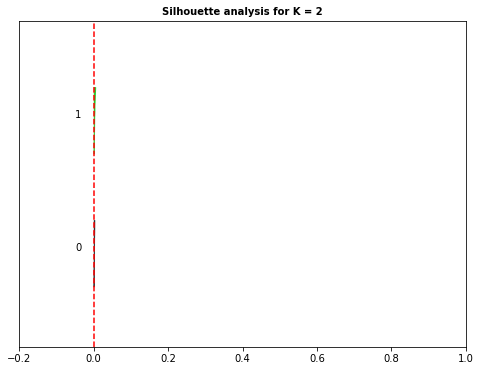

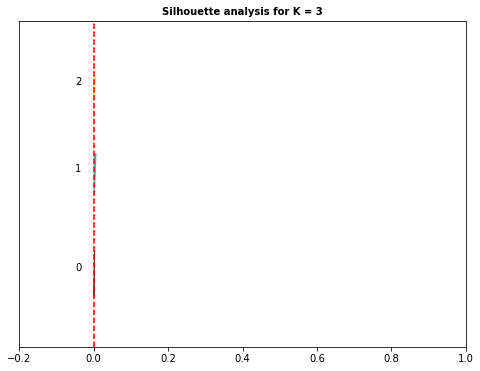

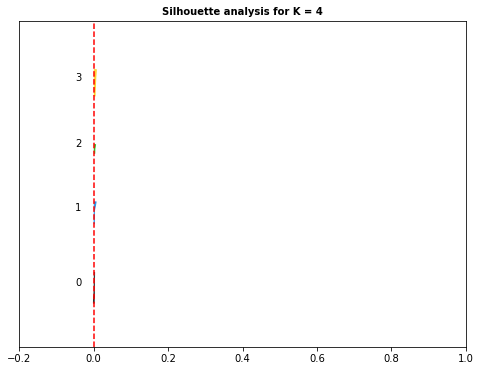

In [252]:
silhouette(kmeans_results, final_df, plot=True)

In [253]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

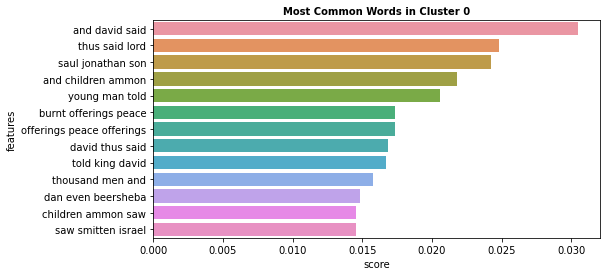

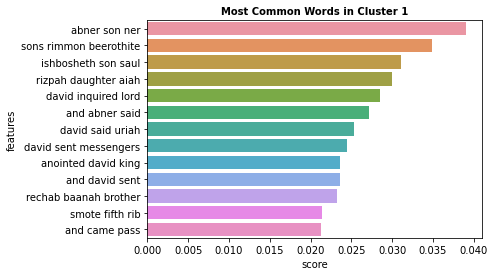

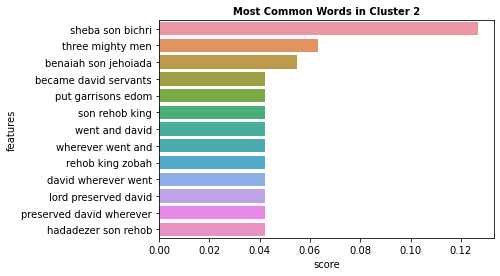

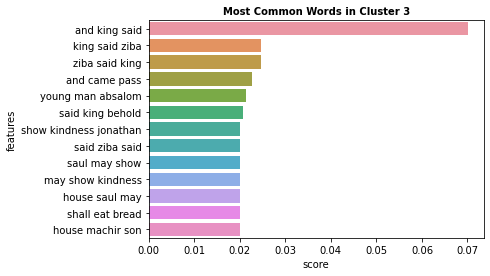

In [254]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [255]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

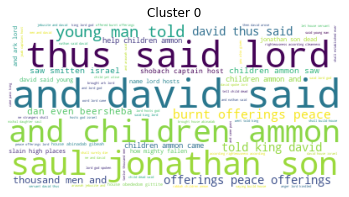

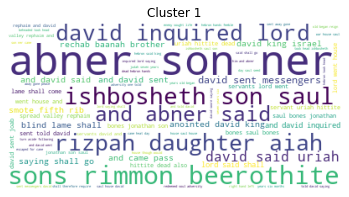

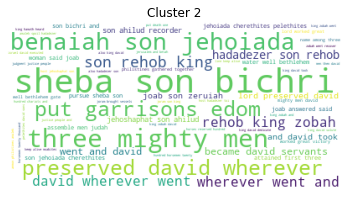

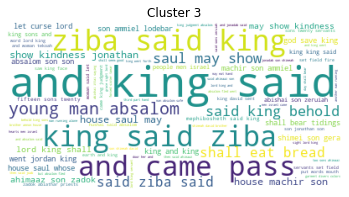

In [256]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [257]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,II_Samuel_1,"'came', 'pass', 'death', 'saul', ',', 'david',...",0
101,II_Samuel_2,"'came', 'pass', ',', 'david', 'inquired', 'lor...",1
102,II_Samuel_3,"'long', 'war', 'house', 'saul', 'house', 'davi...",1
103,II_Samuel_4,"'saul', ', 'son', 'heard', 'abner', 'dead', 'h...",1
104,II_Samuel_5,"'came', 'tribes', 'israel', 'david', 'hebron',...",1


In [258]:
print(df)

            Autor                                              Livro  label
100   II_Samuel_1  'came', 'pass', 'death', 'saul', ',', 'david',...      0
101   II_Samuel_2  'came', 'pass', ',', 'david', 'inquired', 'lor...      1
102   II_Samuel_3  'long', 'war', 'house', 'saul', 'house', 'davi...      1
103   II_Samuel_4  'saul', ', 'son', 'heard', 'abner', 'dead', 'h...      1
104   II_Samuel_5  'came', 'tribes', 'israel', 'david', 'hebron',...      1
105   II_Samuel_6  ',', 'david', 'gathered', 'together', 'chosen'...      0
106   II_Samuel_7  'came', 'pass', ',', 'king', 'sat', 'house', '...      0
107   II_Samuel_8  'came', 'pass', 'david', 'smote', 'philistines...      2
108   II_Samuel_9  'david', 'said', ',', 'yet', 'left', 'house', ...      3
109  II_Samuel_10  'came', 'pass', ',', 'king', 'children', 'ammo...      0
110  II_Samuel_11  'came', 'pass', ',', 'year', 'expired', ',', '...      1
111  II_Samuel_12  'lord', 'sent', 'nathan', 'david', '.', 'came'...      0
112  II_Samu